# **Milestone 2 - Predicting Airline Passenger Satisfaction**

---

**Project Image Visualization**  

<center>

![Stock Image](https://img.freepik.com/free-vector/airplane-interior-flat-icons-set-with-passengers-aircraft-staff-isolated-vector-illustration_1284-80781.jpg?w=1380&t=st=1709655421~exp=1709656021~hmac=c927d82391a59bedabc6efa1d6dd564d18fd9ec188e70f0cb79336924cfbd406)

</center>

source: freepik


# **1. Introduction**

Name  : Aria Ananda  
Batch : HCK-013  

**Objective**  
The goal of this project is to construct a machine learning model that predicts Japan's Airline Passenger satisfaction. We'll explore five different classificaton models: K-Nearest Neighbor (KNN), Support Vector Machine (SVM), Decision Tree, and Random Forest and also boosting algorithm XGBClassifier. Each model will be carefully evaluated using cross-validation and performance metrics such as F1 score. After identifying the best base model, we'll fine-tune its parameters to improve its accuracy too. Finally, we'll compare the tuned model with the base one to choose the best option for predicting Airline Passenger satisfaction accurately and reliably.

**Dataset Information**  
This project utilizes a raw dataset sourced from kaggle.com titled *"Airline Passenger Satisfaction"* uploaded by TJ Klein. The dataset comprises information collected from surveys on airline passenger satisfaction. Below, you'll find a detailed description of each column in the dataset. For access to the dataset source, you can click [here!](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

**Dataset Description Table**
<center>

| Columns                           | Description                                    |
|-----------------------------------|------------------------------------------------|
| Gender                            | Gender of the passengers (Female, Male)        |
| Customer Type                     | Customer type (Loyal customer, disloyal customer)|
| Age                               | Actual age of the passengers                   |
| Type of Travel                    | Purpose of the flight (Personal Travel, Business Travel)|
| Class                             | Travel class (Business, Eco, Eco Plus)          |
| Flight distance                   | The flight distance of the journey              |
| Inflight wifi service             | Satisfaction level of inflight wifi service (0:Not Applicable;1-5)|
| Departure/Arrival time convenient| Satisfaction level of Departure/Arrival time convenience|
| Ease of Online booking            | Satisfaction level of online booking            |
| Gate location                     | Satisfaction level of Gate location             |
| Food and drink                    | Satisfaction level of Food and drink            |
| Online boarding                   | Satisfaction level of online boarding           |
| Seat comfort                      | Satisfaction level of Seat comfort              |
| Inflight entertainment           | Satisfaction level of inflight entertainment    |
| On-board service                  | Satisfaction level of On-board service          |
| Leg room service                  | Satisfaction level of Leg room service          |
| Baggage handling                  | Satisfaction level of baggage handling          |
| Check-in service                  | Satisfaction level of Check-in service          |
| Inflight service                  | Satisfaction level of inflight service          |
| Cleanliness                       | Satisfaction level of Cleanliness               |
| Departure Delay in Minutes        | Minutes delayed at departure                    |
| Arrival Delay in Minutes          | Minutes delayed at arrival                      |
| Satisfaction                      | Airline satisfaction level (Satisfaction, neutral, dissatisfaction)|

</center>

# **2. Import Libraries**  

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

# For Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import OneHotEncoder

# For Model Definition & Training
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For Model Evaluation
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score


# For Saving Models
import pickle

# To Deactivate Warnings
import warnings
warnings.filterwarnings('ignore')

# Displaying all columns
pd.options.display.max_columns = 200

**Import Libraries - Explanation**

Before we commence the project, we `import all the necessary libraries required to facilitate various tasks throughout the project`. Each library serves as a tool for specific purposes as indicated by the comments provided above the code. These libraries provide functionalities ranging from data manipulation, visualization, and model building, etc., enabling us to efficiently conduct data analysis and develop machine learning models for our project.

# **3. Data Loading**

## Loading The Data & Extract General Dataset Information

In [104]:
# Loading csv data
df_raw = pd.read_csv('airline_passenger_satisfaction.csv')

**Loading CSV Data - Explanation**

The next step is to import the dataset into the notebook for analysis. By utilizing the pandas read_csv() method, `we can load the CSV data into the variable df_raw`. This allows us to access and manipulate the dataset within the notebook environment, enabling further exploration and preprocessing of the data for our analysis and modeling tasks.

In [3]:
# Show First 10 Row of Data
df_raw.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,5,5,3,5,4,3,1,1,2,5,0,0.0,satisfied
6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,3,5,5,5,5,5,5,4,5,3,0,0.0,satisfied
7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,2,4,4,5,4,4,4,4,5,4,3,77,65.0,satisfied
8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,5,5,5,5,2,2,5,3,3,5,1,0.0,satisfied
9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,2,3,4,4,4,4,4,4,5,4,4,28,14.0,satisfied


**Show First 10 Row of Data - Explanation**  

Using pandas .head(), i could show only limited data located on the top of dataset. We could see that `the data succesfully loaded`. At the first glance, the columns consist of both categorical and numerical data. But, we still have to check the data type of each columns later on.

In [4]:
# Identifying Target Column
df_raw.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

**Identifying Target Column - Explanation**  
 
With .columns method we could display all column names in the dataset. Given our objective of constructing a machine learning model to predict Airline Passenger satisfaction, it's evident that the `satisfaction column serves as the target variable for our prediction`. This column represents the ultimate measure of passenger satisfaction, making it the focal point of our predictive analysis.

In [5]:
# Load Last 10 Row of Data
df_raw.tail(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129870,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,4,4,5,5,5,5,3,4,4,3,4,5,17,26.0,satisfied
129871,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,1,2,1,1,1,1,3,3,5,5,4,1,13,10.0,neutral or dissatisfied
129872,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,5,5,4,4,4,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
129873,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,5,5,5,4,4,4,4,4,4,4,4,9,7.0,satisfied
129874,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,4,2,3,2,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
129875,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
129877,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
129879,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


**Load Last 10 Row of Data - Explanation**  
 
To examine the bottom portion of the dataset, we utilize the pandas .tail() method, displaying a limited view of the data. Upon inspection, we observe that the last row is indexed at 129879, indicating that `the table comprises a total of 129880 data points`.

In [6]:
# Checking Data Summary 
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

**Checking Data Summary - Explanation**

By utilizing the .info() method, we gain small summary of the dataset, including the number of rows and columns, as well as the data types of each column. Here's a summary of the key observations extracted from the output:

- The dataset comprises of 103904 entries (rows) and 25 columns.
- Among the columns, only 1 have float64 data type, while 19 columns are of the int64 data type, with 5 columns containing object data types.
- The entire dataset consumes approximately 19.8+ MB of memory. Quite big, but it is as expected because dataset have a large amount of data
- After closer examination, I have confirmed that each column has the right data type. But we found an issue with the `Departure Delay in Minutes` column. Out of 129880 records, only 129487 have valid entries, meaning there are missing values in this column.

## Duplicating Raw Data

In [7]:
# Duplicating Raw Data 
df = df_raw.copy()

**Duplicating Raw Data - Explanation**

Before we start cleaning up the data, it's important to make a copy of the original data using the .copy() method. This way, `we can still refer back to the untouched data if necessary`.

## Check Data Duplicates

In [8]:
# Check Data Duplicates
df.duplicated().sum()

0

**Check Data Duplicates - Explanation**

The code above helps us find out if there are any duplicate entries in our dataset. When we run it, and the output shows 0, it means `there are no repeated rows or data duplicates in our dataset`. Therefore, we don't need to do anything further to handle duplicated data.

## Check Missing Values

In [9]:
# Checking missing values
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

**Checking Missing Values - Explanation**  
  
Code above used to show how many missing values on each column. The output of all columns are 0 besides `Arrival Delay in Minutes` with 393 missing values that have to be handled. I have decided to `handle these missing value after splitting the data` because it helps prevent data leakage, mimics real-world scenarios, avoids over-fitting, and enables more accurate model evaluation.

# **4. Exploratory Data Analysis (EDA)**

**EDA - Introduction**  

In this exploratory data analysis (EDA), we delve into the dataset aimed at predicting airline passenger information. `Our objective is to gain insights and understanding of the dataset before proceeding with model development`. By exploring various aspects such as passenger attributes, flight details, and target variables, we aim to uncover patterns, trends, and potential challenges that may influence the predictive modeling process. Through this EDA, we lay the groundwork for building an accurate classification model.

I'll categorize the EDA methods into three groups: univariate, bivariate, and multivariate. This helps organize our exploration, letting us focus on individual variables (univariate), pairs of variables (bivariate), and how multiple variables interact (multivariate), making it easier to understand the dataset's features and relationships.

## Numerical and Categorical Data Descriptive Summary

In [10]:
# Numerical Columns Descriptive Summary
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


**Numerical Columns Data Descriptive Summary - Explanation**  

The code above generates a descriptive summary of numerical columns in the dataset, excluding object-type columns using the describe(). From the summary, we can observe that:  
- The average age of passengers is around 39 years, from 7 to 85 with a standard deviation of 15 years. 

- The average flight distance is approximately 1190 miles, ranging from 31 to 4983 miles.

- Notably, `passengers generally rate their flight experiences more moderately`, with mean scores above 3 for most service-related features.  

- There are `noticeable delays in both departure and arrival times`, with some flights experiencing significant delays of up to 1592 and 1584 minutes, with standard deviation of 14 to 15 minutes, respectively.


- Passengers tend to be `less satisfied with inflight Wi-Fi service and ease of online booking` compared to other aspects of their flight experience because lower mean satisfaction score.

- The standard deviations highlight varying dispersion levels from the means, suggesting differing dataset variability and potential outliers, notably in "id," "age," "Flight Distance," "Departure Delay in Minutes," and "Arrival Delay in Minutes."

In [11]:
# Categorical Data Descriptive Summary
df.describe(include='object').T

,count,unique,top,freq
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160
satisfaction,129880,2,neutral or dissatisfied,73452


**Categorical Columns Data Descriptive Summary - Explanation**  

The provided code generates a descriptive summary of categorical columns in the dataset using the describe() function with include='object' parameter. From the summary, we observe that:  
- The dataset contains 129,880 records, all of which are categorical data.  

- In terms of gender, there are two unique values, with "Female" being the most frequent, indicating a `higher proportion of female customers`.  

- "Customer Type" also has two unique values, with "Loyal Customer" being the most frequent, suggesting a `majority of customers are loyal to Japan's Airlines`.  

- "Type of Travel" has two unique values, with "Business travel" being the most frequent, indicating that `most customers travel for business purposes`.  

- Among the classes, "Business" class is the most common, suggesting a `preference for premium seating options`.    

- The majority of customers express "neutral or dissatisfied" satisfaction, `indicating possibility of overall dissatisfaction with Japan's Airline performance`.


## Check Data Cardinality

In [12]:
# Create Column Cardinality Checking Function
def check_column_cardinality(dataframe):
    '''
    This function checks the unique values and checking cardinality status in each column of a given dataset
    
    INPUT: dataframe - the dataset to analyze
    OUTPUT: a table containing columns, the number of unique values in each column, 
            a list of unique values for each column
            the status of cardinality
    '''   
    column_names = list(dataframe.columns)
    unique_counts = []
    unique_values = []
    cardinality_status = []
    
    for column in column_names:
        unique_count = len(dataframe[column].unique())
        unique_counts.append(unique_count)        
        unique_values.append(sorted(dataframe[column].unique().tolist()))
        
        if unique_count > 10:
            cardinality_status.append("high")
        else:
            cardinality_status.append("low")
        
    data = {'column_names': column_names, 
            'total_unique_counts': unique_counts,
            'unique_values': unique_values,
            'cardinality_status': cardinality_status}
    
    print('Columns Cardinality Checking Table')
    display(pd.DataFrame(data=data))

# Example usage:
# check_column_cardinality(df)


**Column Cardinality Checking Function - Explanation**

This function is designed to analyze the uniqueness of values, and cardinality status in each column of a given dataset. There are no exact values of what considered high cardinality, for simplicity purposes i decided that distinct values above 10 as high cardinality. The function iterates through each column, calculating the number of unique values, and listing out the unique values themselves. Finally, it compiles this information into a table format for easy interpretation.

In [13]:
# Using Function to Check Columns Cardinality
check_column_cardinality(df)

Columns Cardinality Checking Table


,column_names,total_unique_counts,unique_values,cardinality_status
0,id,129880,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",high
1,Gender,2,"[Female, Male]",low
2,Customer Type,2,"[Loyal Customer, disloyal Customer]",low
3,Age,75,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...",high
4,Type of Travel,2,"[Business travel, Personal Travel]",low
5,Class,3,"[Business, Eco, Eco Plus]",low
6,Flight Distance,3821,"[31, 56, 67, 73, 74, 76, 77, 78, 80, 82, 83, 8...",high
7,Inflight wifi service,6,"[0, 1, 2, 3, 4, 5]",low
8,Departure/Arrival time convenient,6,"[0, 1, 2, 3, 4, 5]",low
9,Ease of Online booking,6,"[0, 1, 2, 3, 4, 5]",low


**Column Cardinality Checking Table - Insight**  

From the output table, we can observe that:

- The dataset mainly consist of low cardinality columns (18 columns)

- There are 5 high cardinality columns ('id', 'age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'). Since 'id' is just identifier and doesn't affect other features and target, this column will be dropped later.

- There are two category of data :
    - Numeric:
        - Continous: This includes features like Age, Flight Distance, Departure Delay in Minutes, and Arrival Delay in Minutes
        - Discrete: all satisfaction-related columns

    - Categorical: 
        - Discrete: Found in gender, type of travel, class, , and also satisfaction. These columns will undergo encoding into numeric format while retaining their categorical attributes during the feature preparation phase.

In [14]:
# Grouping Columns

# Numerical Columns
num_cont_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

num_disc_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking' ,  'Gate location',
                 'Food and drink', 'Online boarding' ,  'Seat comfort',  'Inflight entertainment',  'On-board service',
                 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

# Categorical Columns
cat_disc_cols = ['Gender', 'Customer Type',  'Type of Travel', 'Class']

**Grouping Columns - Explanation**  

The code above grouped dataset into three set of variables. Grouping the dataset's columns helps in organizing the data, making it easier for us to understand, analyze, and preprocess it, tailoring into each data type, which i hope will facilitating more efficient and effective data analysis and modeling processes.

## Univariate Analysis

### *What is the distribution of passenger ages in the dataset?*

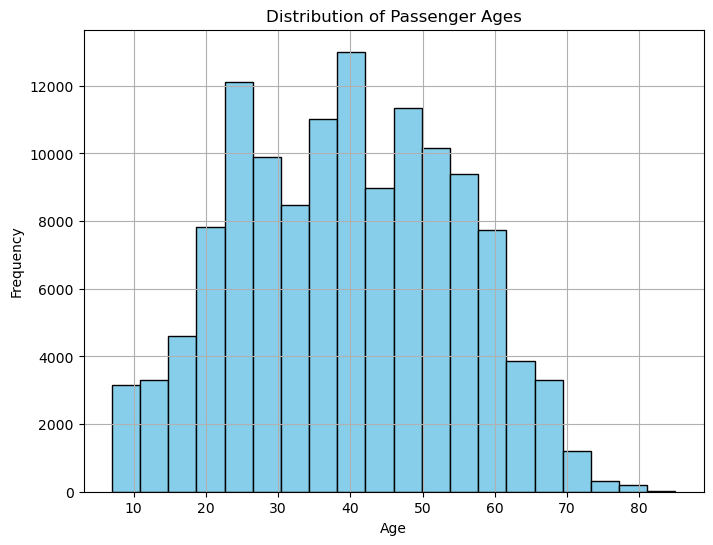

In [15]:
# Histogram Plot of Passenger Ages
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Histogram Plot of Passenger Ages - Insights**  
- Majority of passengers age are between 20 - 60
- Most of `frequent passengers age are of age 39-40`
- Young (below age 20) and Elderly (age 60+) passengers rarely use Japan's Airlines service.  indicating potential areas for targeted marketing and service improvements to attract a wider demographic range. 

Understanding the preferences and needs of these age groups can aid in tailoring services to better meet passenger expectations and enhance overall customer satisfaction within Japan's Airlines.


### *How does the flight distance vary across different flights?*

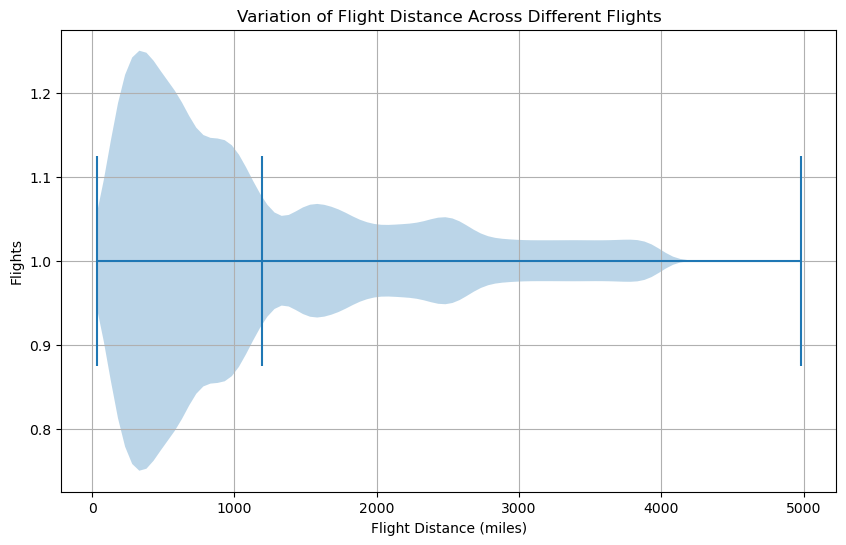

In [16]:
# Violin Plot of flight distance 
plt.figure(figsize=(10, 6))
plt.violinplot(df['Flight Distance'], vert=False, showmeans=True, showextrema=True)
plt.title('Variation of Flight Distance Across Different Flights')
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Flights')
plt.grid(True)
plt.show()

**Violin Plot of flight Distance - Insights**  

The visualization of flight distance variation across different flights on Japan's Airlines reveals distinct patterns. The majority of flights fall within the range of approximately 300 to 1200 miles, `indicating common short to medium-haul routes within a specific region`. Occasionally, there are longer flights extending up to around 1500 and 2500 miles, likely representing longer-haul routes connecting major cities or spanning across regions. Rarely, there are extreme outliers with distances exceeding 4000 miles, indicative of infrequent long-haul international flights. These insights could provide valuable information for route planning and scheduling. Understanding these patterns can help optimize operations and enhance the airline's service offerings to meet passenger needs effectively.

### *What are the typical departure delay times for flights?*

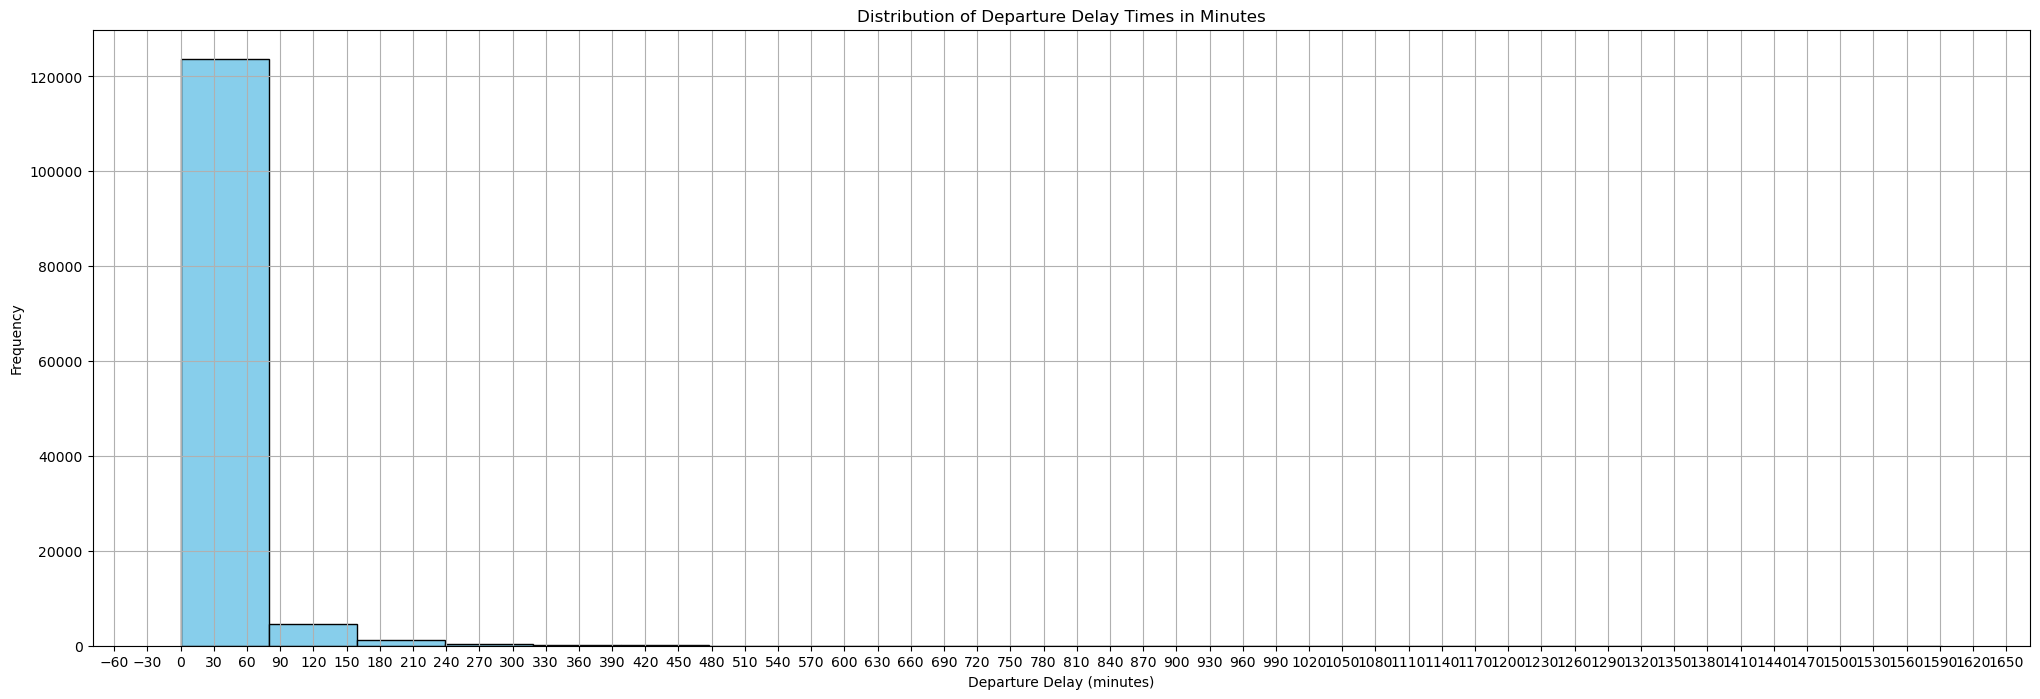

In [17]:
# Histogram of Departure Delay Times in Minutes
plt.figure(figsize=(25, 8))
plt.hist(df['Departure Delay in Minutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Departure Delay Times in Minutes')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')

# Set interval ticks at every 30 minutes
plt.gca().xaxis.set_major_locator(MultipleLocator(30))

plt.grid(True)
plt.show()


**Histogram of Departure Delay in Minutes - Insights**  

The visualization of Departure Delay in Minutes reveals that most flight delays fall between 15 to 80 minutes, showing that `moderate delays are common`. Occasionally, delays range from 90 to 240 minutes, indicating more significant disruptions. There are also extremely rare instances where delays reach up to 1592 minutes (from descriptive summary), representing highly unusual and severe cases. This suggests that while most delays are manageable, there are occasional challenges with longer delays that can significantly affect travel plans.

### *How satisfied are passengers with inflight Wi-Fi service?*

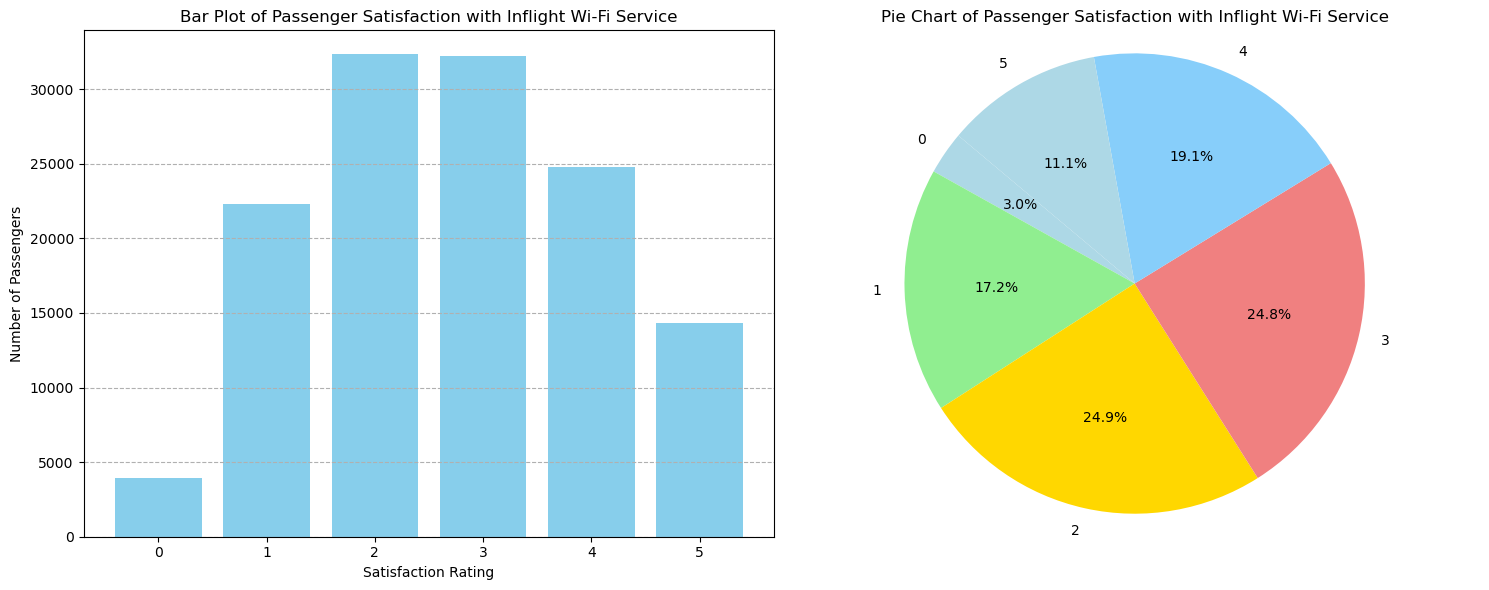

In [18]:
# Bar Plot and Pie Chart of inflight wifi service

# Inflight wifi service value counts into variable
satisfaction_counts = df['Inflight wifi service'].value_counts().sort_index()

# Satisfaction labels
satisfaction_labels = ['0', '1', '2', '3', '4', '5'] 

# Figure and axis 
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Bar Plot
axs[0].bar(satisfaction_labels, satisfaction_counts, color='skyblue')
axs[0].set_title('Bar Plot of Passenger Satisfaction with Inflight Wi-Fi Service')
axs[0].set_xlabel('Satisfaction Rating')
axs[0].set_ylabel('Number of Passengers')
axs[0].grid(axis='y', linestyle='--', alpha=1)  

# Pie Chart
axs[1].pie(satisfaction_counts, labels=satisfaction_labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'gold', 'lightcoral', 'lightskyblue'])
axs[1].set_title('Pie Chart of Passenger Satisfaction with Inflight Wi-Fi Service')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Showing the plot
plt.tight_layout()
plt.show()


**Bar Plot and Pie Chart of inflight wifi service**  

From the descriptive summary, it's evident that inflight service received the lowest satisfaction score among all satisfaction metrics. Analyzing the visualization further, we observe that nearly half (49.7%) of passengers rated inflight Wi-Fi service between 2 and 3, `indicating a mediocre satisfaction level`. In contrast, only a small proportion of passengers rated it highly, with 11.1% giving a rating of 5, and 19.1% giving a rating of 4. Interestingly, a notable portion of passengers rated the service poorly, with 17.2% giving a rating of 0, and only 3% giving a rating of 1. This `suggests that while a significant portion of passengers have a neutral or positive perception of the inflight Wi-Fi service, there is also a considerable dissatisfaction among passengers`, highlighting areas for potential improvement to enhance overall passenger experience.

### *What is the distribution of satisfaction levels among passengers?*

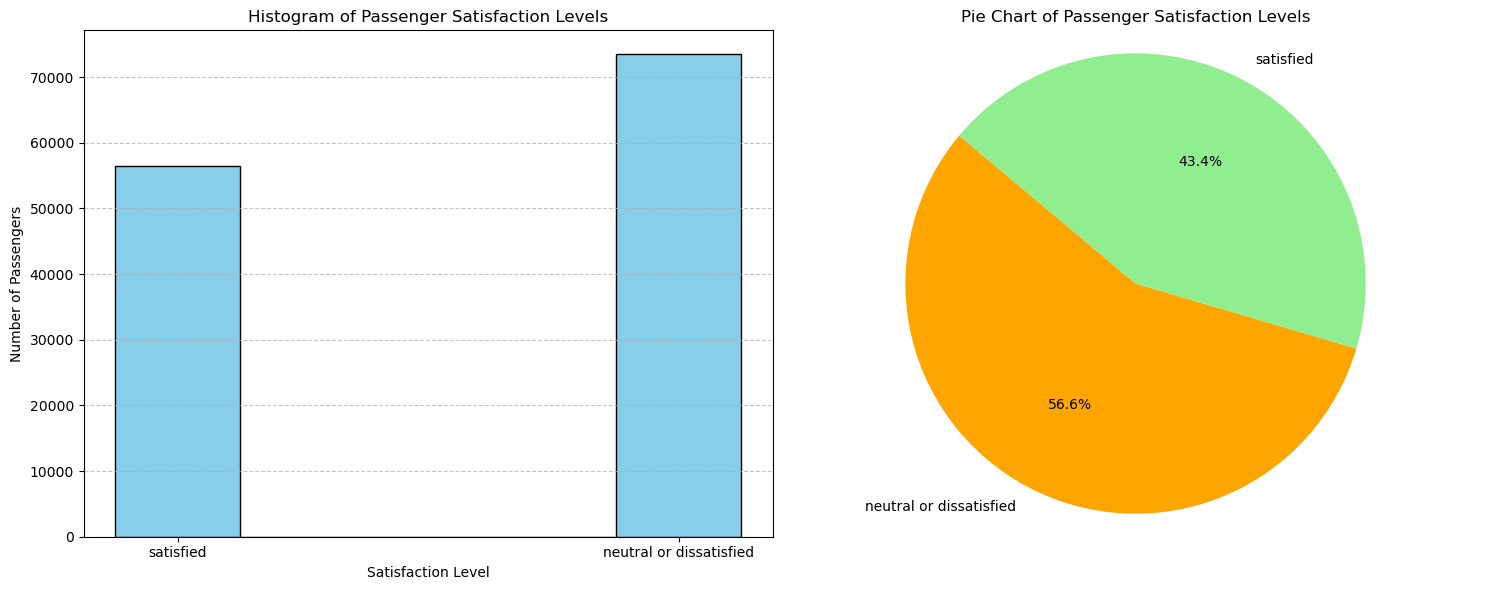

In [19]:
# Histogram and Pie Chart of satisfaction

# Satisfaction counts
satisfaction_counts = df['satisfaction'].value_counts()

# Figure and axis
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axs[0].hist(df['satisfaction'], bins=5, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Passenger Satisfaction Levels')
axs[0].set_xlabel('Satisfaction Level')
axs[0].set_ylabel('Number of Passengers')
axs[0].set_xticks([0.1, 0.9])
axs[0].set_xticklabels(['satisfied', 'neutral or dissatisfied'])
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Pie Chart
axs[1].pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'lightgreen'])
axs[1].set_title('Pie Chart of Passenger Satisfaction Levels')
axs[1].axis('equal')

# Showing the Plot
plt.tight_layout()
plt.show()

**Histogram and Pie Chart of Satisfaction - Insights**  

From the overall satisfaction visualization, it's evident that only 43.4% or approximately 58,000 passengers are satisfied, while the majority, comprising 56.6% or over 70,000 passengers, `express a neutral or dissatisfied sentiment among passengers`. This indicates a significant portion of passengers are not fully content with their experience, highlighting potential areas for improvement in the airline's services or customer experience initiatives. Addressing the concerns of neutral or dissatisfied passengers could be crucial in enhancing overall passenger satisfaction and loyalty, ultimately contributing to the airline's success and reputation in the industry. From this target distribution we also could know that the data is not imbalance.


### *What is the rating distributions of others service satisfaction-related Columns?*

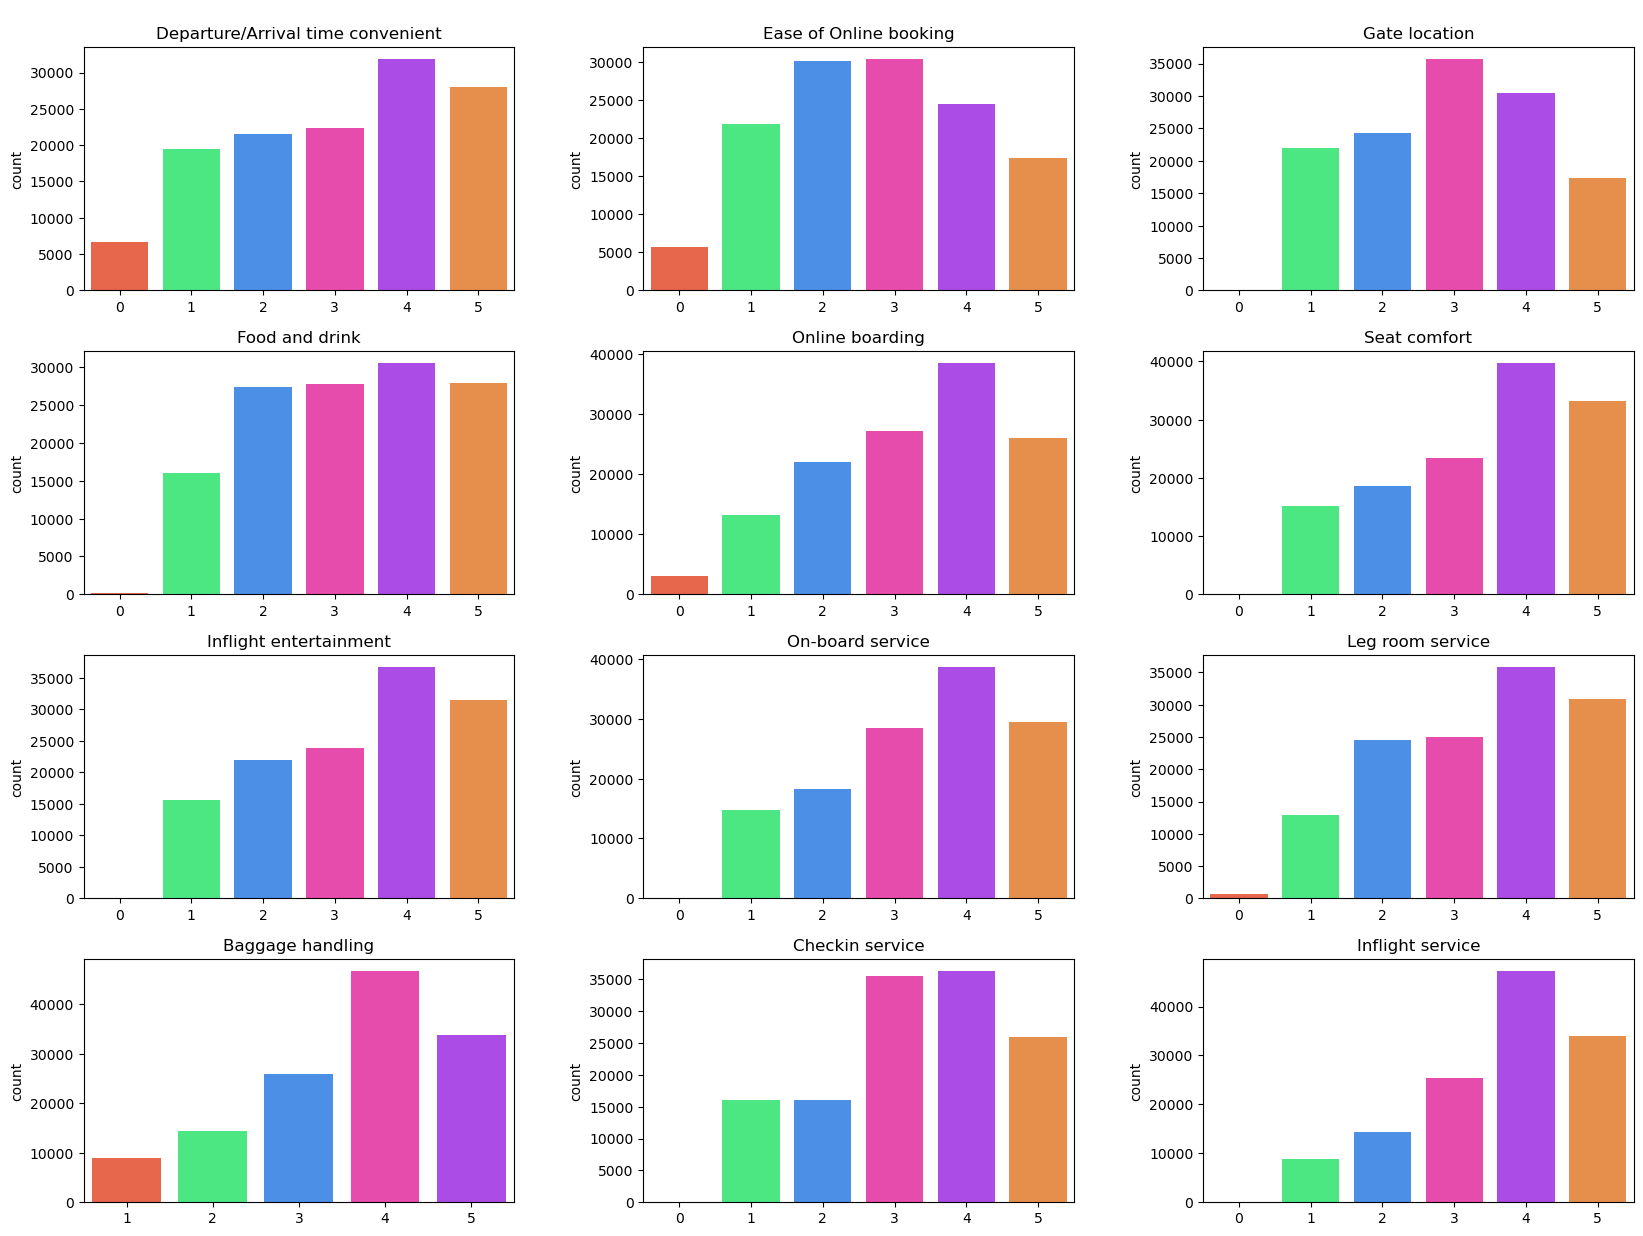

In [20]:
# Countplots of rating distributions of other service satisfaction-related Columns
fig = plt.figure(figsize=(20, 15))
n_columns = 3
n_rows = 4

# Define custom colors for countplot
custom_colors = ["#FF5733", "#33FF7A", "#338CFF", "#FF33B2", "#B233FF", "#FF8C33", "#33FFB2", "#B2FF33", "#336DFF", "#FF33B2", "#33FF7A", "#FF5733"]

for position in range(1, ((n_columns * n_rows) + 1)):
    if position > len(num_disc_cols):
        break
    else:
        fig.add_subplot(n_rows, n_columns, position)
        sns.countplot(data=df, x=num_disc_cols[position], palette=custom_colors).set(title=f'\n{num_disc_cols[position]}', xlabel='')
        fig.subplots_adjust(hspace=0.25, wspace=0.3)
plt.show()


**Countplots of rating distributions of other service satisfaction-related Columns**  

Below are some insights we can take from the countplots of services satisfaction related columns:

- The distribution of ratings reveals some stark contrasts in passenger satisfaction across various services. While some passengers gave low ratings (0) to services like Baggage handling, Departure/Arrival Time Convenient, Ease of online booking, online boarding, and leg room service, others provided relatively higher ratings (3-5). This suggests a notable disparity in the perceived quality of different aspects of the airline experience.
  
- Interestingly, services receiving ratings of 1-2 show a more scattered distribution across all categories, with notable concentrations in ease of online booking, food and drink, and gate location. `This indicates areas where passengers are particularly dissatisfied and where targeted improvements could yield significant enhancements in overall satisfaction`.
  
- Moreover, despite the majority of customers opting for a moderate rating of 3 across most services, some services, such as check-in service, inflight service, and baggage handling, receive notably higher ratings of 4 and even occasional 5s. This implies that certain aspects of the passenger experience are consistently meeting or exceeding expectations, warranting further investigation into their underlying factors for potential replication or improvement in other areas.

## Bivariate Analysis

### *Is there a correlation between passenger age and satisfaction levels?*

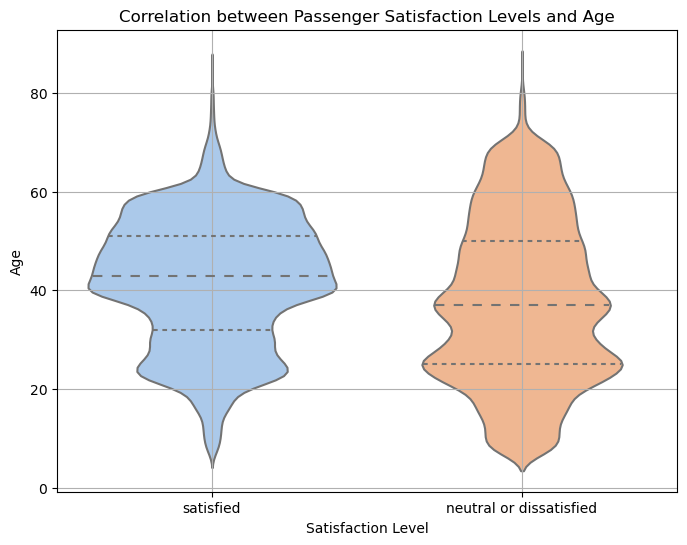

In [21]:
# Violin Plot of Satisfaction and Age
plt.figure(figsize=(8, 6))
sns.violinplot(x='satisfaction', y='Age', data=df, palette='pastel', inner='quartile')
plt.title('Correlation between Passenger Satisfaction Levels and Age')
plt.xlabel('Satisfaction Level')
plt.ylabel('Age')
plt.grid(True)
plt.show()

**Violin Plot of Satisfaction and Age - Insights**   

From the visualization, it's apparent that there exists a slight positive correlation between passenger satisfaction and age. This comes from distinction of age and their satisfaction level. `Notably, younger passengers tend to exhibit lower satisfaction levels compared to their older counterparts`. This observation is supported by the wider spread of satisfaction levels among younger age groups, indicating a greater variability in satisfaction experiences. Conversely, older passengers demonstrate a narrower spread of satisfaction levels, with the median satisfaction level notably higher than that of younger passengers. The violin plot illustrates this trend by depicting a positive relationship between passenger age and satisfaction levels. In summary, the visualization suggests that `younger passengers are more inclined to report neutral or dissatisfied levels of satisfaction, while older passengers are more likely to express higher levels of satisfaction with their flight experiences`. This assumptions is in line with the wi-fi inflight satisfaction, where we could assume younger generation would more likely tend to using the wi-fi than older generation.

### *How does the type of travel (business vs. personal) affect satisfaction levels?*

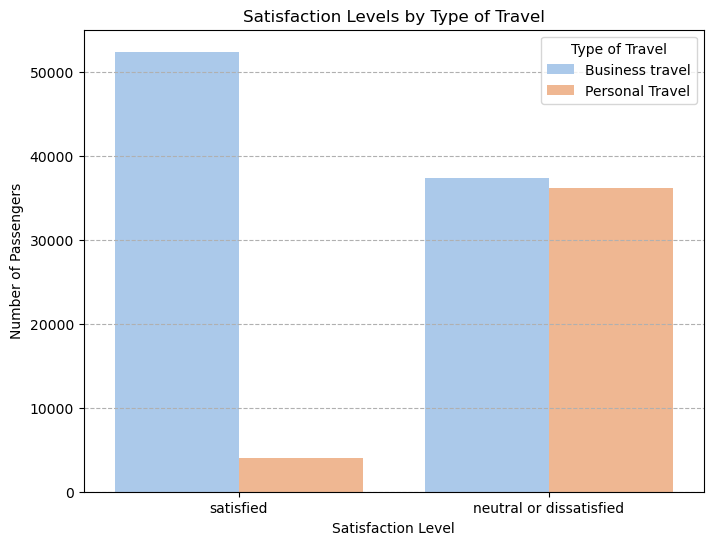

In [22]:
# Countplot of satisfaction Grouped by Type of Travel
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='satisfaction', hue='Type of Travel', palette='pastel')
plt.title('Satisfaction Levels by Type of Travel')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Passengers')
plt.legend(title='Type of Travel')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

**Countplot of satisfaction Grouped by Type of Travel - Insights**  

The countplot visualization based on the type of travel reveals a stark contrast in satisfaction levels between passengers traveling for business purposes and those traveling for personal reasons. A notable observation is that over 50,000 passengers on business trips reported being satisfied, whereas the number of satisfied passengers on personal trips was significantly lower, totaling just below 10,000. Conversely, the count of passengers expressing neutral or dissatisfied sentiments was more balanced between the two travel types, with approximately 37,000 passengers on business trips and 36,000 passengers on personal trips falling into this category. This suggests that, `overall, passengers on business trips tend to have higher satisfaction levels compared to those on personal trips`, possibly indicating differences in service expectations or experiences tailored to the respective travel purposes. 


### *Are there differences in satisfaction levels between loyal and non-loyal customers?*

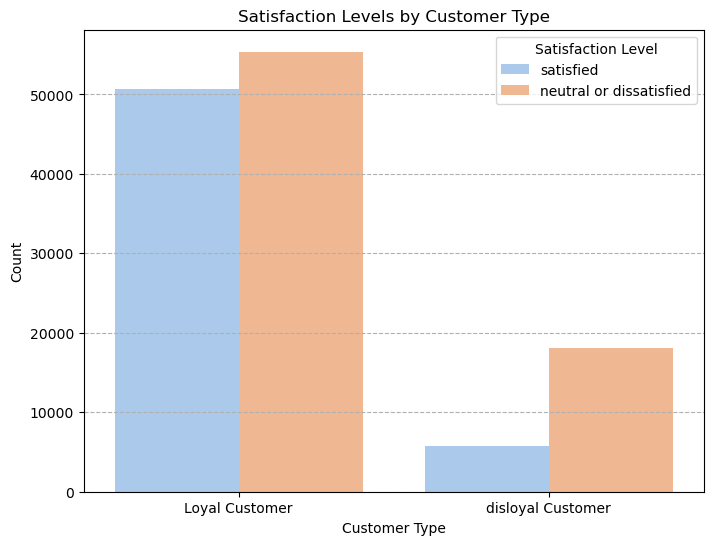

In [23]:
# Countplot of Satisfaction levels of loyal and non loyal customers
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Customer Type', hue='satisfaction', palette='pastel')
plt.title('Satisfaction Levels by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Satisfaction Level')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


**Countplot of Satisfaction levels of loyal and non loyal customers - Insights**  

The countplot analysis reveals notable disparities in satisfaction levels between loyal and non-loyal customers of Japan's Airline. Specifically, approximately 50,000 loyal customers reported feeling satisfied, whereas over 55,000 loyal customers expressed neutral or dissatisfied sentiments regarding the airline's performance. In contrast, only around 5,000 non-loyal customers reported feeling satisfied, while approximately 18,000 non-loyal customers conveyed neutral or dissatisfied feelings. `This stark contrast suggests that loyal customers tend to have higher satisfaction levels compared to non-loyal customers`, highlighting the importance of customer loyalty in shaping overall satisfaction with Japan's Airline.

### *How does the class of service impact satisfaction levels?*

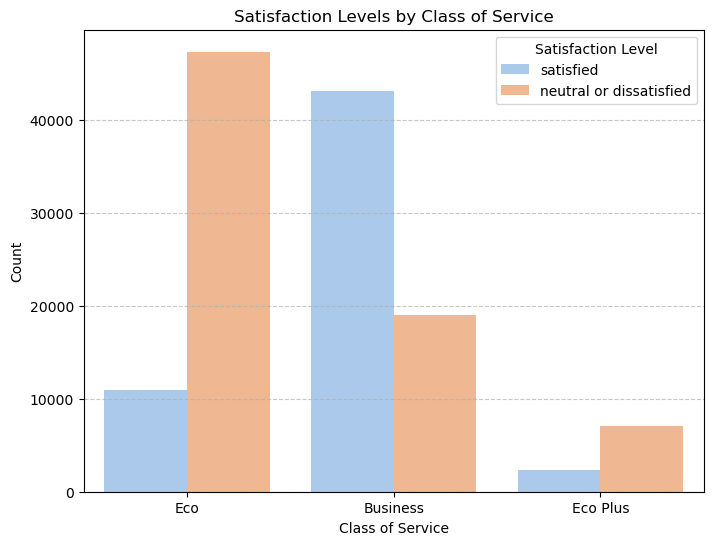

In [24]:
# Count Plot of Satisfaction Levels Grouped by Class of Service
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class', hue='satisfaction', palette='pastel')
plt.title('Satisfaction Levels by Class of Service')
plt.xlabel('Class of Service')
plt.ylabel('Count')
plt.legend(title='Satisfaction Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Count Plot of Satisfaction Levels Grouped by Class of Service - Insights**  

The grouped count plot unveils notable variations in satisfaction levels across different classes of service. Specifically, approximately 11,000 passengers in economy class reported feeling satisfied, while a significantly higher number, totaling around 48,000, expressed neutral or dissatisfied sentiments. In contrast, approximately 44,000 passengers in business class reported feeling satisfied, with approximately 19,000 passengers expressing neutral or dissatisfied feelings. Moreover, a smaller proportion of passengers in economy plus, around 2,000, reported feeling satisfied, while approximately 7,000 passengers conveyed neutral or dissatisfied sentiments. These findings underscore a `clear trend where passengers in business class tend to have higher satisfaction levels compared to those in economy class or economy plus, suggesting that the class of service plays a crucial role in shaping passenger satisfaction with the airline's overall performance`.

### *How does the class of service impact satisfaction levels?*

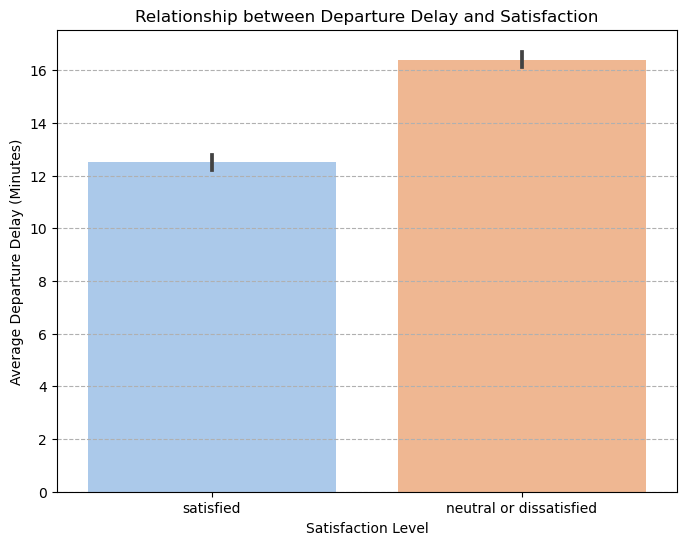

In [25]:
# Bar Plot of Satisfaction and Departure Delay 
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='satisfaction', y='Departure Delay in Minutes', palette='pastel')
plt.title('Relationship between Departure Delay and Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Departure Delay (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


**Bar Plot of Satisfaction and Departure Delay - Insights**  

The bar plot analysis reveals interesting insights regarding the relationship between departure delay times and passenger satisfaction. Specifically, passengers tend to report satisfaction when departure delays are up to approximately 12 minutes. However, as the delay exceeds this threshold and reaches around 16 minutes or more, passenger satisfaction declines, with customers expressing increasing levels of dissatisfaction. This suggests that `there is a critical threshold for departure delays beyond which passenger satisfaction is significantly impacted`. Airlines may thus aim to minimize delays within this threshold to maintain higher levels of passenger satisfaction and overall service quality.

## Multivariate Analysis

### *How do passenger satisfaction levels vary based on combinations of factors of age, gender, and travel type?*

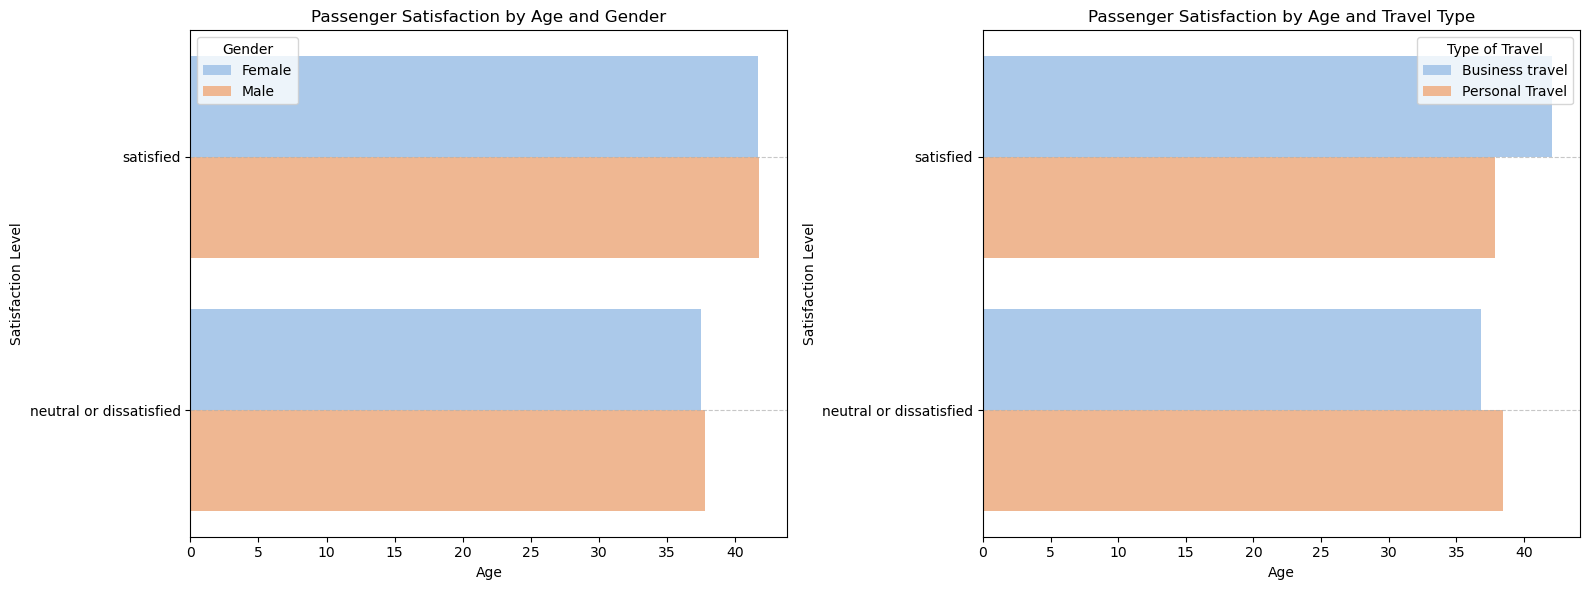

In [26]:
# Bar Plot Satisfaction based on age, traveltype, and gender

# Figures and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Passenger Satisfaction by Age, Gender
sns.barplot(data=df, x='Age', y='satisfaction', hue='Gender', palette='pastel', ci=None, dodge=True, ax=axes[0])
axes[0].set_title('Passenger Satisfaction by Age and Gender')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Satisfaction Level')
axes[0].legend(title='Gender', loc='upper left')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Passenger Satisfaction by Age and Travel Type
sns.barplot(data=df, x='Age', y='satisfaction', hue='Type of Travel', palette='pastel', ci=None, ax=axes[1])
axes[1].set_title('Passenger Satisfaction by Age and Travel Type')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Satisfaction Level')
axes[1].legend(title='Type of Travel')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


**Passenger Satisfaction by Age and Gender - Insights**  
In the visualization depicting passenger satisfaction by age and gender, we observe that passengers aged 40 years and above, irrespective of gender, tend to report higher satisfaction levels with Japan's Airlines service. Conversely, around 36 male and 37 female passengers in this age group express neutral or dissatisfied sentiments. `This suggests that older passengers generally have a more positive perception of the airline's service quality`.

**Passenger Satisfaction by Age and Travel Type - Insights**  
Analyzing passenger satisfaction by age and travel type reveals interesting patterns. Specifically, older passengers aged 40 years and above who engage in business travel tend to exhibit higher satisfaction levels. Conversely, passengers around 38 years old who travel for personal reasons also report satisfaction. However, there is a notable proportion of passengers, particularly those aged 36 years in business travel and 39 years in personal travel, who express neutral or dissatisfied feelings. This implies that `satisfaction levels vary across age groups and travel purposes, with older passengers generally more content, especially when traveling for business purposes`.

### *Are there any interactions between inflight service ratings and overall satisfaction?*

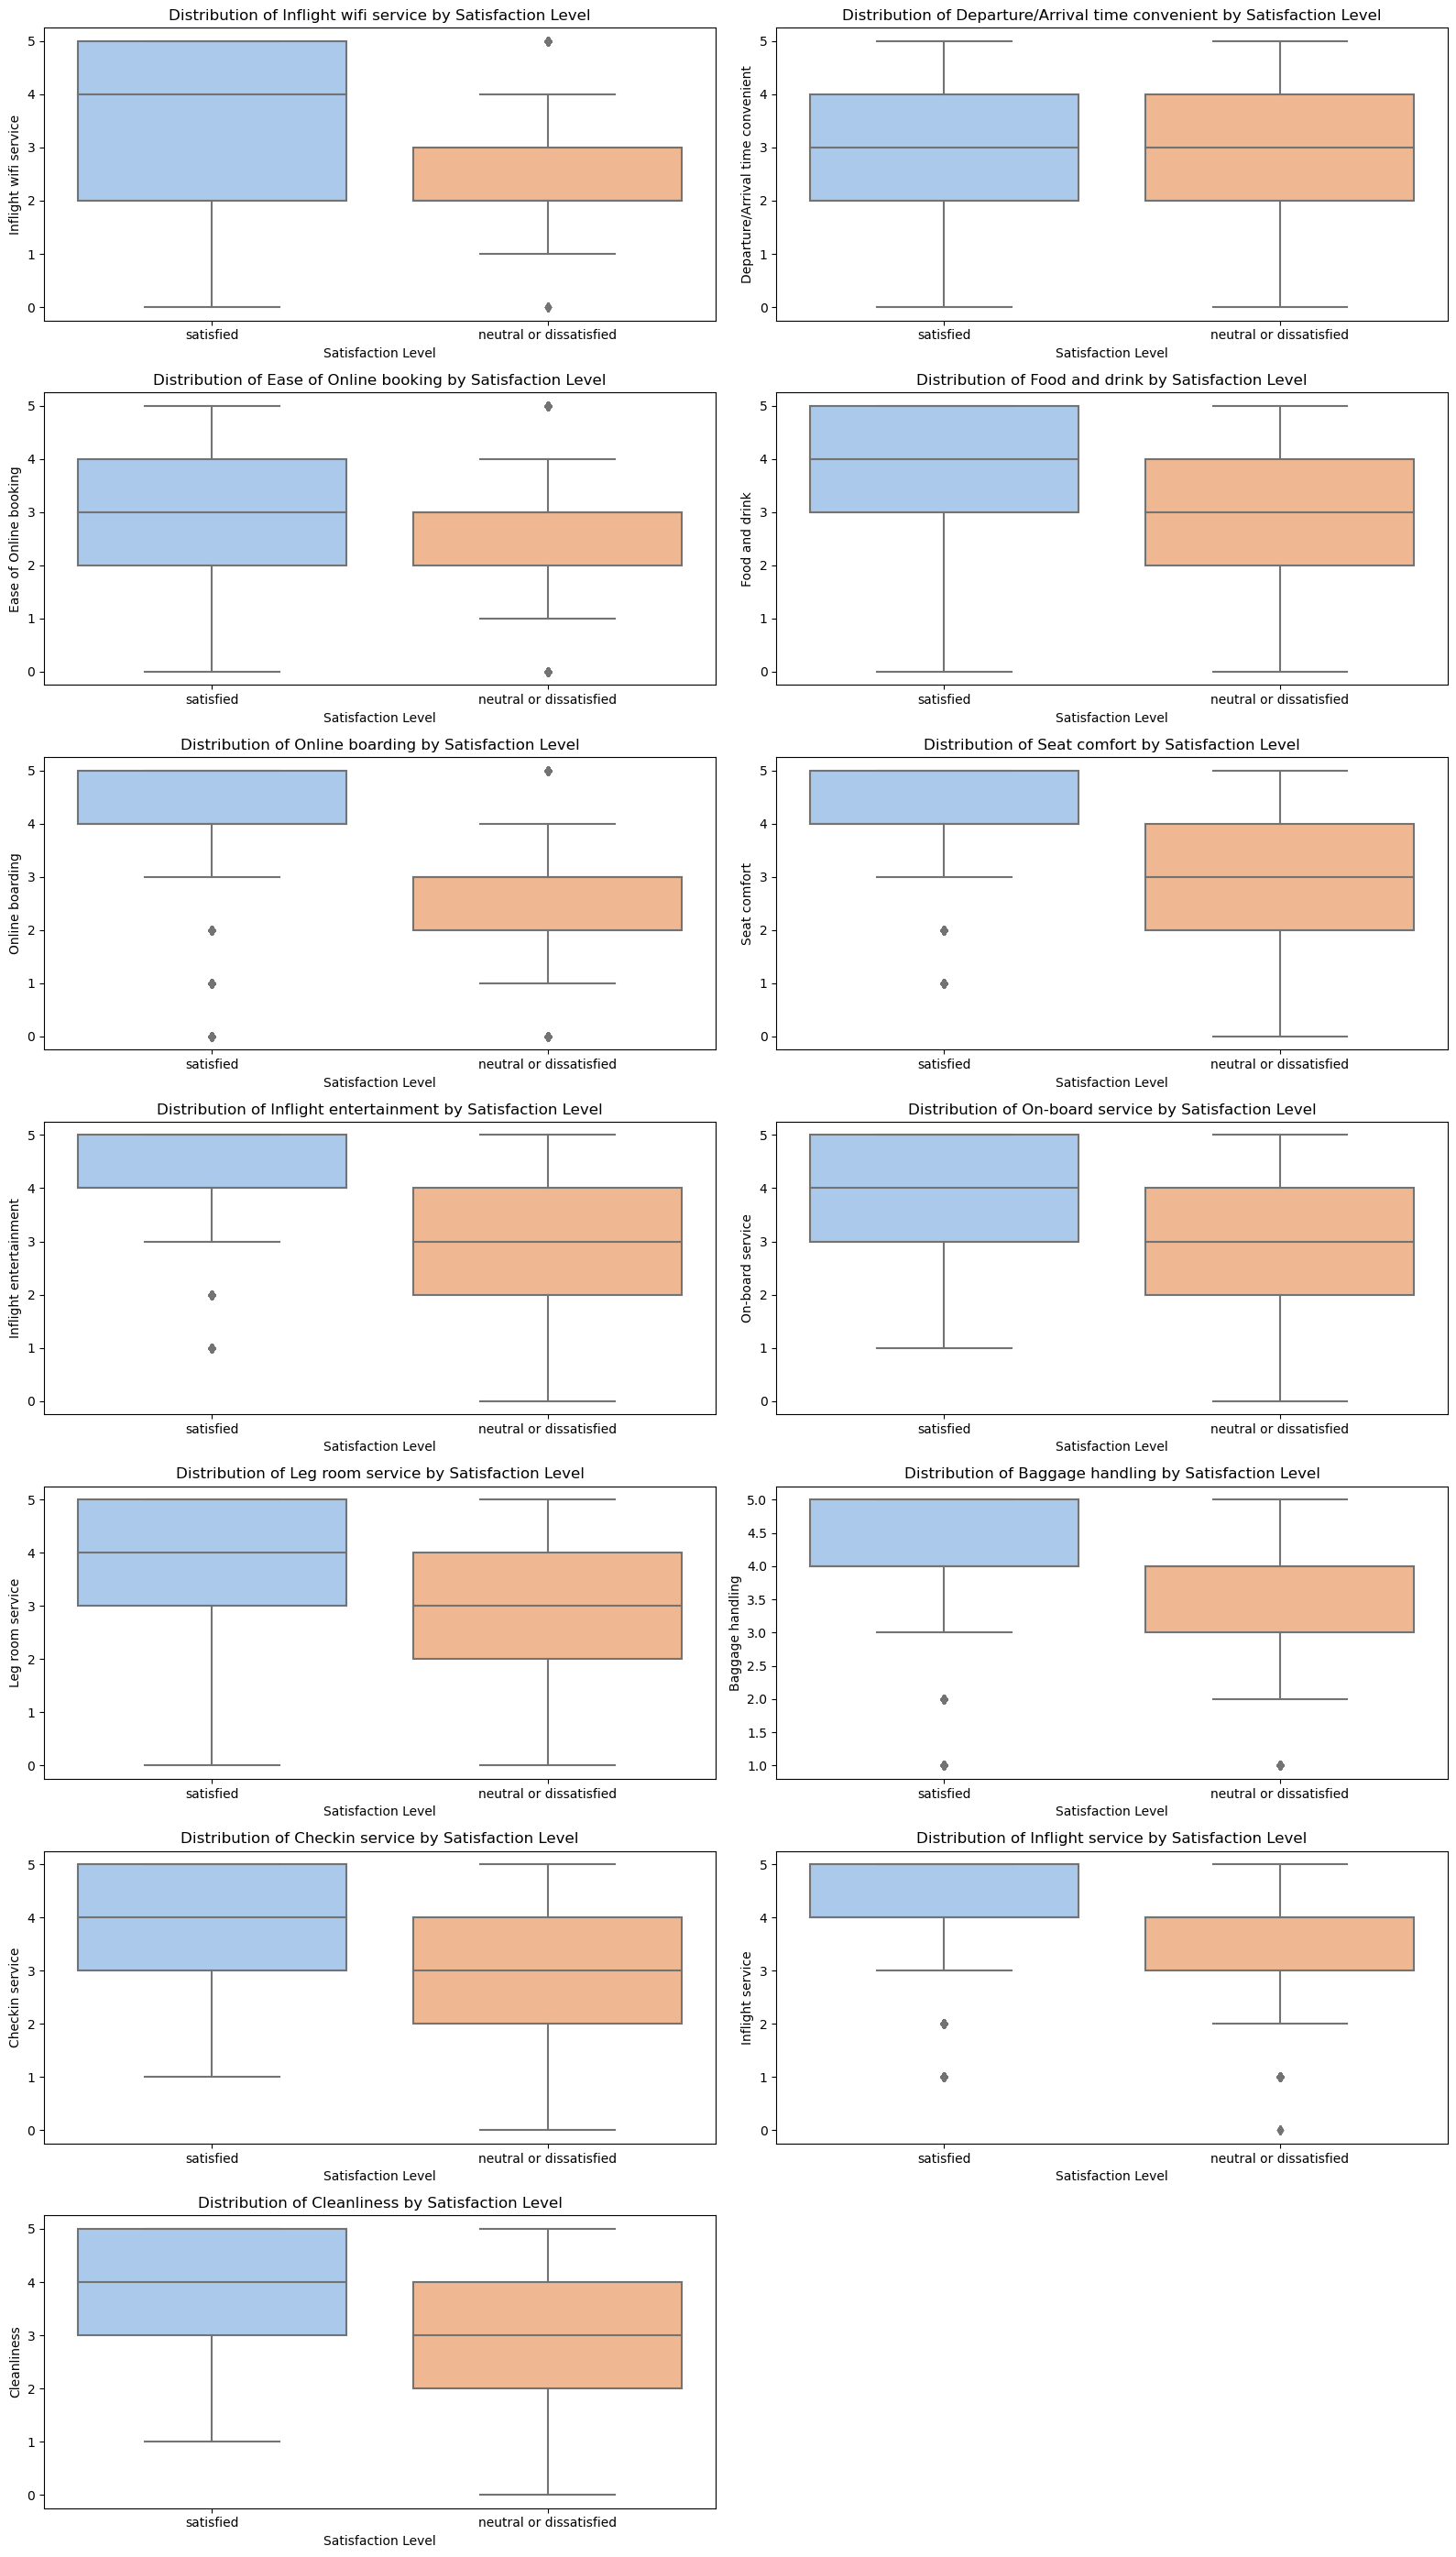

In [27]:
# Boxplots of Services to overall Satisfactions

# Define service columns
service_columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                   'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
                   'Inflight service', 'Cleanliness', 'satisfaction']

# Create subplots for each service rating
num_cols = len(service_columns) - 1  # Exclude 'satisfaction' column
num_rows = (num_cols + 1) // 2  # Calculate number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, num_rows * 4))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Iterate through each service rating and create a box plot
for i, column in enumerate(service_columns[:-1]):  # Exclude 'satisfaction' column
    sns.boxplot(x='satisfaction', y=column, data=df, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Satisfaction Level')
    axes[i].set_xlabel('Satisfaction Level')
    axes[i].set_ylabel(column)

# Hide the empty subplot if the number of columns is odd
if num_cols % 2 != 0:
    fig.delaxes(axes[num_cols])

# Showing the plot
plt.tight_layout()
plt.show()


**Serives Boxplots - Insights**  

The plots above show how passenger ratings for various are distributed across different levels of passenger satisfaction. Here are some general  insights we can see from these plots:

- In-flight entertainment, Seat comfort, Cabin cleanliness, and Onboard service:  `Passengers tend to be more satisfied with these airplane amenities` than not. The violin plots for these categories are all skewed to the right, with a wider body on the satisfaction side. This means more people rated these aspects highly.

- Food and Drink, Legroom, and Overhead storage: These plots are more symmetrical, which suggests a more even distribution of ratings across the satisfaction scale. There isn't a strong lean towards satisfaction or dissatisfaction for these features.

- Ease of Online Booking: `Passengers who are more satisfied with overall service also tend to report that finding it easy to book online`. This suggests that a smooth online booking experience can contribute to overall satisfaction. 

- Inflight Wifi service, Departure/Arrival time convenient: The plots for these features show some overlap across the satisfaction levels, making it difficult to see a clear correlation. 

- Online boarding, Checkin service:  For these features, there isn't a strong pattern between the ratings and satisfaction level. Passengers who are overall satisfied might not necessarily find online boarding or check-in to be especially convenient.

### *What is the highest mean rating of service indicators that could affect overall satisfaction?*

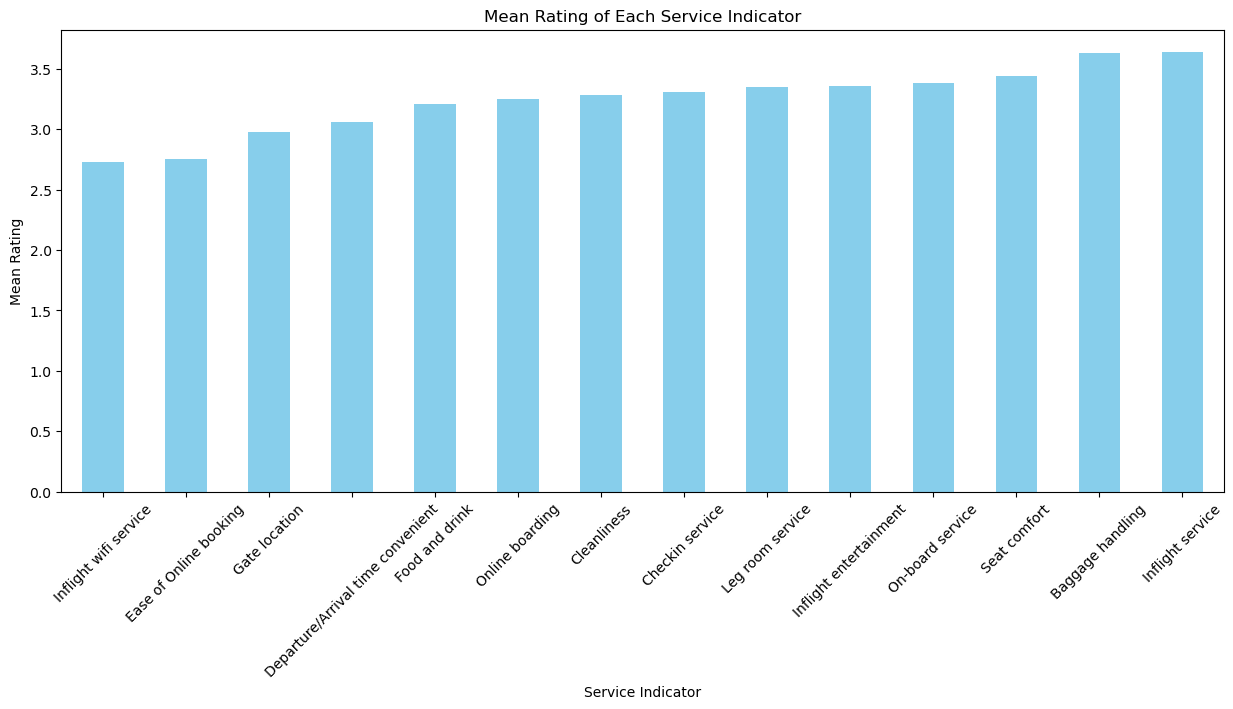

In [28]:
# Barplot for Mean of Services rating
plt.figure(figsize=(15, 6))

# Sort the DataFrame by mean rating in descending order
sorted_df = df[num_disc_cols].mean().sort_values(ascending=True)

# Plot the sorted mean ratings
sorted_df.plot(kind='bar', color=['skyblue'])
plt.title('Mean Rating of Each Service Indicator')
plt.xlabel('Service Indicator')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.show()




**Barplot - Insights**  

Based on the visualizations of the mean ratings for Japan's Airlines services, it's evident that passengers generally rate inflight service, baggage handling, and seat comfort the highest, with scores around 3.5 out of 5. However, services like inflight Wi-Fi, ease of online booking, and gate location received lower mean ratings, all below 3.0. This suggests that `these areas may require improvement to enhance overall passenger satisfaction`. Additionally, focusing on enhancing the quality of inflight Wi-Fi and the booking process could lead to improved customer experiences and higher satisfaction levels.

## EDA Insight's Summary


1. **Passenger Demographics:**
   - Majority of passengers fall within the age range of 20 to 60 years, with frequent passengers clustered around ages 39-40.
   - Younger (below 20) and elderly (age 60+) passengers are less frequent users of Japan's Airlines, suggesting potential areas for targeted marketing and service improvements to attract a wider demographic range.

2. **Flight Characteristics:**
   - Most flights cover distances ranging from 300 to 1200 miles, indicating common short to medium-haul routes, with occasional longer flights for both domestic and international travel.
   - Departure delays are typically moderate, ranging from 15 to 80 minutes, with occasional longer delays up to 240 minutes, impacting travel plans to varying degrees.

3. **Service Satisfaction:**
   - Inflight service, baggage handling, and seat comfort receive the highest mean ratings (around 3.5 out of 5), indicating areas of strength for Japan's Airlines.
   - Conversely, inflight Wi-Fi, ease of online booking, and gate location receive lower mean ratings (below 3.0), suggesting areas for improvement to enhance overall passenger satisfaction.

4. **Satisfaction Across Categories:**
   - Passengers tend to rate services like inflight entertainment, seat comfort, and cabin cleanliness more positively, while services like food and drink, legroom, and overhead storage show more varied ratings.
   - A smooth online booking experience correlates with higher overall satisfaction, while aspects like inflight Wi-Fi and departure/arrival time convenience exhibit less clear correlations.

5. **Travel Type and Satisfaction:**
   - Business travelers generally report higher satisfaction levels compared to personal travelers, indicating potentially different service expectations or experiences tailored to travel purposes.

6. **Class of Service and Satisfaction:**
   - Passengers in business class tend to have higher satisfaction levels compared to those in economy or economy plus, highlighting the importance of service class in shaping overall passenger satisfaction.

7. **Impact of Departure Delay on Satisfaction:**
   - Passenger satisfaction declines as departure delays exceed approximately 12 minutes, emphasizing the importance of minimizing delays to maintain high satisfaction levels.

8. **Age, Gender, and Travel Type Interactions:**
   - Older passengers, particularly those aged 40 and above, tend to exhibit higher satisfaction levels, especially when traveling for business purposes.

Overall, these insights provide valuable guidance for Japan's Airlines to identify areas of improvement, enhance service offerings, and tailor experiences to meet passenger expectations effectively, ultimately contributing to higher satisfaction levels and customer loyalty.

# **5. Feature Engineering**

**Feature Engineering - Introduction**

Now that we've gained valuable insights, it's time to delve into feature engineering to enhance our modeling process. Before we proceed, it's imperative to ensure our dataset is meticulously prepared for analysis. Here's an overview of the crucial steps involved:

- **Data Cleaning:** We'll meticulously clean our data by addressing any missing or duplicate values, ensuring our dataset is free from inconsistencies.

- **Target Validation:** It's essential to validate our target variable to confirm that it accurately reflects our modeling objectives and aligns with our business goals.

- **Feature and Target Separation:** We'll separate our dataset into features and the target variable, enabling us to focus on predictive variables and the outcome we aim to predict.

- **Train-Test Split:** To evaluate the performance of our models accurately, we'll split our data into training and testing sets, allowing us to train our models on one subset and evaluate their performance on another.

- **Outlier Handling:** Addressing outliers is crucial to prevent them from skewing our model's predictions. We'll employ strategies to handle outliers effectively and ensure they don't unduly influence our results.

- **Categorical Encoding:** Since many machine learning algorithms require numerical inputs, we'll encode categorical variables into numerical format, making them compatible with our models.

- **Numerical Scaling:** To prevent biases in model training, we'll scale our numerical features to a standardized range, ensuring all features contribute equally to the model's learning process.

By incorporating these steps into our feature engineering process, we'll adopt a systematic and efficient approach to model development. We'll utilize pipeline processing to streamline these tasks, facilitating seamless integration and enhancing the overall effectiveness of our modeling efforts.

## Data Cleaning

### *Handling Missing Values*

Since we already checked back in Data Loading that there are **393 missing values or 0.3025% of whole data** in `Arrival Delay in Minutes` column, then we have to handle this missing values. But first, lets identify types of missing values that we have to handle.

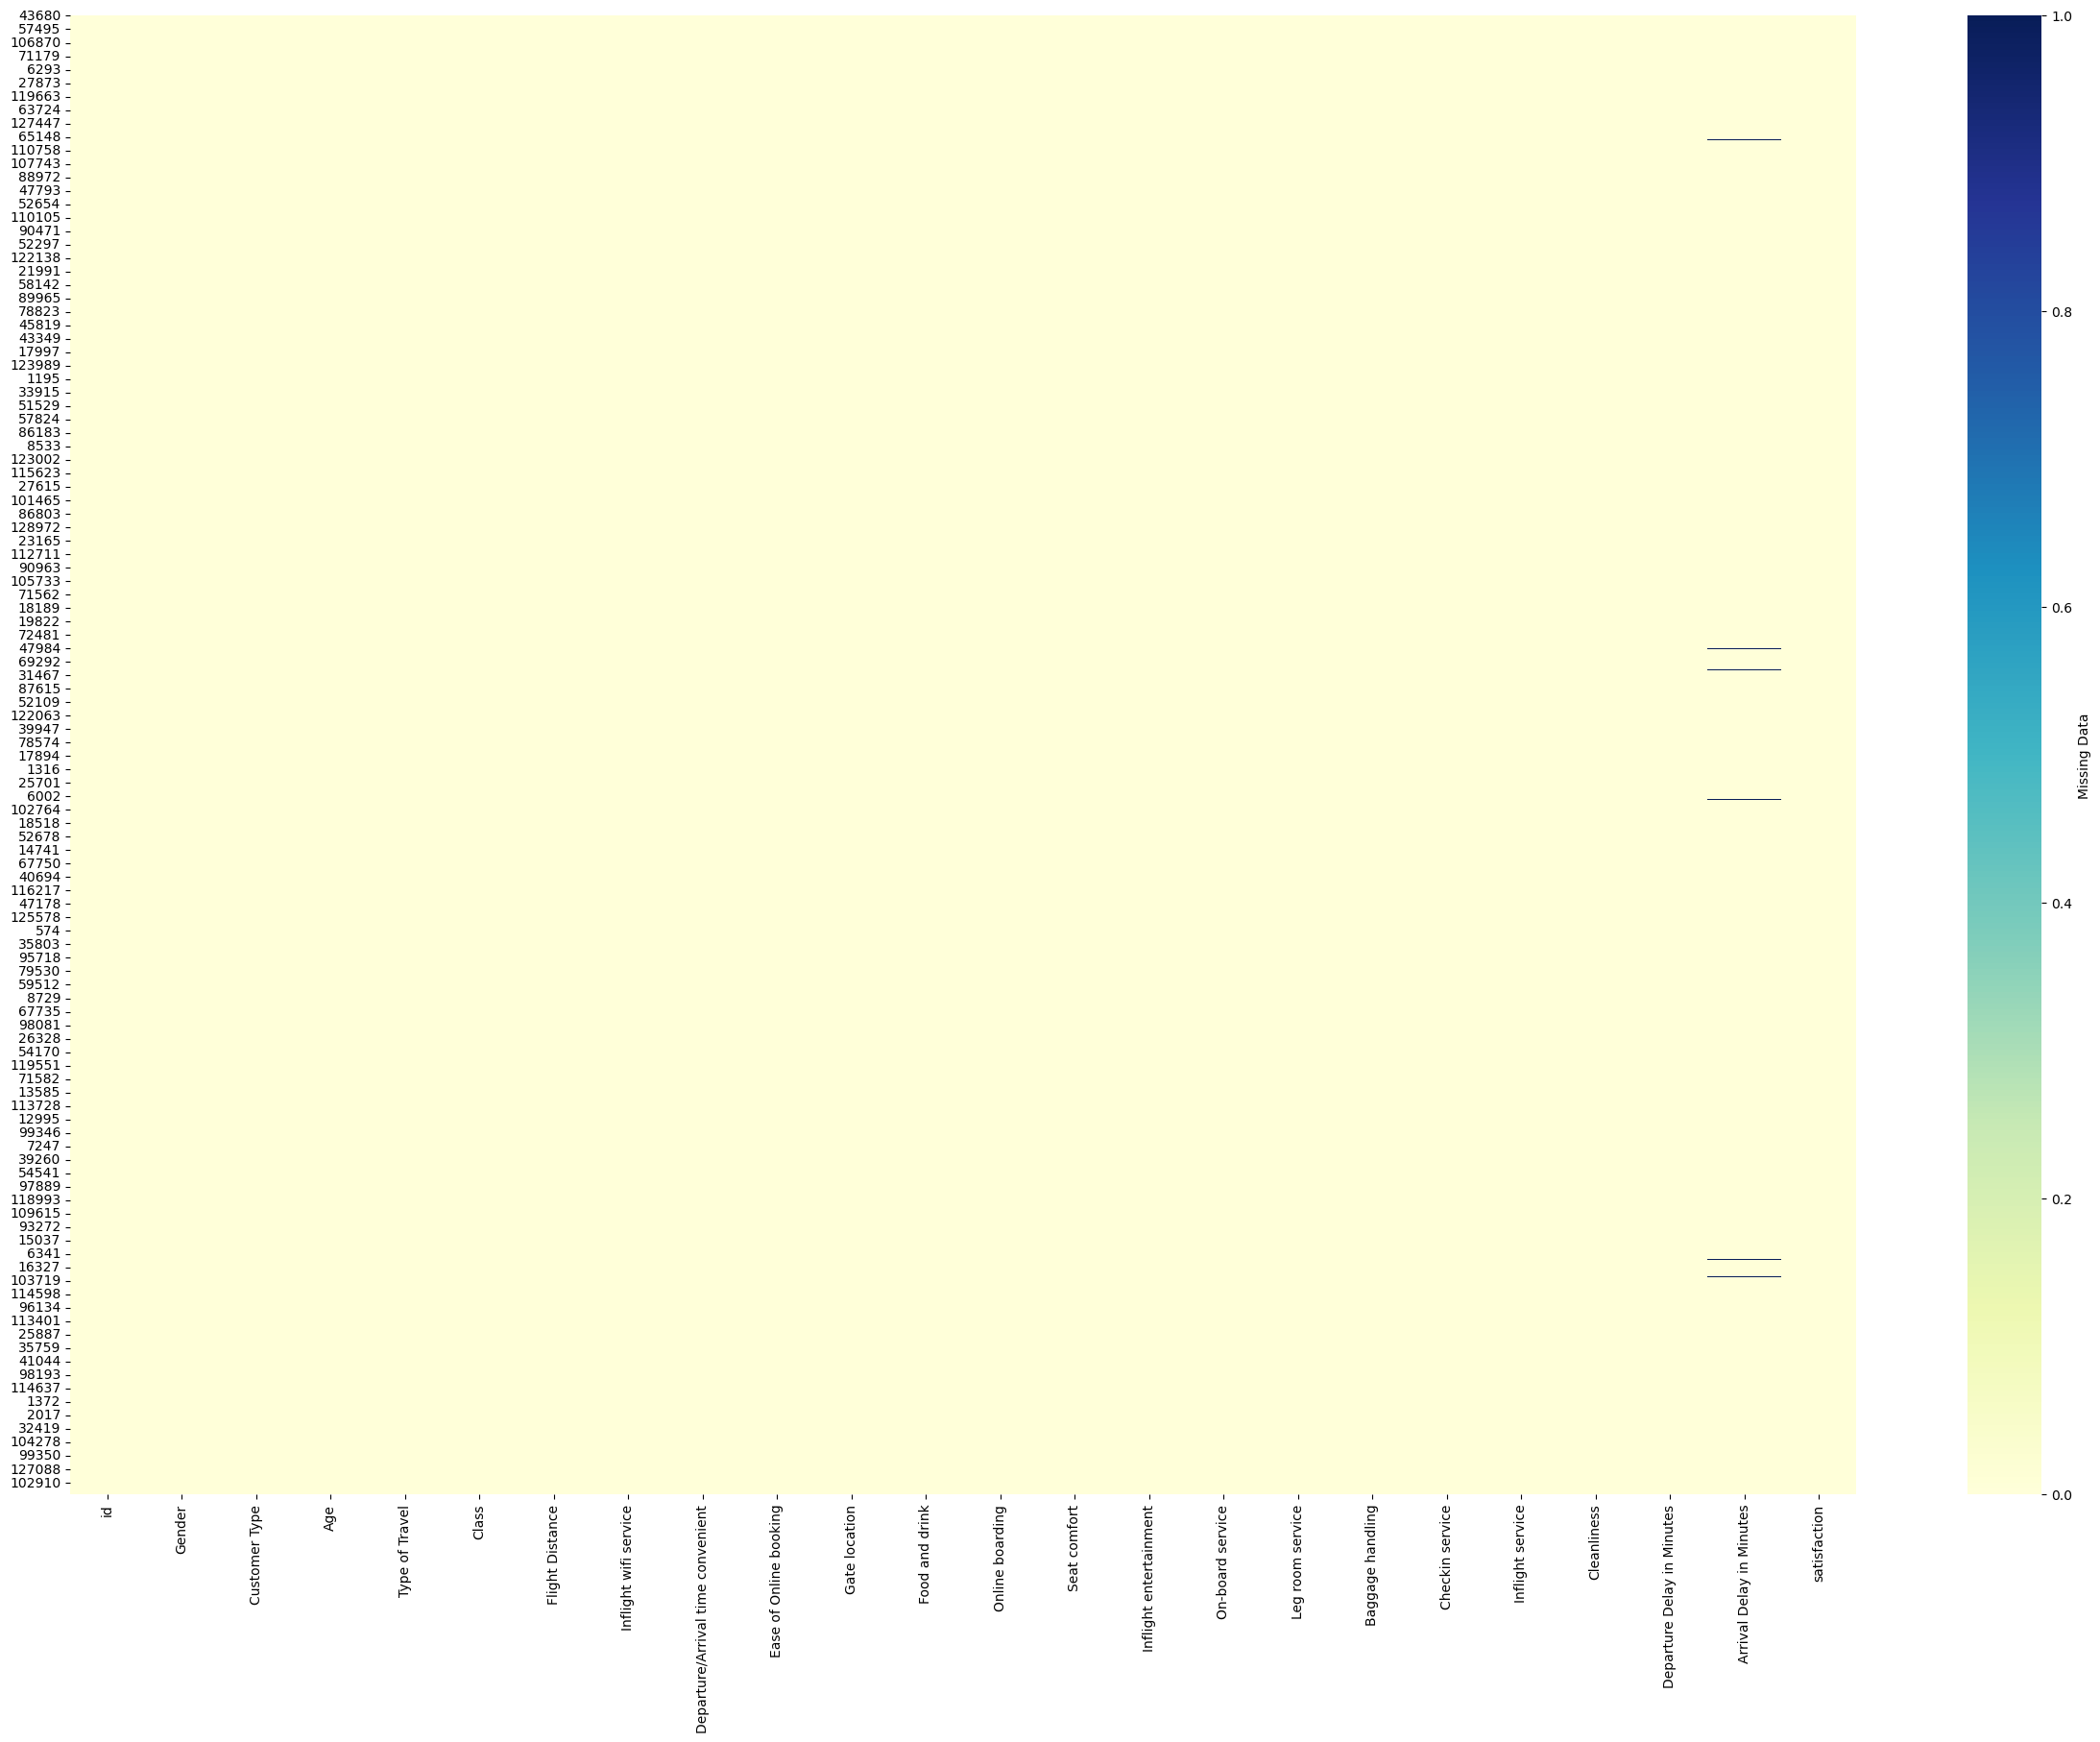

In [29]:
# Missing value heatmap analysis
plt.figure(figsize=(30,20))

# Visualize the missing value using heatmap
sns.heatmap(df.sample(10000).isna(), cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

# show the plot
plt.show()

**Missing Value Analysis - Explanation**  

As we could see from the visualization sample from df above, the heatmap does not really show that the missing values have any significant patterns. Possibly, its `Missing Compeletely at Random (MCAR)` because based on the observation that missing values are only present in the `Arrival Delay in Minutes` column and do not exhibit any discernible patterns in relation to other variables, it suggests that the missing values are likely random and can be caused of human/machine error or other causes.

Given this assumption, it's reasonable to handle the missing values through imputation techniques. One approach could be to impute the missing values with the mean or median of the existing data in the `Arrival Delay in Minutes` column, as this would preserve the overall distribution of arrival delay times while filling in the missing values. In this case, i will choose imputin missing values with median because of chance of skewness on the column. Also, since the missing value is so small in comparison to the whole data set, i think it is safe to handle the missing value this way as it wouldnt affect the model too much.

In [30]:
# Impute missing values with median
median_delay = df['Arrival Delay in Minutes'].median()

df['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)

# Checking missing values again
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

**Impute Missing Values - Explanation**

Code above calculates the median value of the 'Arrival Delay in Minutes' column and fills in any missing values in that column with this median value. And from the output of missing values counts, we could see that the missing value output of each column is 0, `meaning the missing value has been successfully handled`.

### *Handling Duplicate Values*

Since we already checked duplicate values in Data Loading and the output is 0, meaning `there aren't any duplicate values to handle`. So, we can skip this process entirely. 

## Target Column & Features Validation

In [31]:
# Checking Target Column
df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

**Checking Target Column - Explanation**  

This code above retrieves the unique values present in the `satisfaction` column of the DataFrame which is our target column. From the output we could see that the column consists of two unique values, which are 'satisfied' and 'neutral or dissatisfied' so it typically indicates a binary classification problem. In this case, `it's important to encode these categorical labels into numerical format` for model compatibility.

In [32]:
# Define the mapping dictionary
mapping = {'satisfied': 1, 
           'neutral or dissatisfied': 0}

# Replace the values in the 'satisfaction' column
df['satisfaction'] = df['satisfaction'].map(mapping)

# Display the updated df
df['satisfaction'].head()


0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int64

**Map the Column Target Values into Binary - Explanation**  

Code above creates a dictionary mapping the categorical values in the "satisfaction" column to numerical values (1 for "satisfied" and 0 for "neutral or dissatisfied"), then replaces the categorical values with their corresponding numerical values in the DataFrame's "satisfaction" column, effectively encoding it. We could see from the head() output that `we have successfully mapped the target column categorical values into numerical binary values`.

In [33]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [34]:
# Checking Ordinal Categorical Features columns
gender_unique = df['Gender'].unique()
cust_type_unique = df['Customer Type'].unique()
type_travel_unique = df['Type of Travel'].unique()
class_unique = df['Class'].unique()

print('Unique values of Gender:',gender_unique)
print()
print('Unique values of Customer Type:', cust_type_unique)
print()
print('Unique values of Type of Travel:', type_travel_unique)
print()
print('Unique values of Class:', class_unique)


Unique values of Gender: ['Female' 'Male']

Unique values of Customer Type: ['Loyal Customer' 'disloyal Customer']

Unique values of Type of Travel: ['Business travel' 'Personal Travel']

Unique values of Class: ['Eco' 'Business' 'Eco Plus']


**Checking Ordinal Categorical Features Columns - Explanation**

From the output above we could see that Gender, Customer Type, Type of Travel, and Class are categorical variables with multiple levels. To utilize these variables in machine learning models effectively, we need to encode them into numerical format. Mapping categorical variables to numerical values allows algorithms to interpret and process the data, enabling the model to learn patterns and make predictions based on these features.

## Feature - Target Split

In [36]:
# Split between features (X) and Target (y)
X = df.drop(columns=['satisfaction'], axis=1)      # X as feature should drop satisfaction(targeted columns)
y = df['satisfaction']                             # y only consist of target

**Feature (X) - Target (y) Split - Explanation**  

Code above separates the dataset into two components: 

- `X`, which contains all the features except for the target variable 'satisfaction' 
- `y`, which consists solely of the target variable.  

This separation enables us to focus on the features that will be used to make predictions and the target variable we aim to predict, streamlining the modeling process. Separating features from the target is vital for supervised learning. It isolates the variable we aim to predict (the target) from the ones used for prediction (features), preventing the model from learning from the target during training, thus `avoiding bias or overfitting`.

## Train - Test Split

In [37]:
# Split between Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    stratify = y,
                                                    random_state = 14)


# Checking the Size of Train and Test
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (90916, 23)
X test shape: (38964, 23)
y train shape: (90916,)
y test shape: (38964,)


**Split between Train and Test Data - Explanation**  

We partitioned our dataset into two subsets to facilitate the model building process: 

- **Training Set** (X_train, y_train) consists of 90,916 samples and 23 features. This subset is used to train the model on historical data, allowing it to learn patterns and relationships between features and the target variable.

- **Test Set** (X_test, y_test) comprises 38,964 samples and 23 features. This subset remains unseen by the model during training and serves as an independent dataset to evaluate the model's performance. By withholding a portion of the data for testing, we can assess how well the model generalizes to new, unseen data.

We specified a test set size of 30% (`test_size = 0.3`), allocating 30% of the data to the test set and 70% to the training set. This balance ensures a sufficient amount of data for both training and testing while preventing over-fitting.

Additionally, setting `random_state = 14` ensures reproducibility, meaning that the same random split will be generated each time the code is executed. This allows for consistent evaluation and comparison of models across different runs.

## Outlier Handling

In [38]:
# Filer Numerical Columns in X train
numeric_columns = X_train.select_dtypes(include=np.number).columns.to_list()

# Skewed columns container
skewed_numeric_data = []
skewed_numeric_columns = []

# Normal distribution columns container
normal_numeric_data = []
normal_numeric_columns = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for column in numeric_columns:
    skewness = X_train[column].skew()
    # If Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        normal_numeric_columns.append(column)
        normal_numeric_data.append([column, skewness])
    # If Skewed distribution
    elif skewness < -0.5 or skewness > 0.5:
        skewed_numeric_columns.append(column)
        skewed_numeric_data.append([column, skewness])

**Handling Outliers - Explanation**  
To handle outliers, we need to identify the skewness of each numeric column in X train. Using the .skew() method and a for loop, we can filter the skewness of the data.
- If the skewness of the data is 0.5 or less and greater than -0.5, it falls into the category of normally distributed.
- If the skewness of the data is greater than 0.5 or less than -0.5, then it falls into the category of skewed data.

In [39]:
# Showing all columns with normal distribution and each skewness
print('Columns with Normal Distribution')
pd.DataFrame(data=normal_numeric_data, columns=['normal_distributed_columns', 'skewness'])

Columns with Normal Distribution


,normal_distributed_columns,skewness
0,id,-0.003812
1,Gender,0.030538
2,Age,0.000195
3,Class,-0.053377
4,Inflight wifi service,0.041749
5,Departure/Arrival time convenient,-0.324728
6,Ease of Online booking,-0.018605
7,Gate location,-0.051580
8,Food and drink,-0.163272
9,Online boarding,-0.457675


**Columns with Normal Distribution - Explanation**  
There are 16 columns in the data with normal distribution (skewness <= 0.59 and >= -5). `Outliers in the normally distributed columns will be handled using the Gaussian method employing the winsorizer module`. The Gaussian method in winsorizer is employed to address outliers by replacing extreme values with those from a Gaussian distribution, ensuring robustness and maintaining data integrity across various datasets and distributions.

In [40]:
# Showing all columns with skewed distribution and each skewness
print('Columns with Skewed Distribution')
pd.DataFrame(data=skewed_numeric_data, columns=['skewed_columns', 'skewness'])

Columns with Skewed Distribution


,skewed_columns,skewness
0,Customer Type,-1.636986
1,Type of Travel,-0.820978
2,Flight Distance,1.110424
3,Baggage handling,-0.671882
4,Inflight service,-0.693934
5,Departure Delay in Minutes,7.229887
6,Arrival Delay in Minutes,7.060245


**Columns with Skewed Distribution - Explanation**  
There are 7 columns in the data with skewed distribution (skewness > 0.5 and < -5). `Outliers in the skewed distributed columns will be handled using the IQR employing winsorizer module`. The IQR (Interquartile Range) method in winsorizer is used to robustly handle outliers by replacing extreme values with less extreme ones based on the spread of the data, offering flexibility and preserving data integrity across various distributions.

### *Capping or Censoring Method*

In [41]:
# define low variation columns in normal_distributed_columns
low_var_cols_skewed = ['Customer Type']

# Drop the low variation columns in skewed columns
for column in low_var_cols_skewed:
    skewed_numeric_columns.remove(column)

**Remove Columns with Low Variance - Explanation**  
To avoid value error and since Customer Type is ordinal values, we will this column from being outlier handled and add it back later on.

In [42]:
# Capping Method for Normal Distribution  
winsorizer_normal_distribution = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_distribution.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_distribution.transform(X_test)

**Capping Normal Distribution Using Gaussian - Explanation**  
Using the code above we cap outliers using the Gaussian method for columns with normally distributed data, we will proceed to cap using the IQR method for skewed columns.

In [43]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=skewed_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

**Capping Skewed Distribution Using IQR**  
Using the code above we cap outliers using the IQR method for columns with skewed distributed data.

In [44]:
# Appending back low variation columns in skewed columns
for column in low_var_cols_skewed:
    skewed_numeric_columns.append(column)

**Appending Low var Back to Its Columns**  
after capping we can append the removed columns back to each category to be further analyzed

In [45]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


**Visualizing Before and After Outlier Handling Function - Explanation**  
Due to the large number of columns to be plotted, I decided to create a function named `outlier_handling_plot_comparison` which takes three parameters:

- `df_before`: Pandas DataFrame containing data before outlier handling.
- `df_after`: Pandas DataFrame containing data after outlier handling.
- `variable`: A string representing the name of the variable/column to be plotted.

This function will create Histogram and Boxplot visualizations before and after outlier handling for all numerical columns.
I will demonstrate its usage with examples in the function's docstring in the following code.

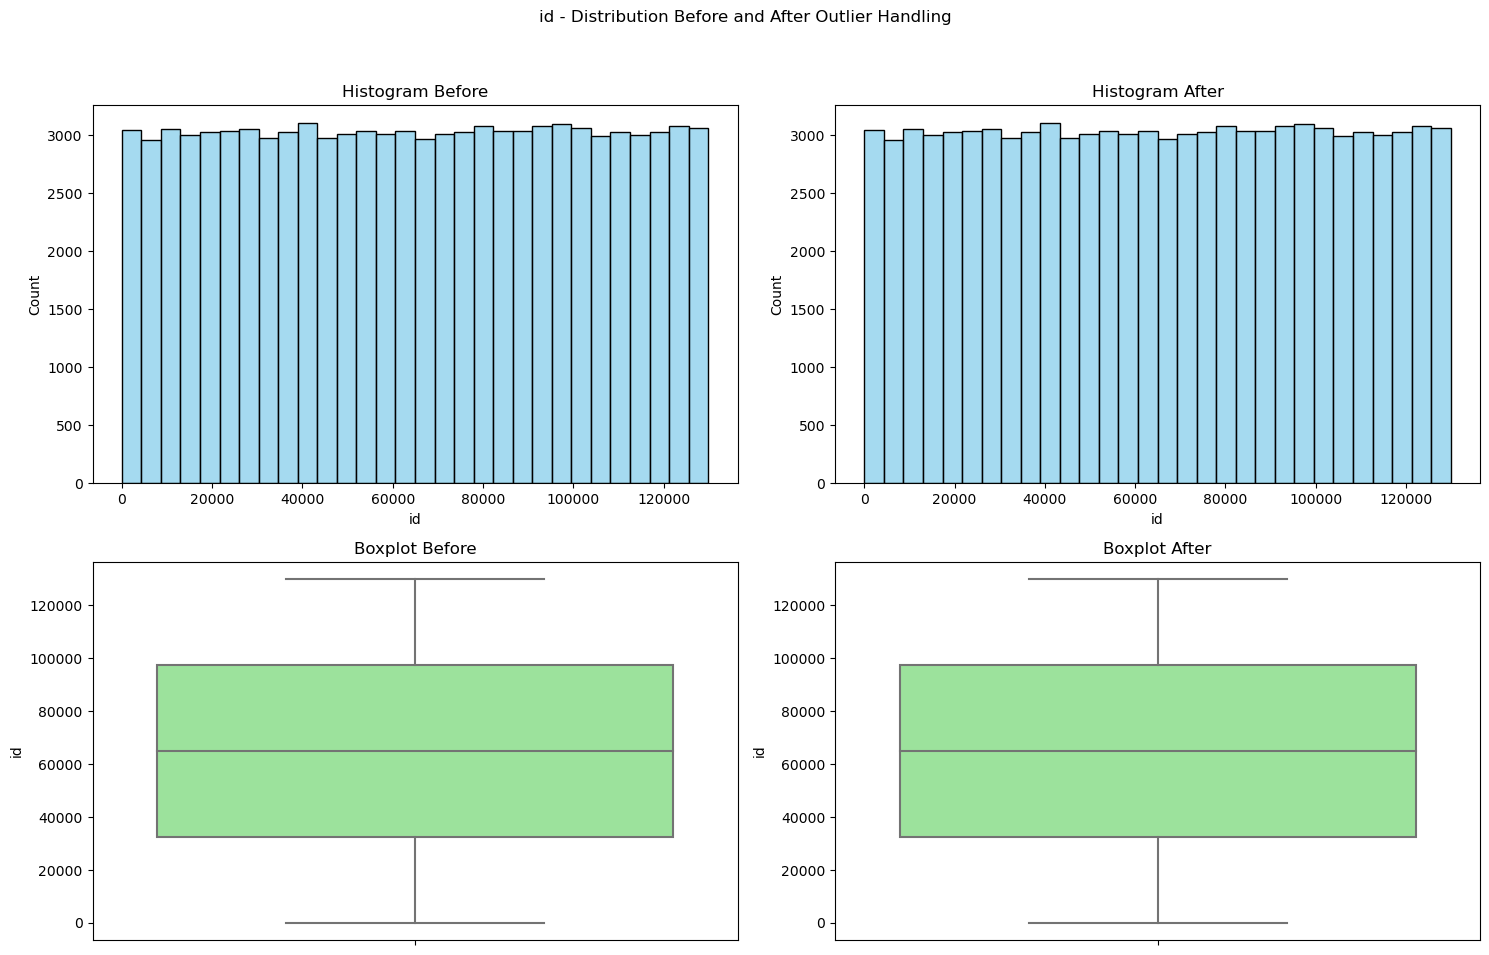

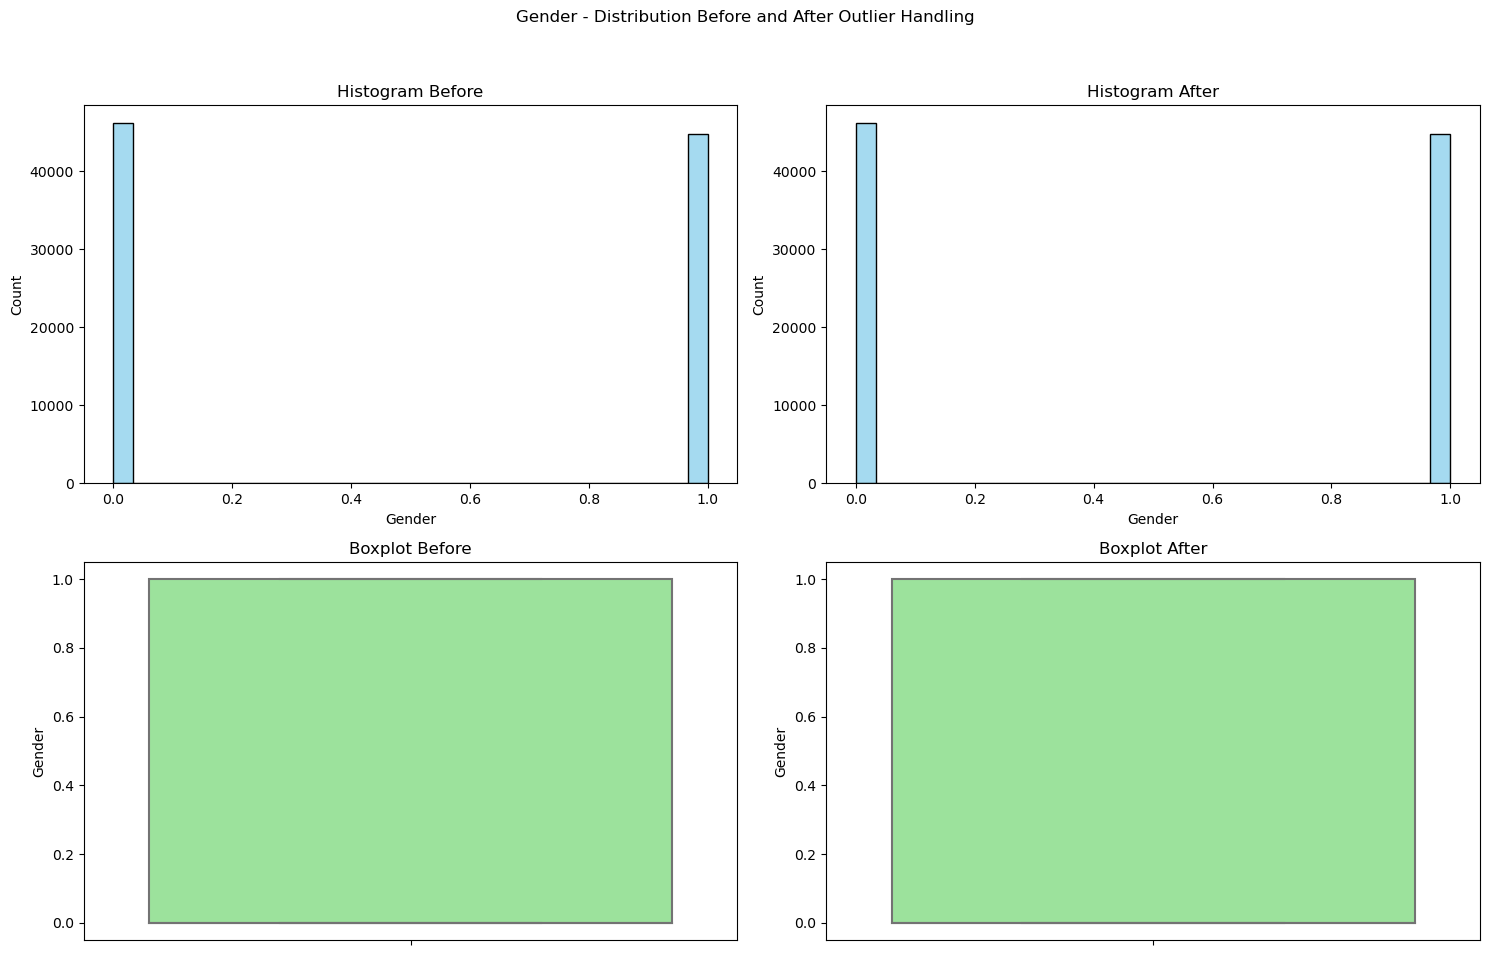

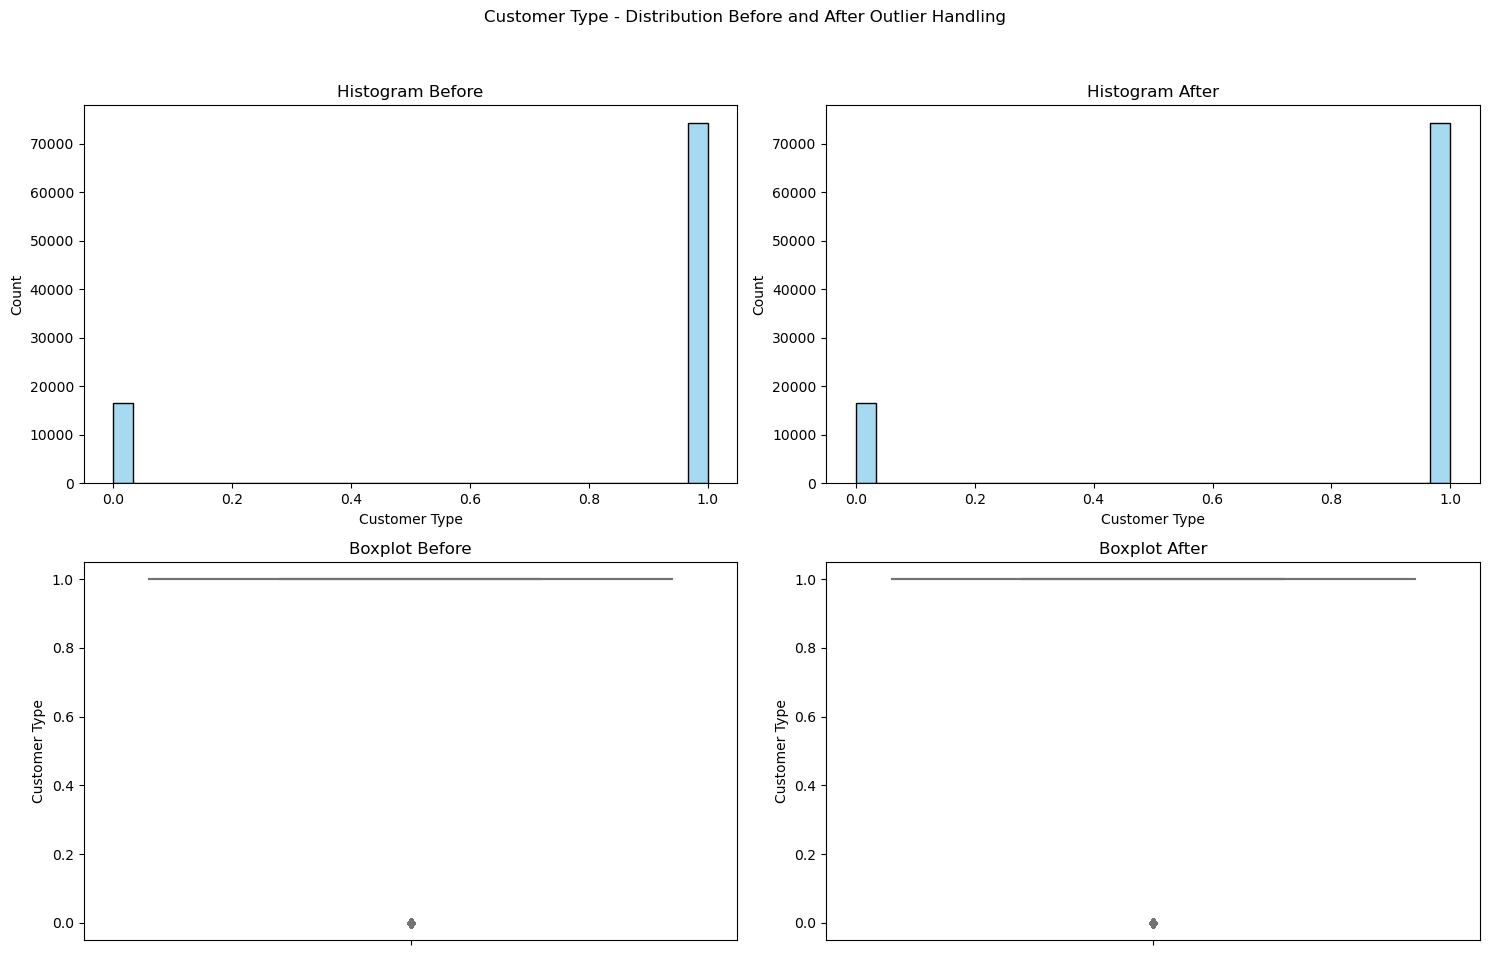

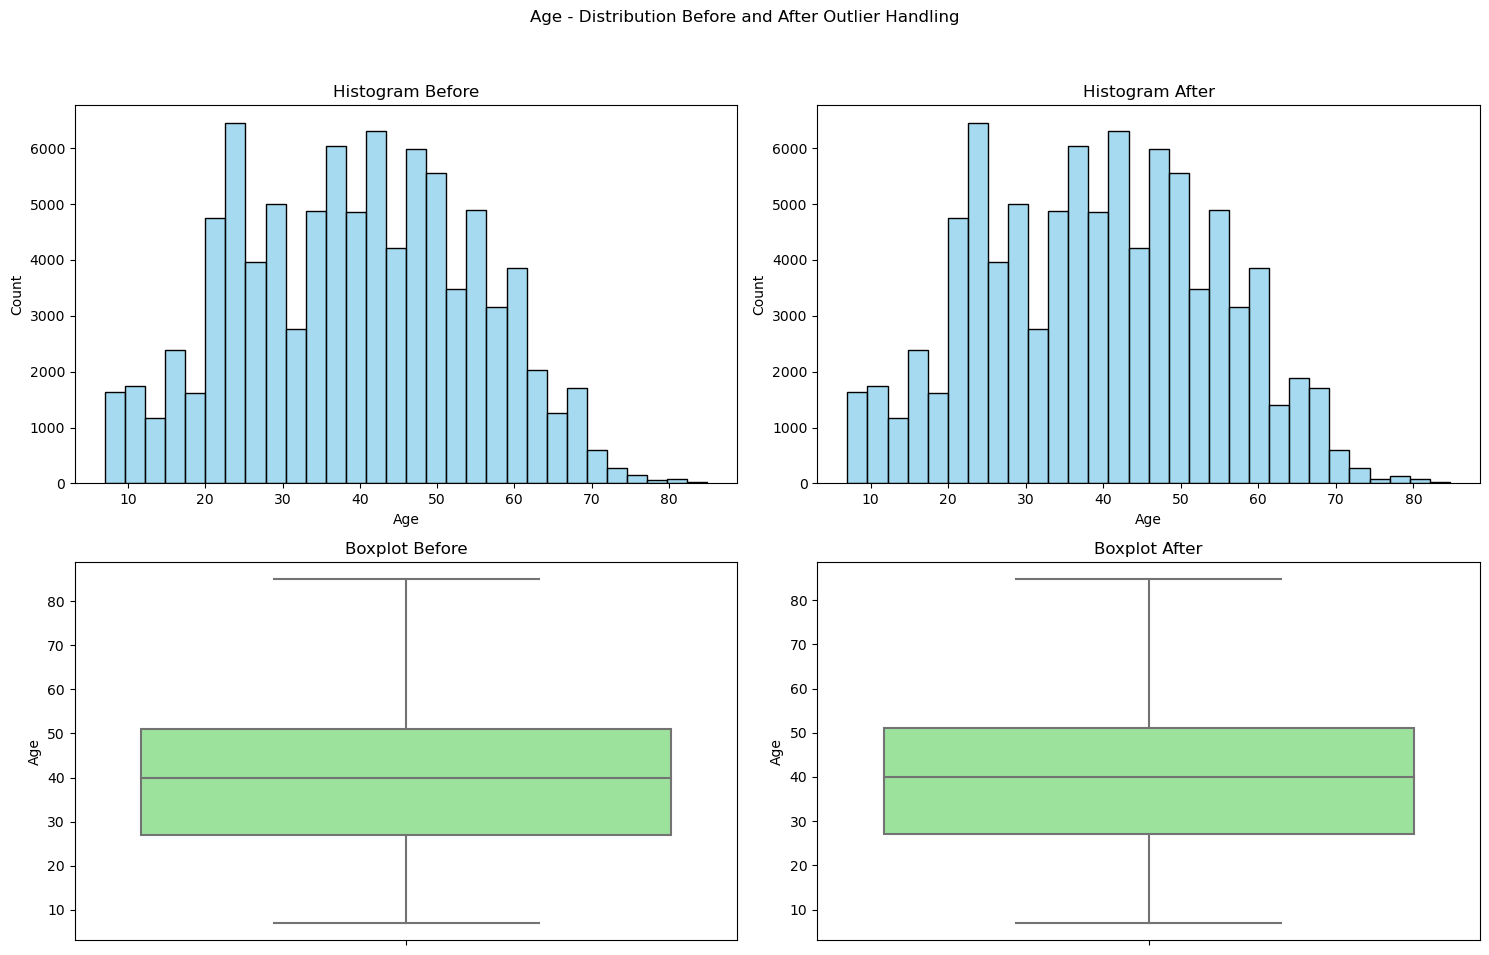

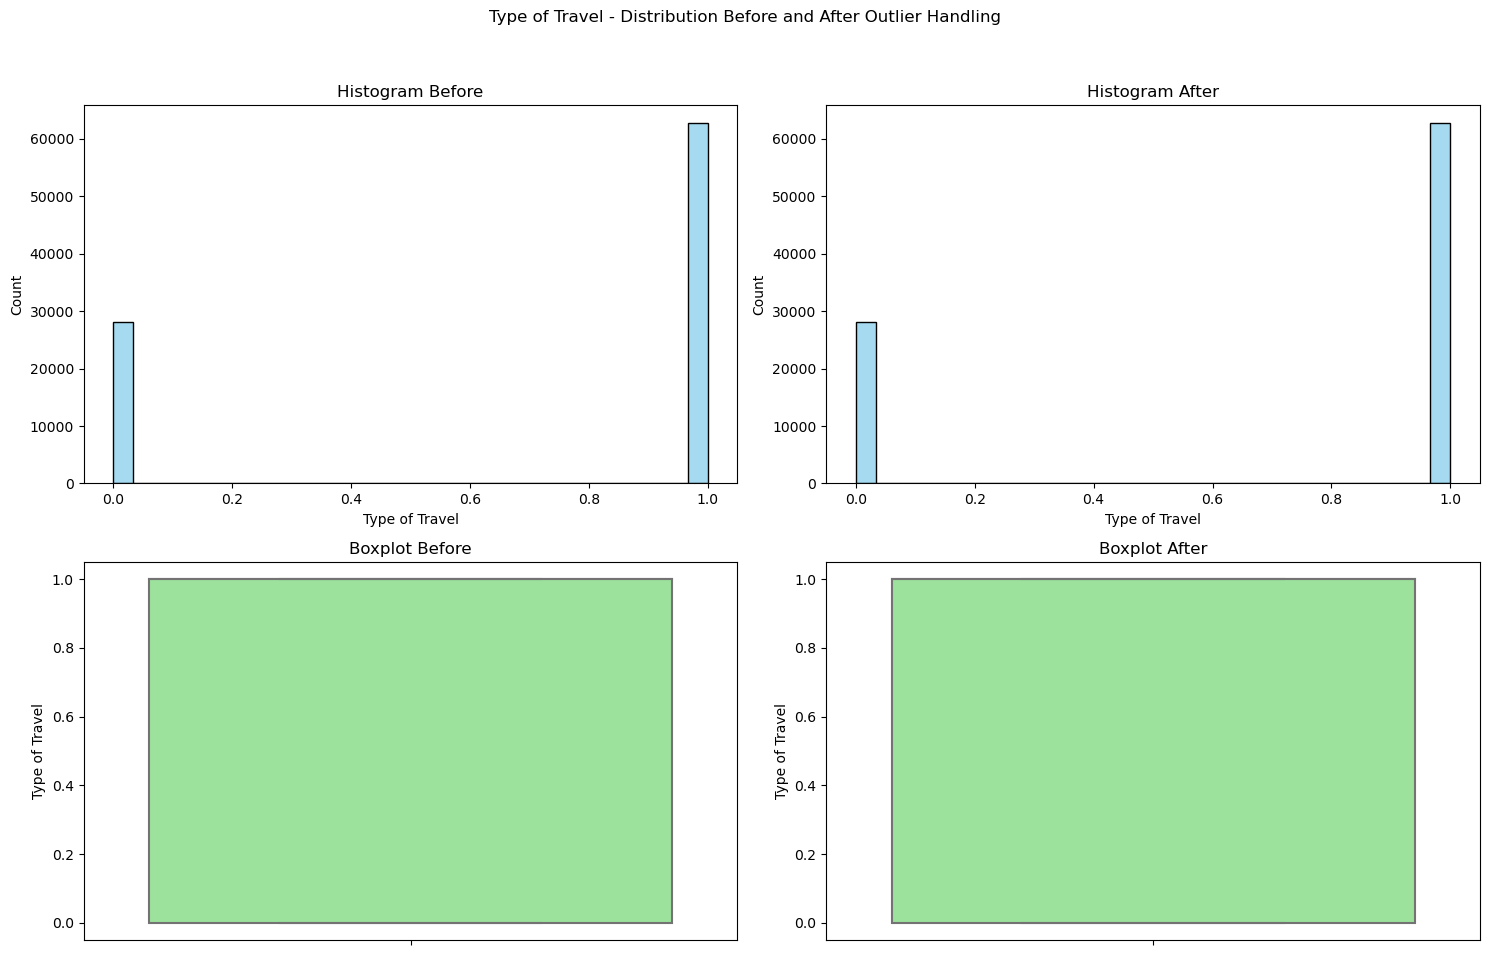

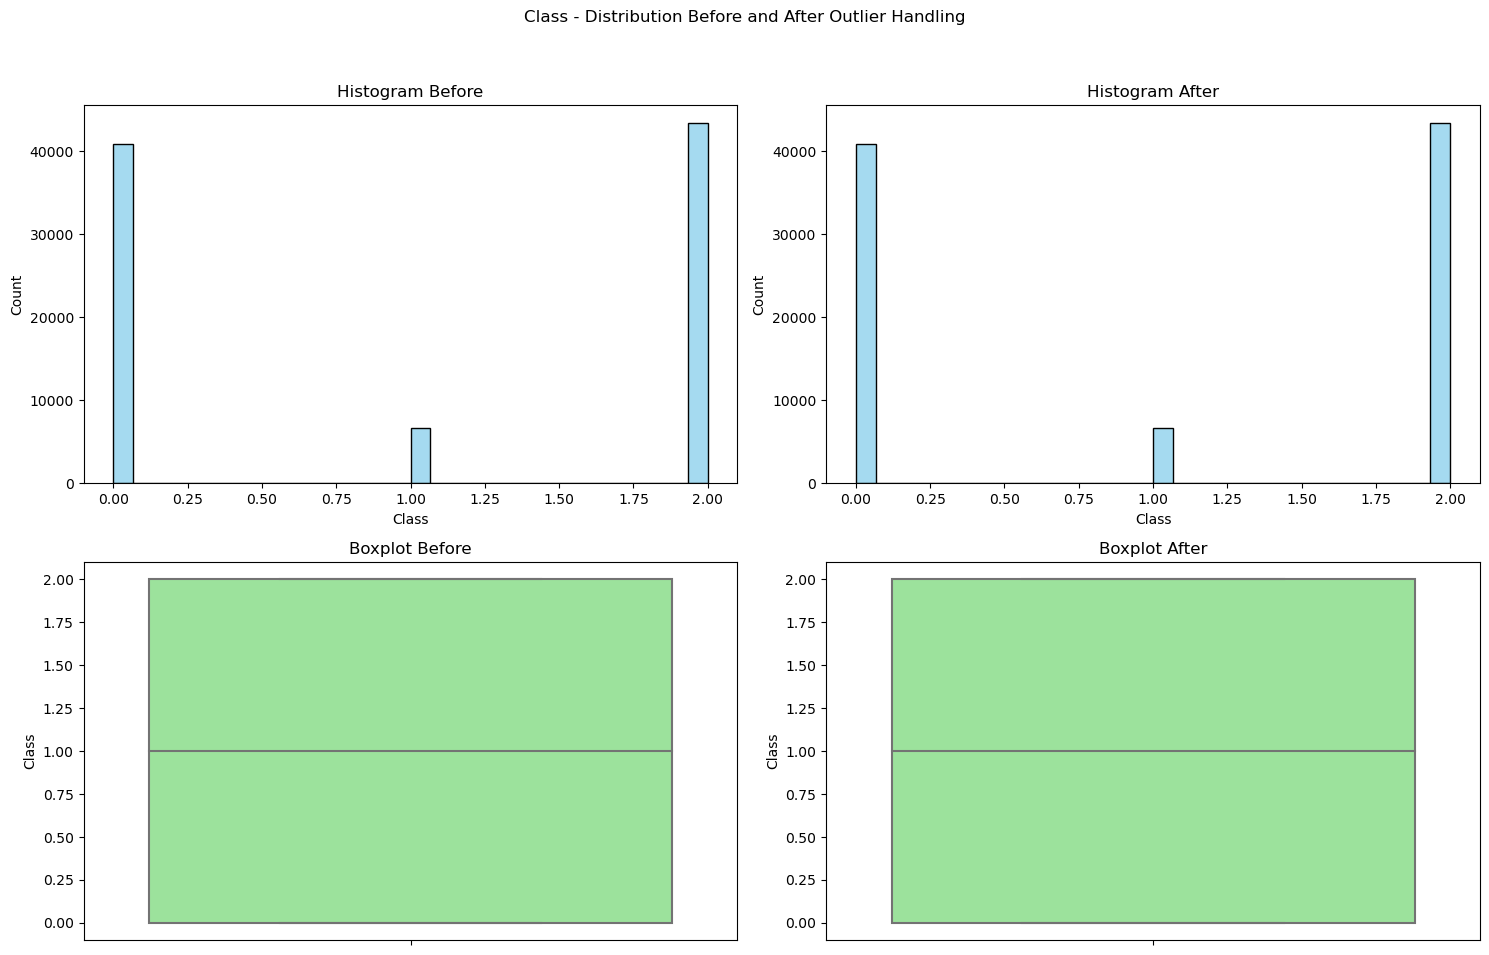

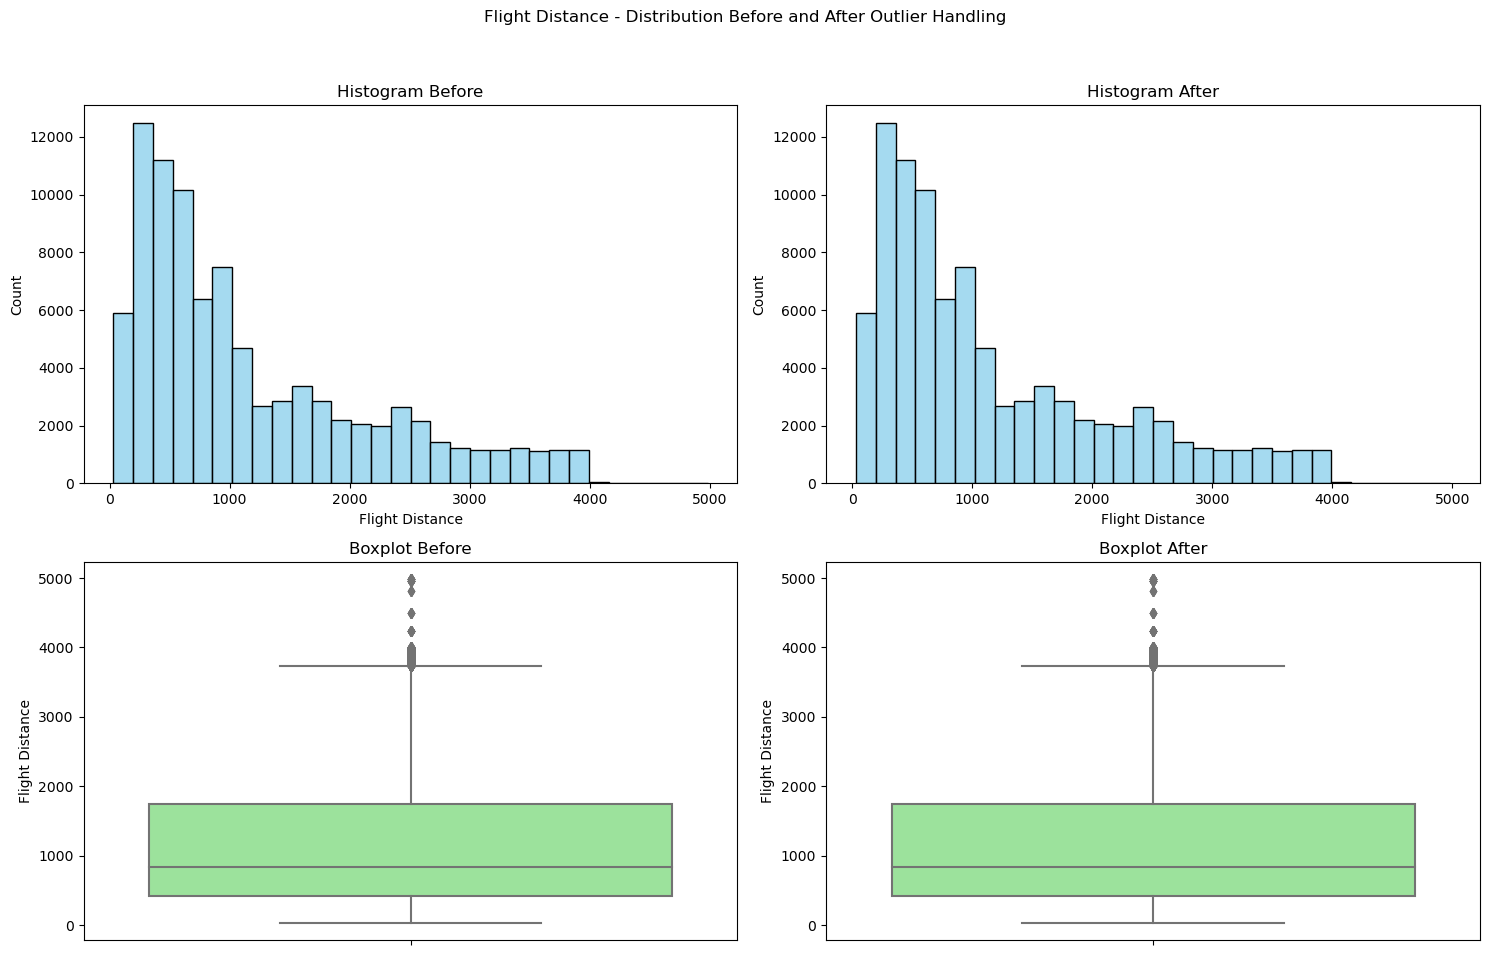

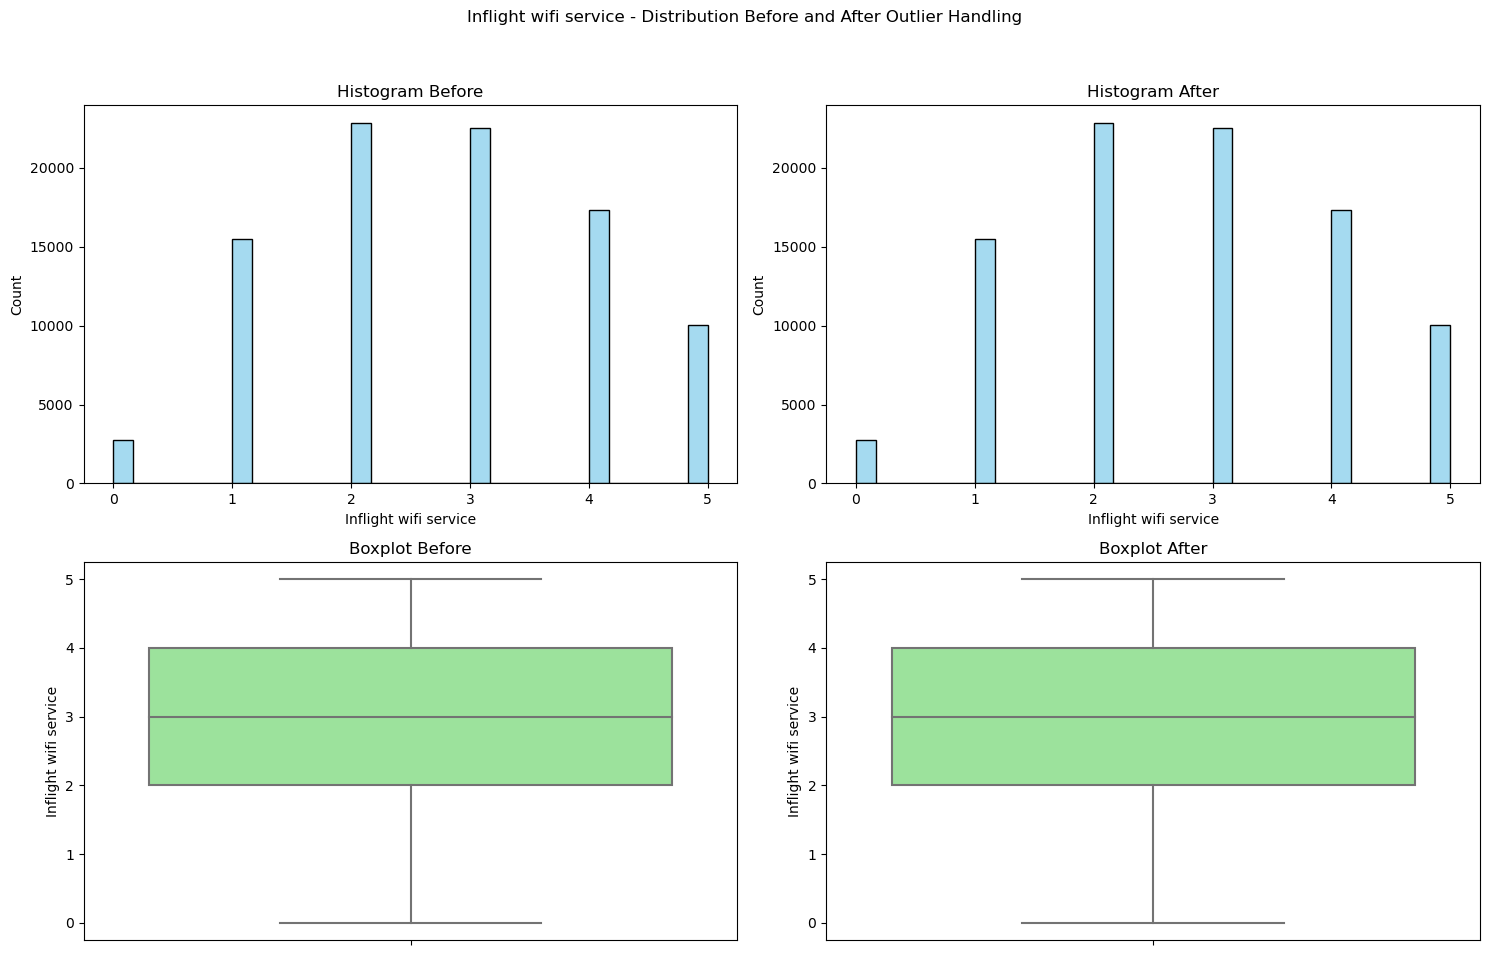

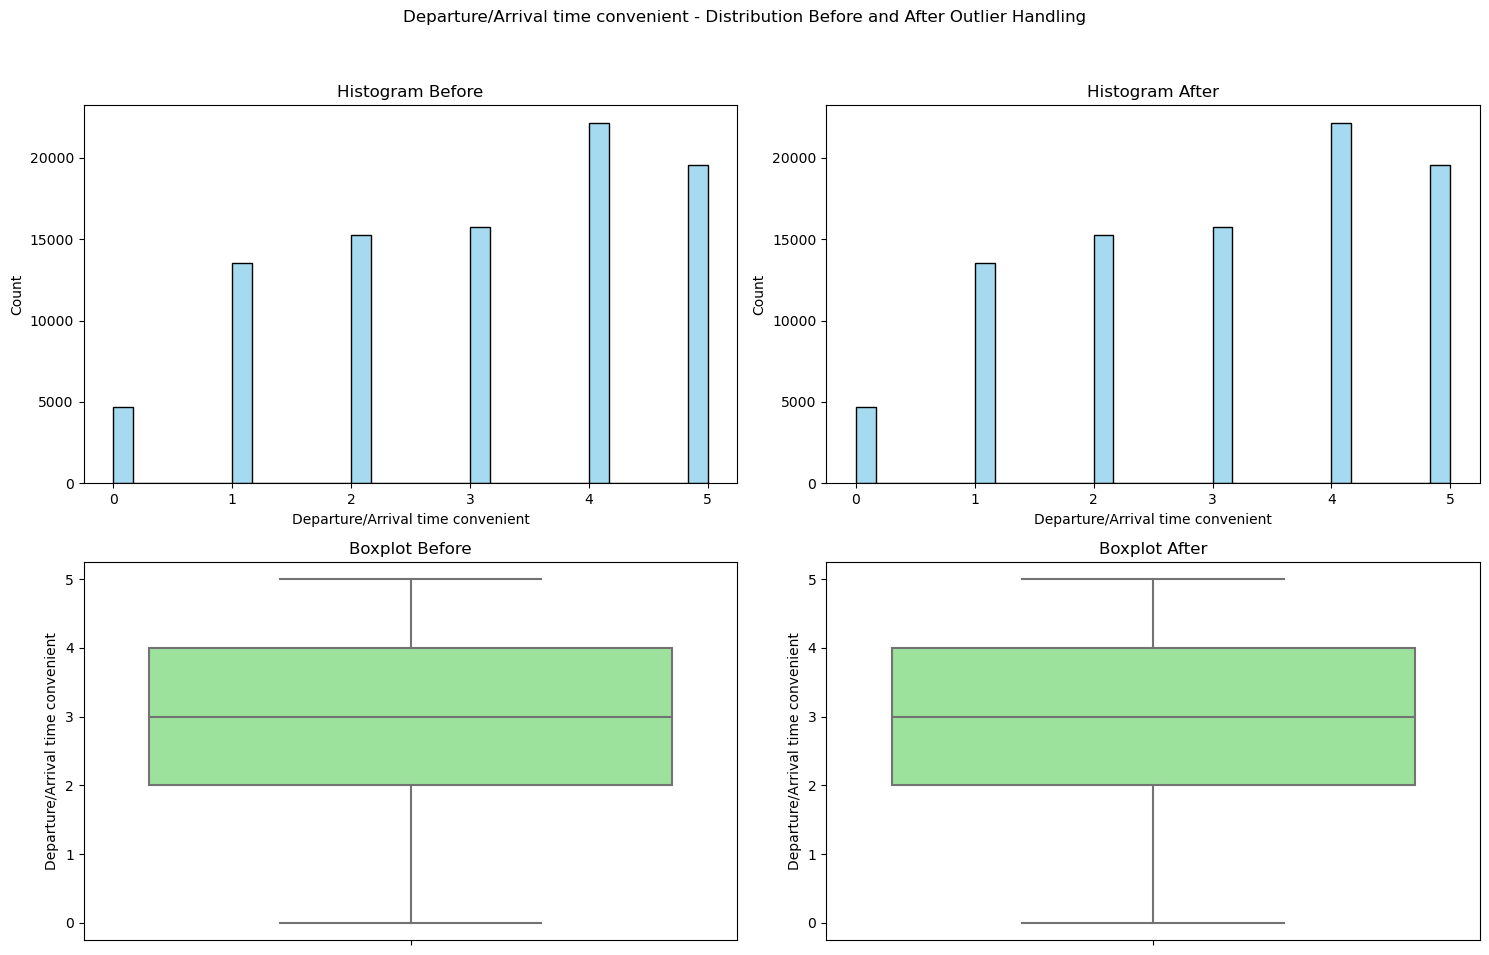

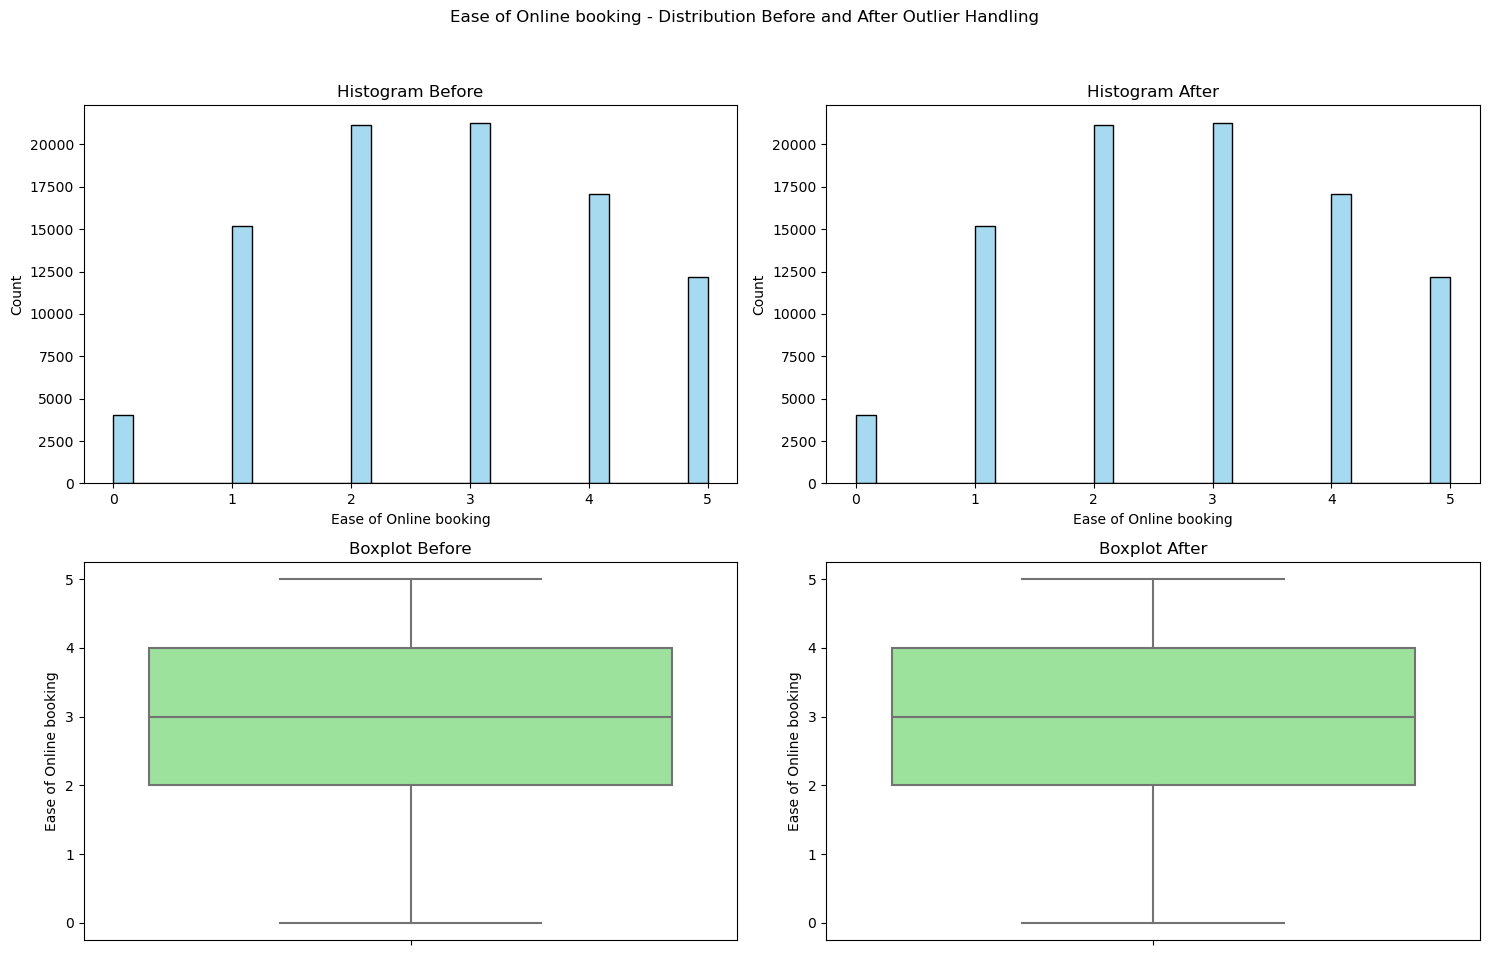

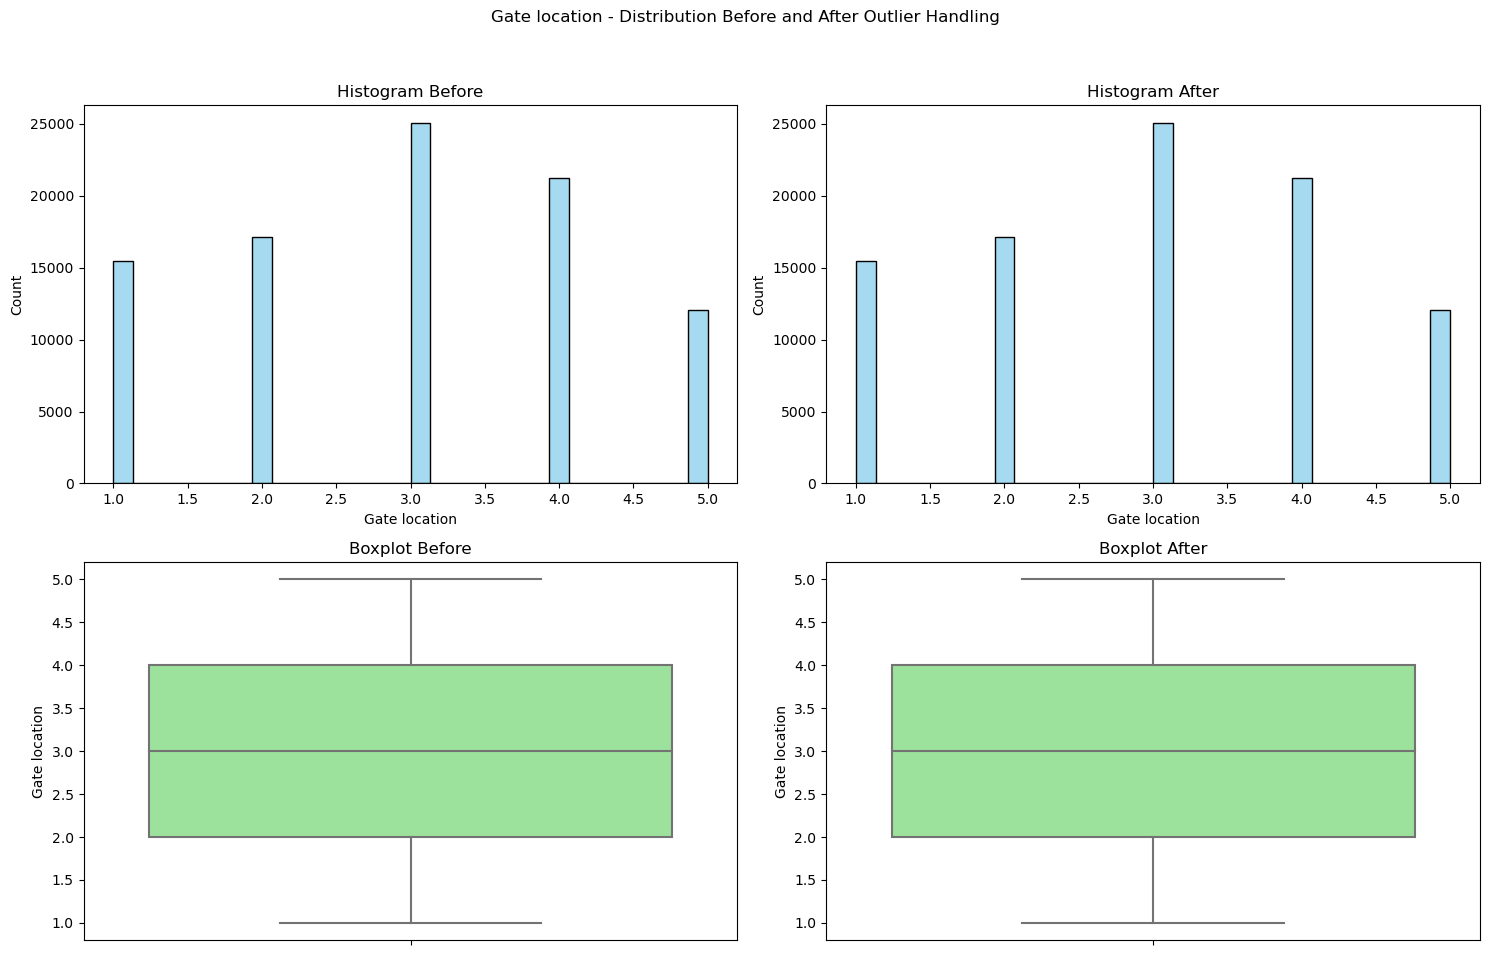

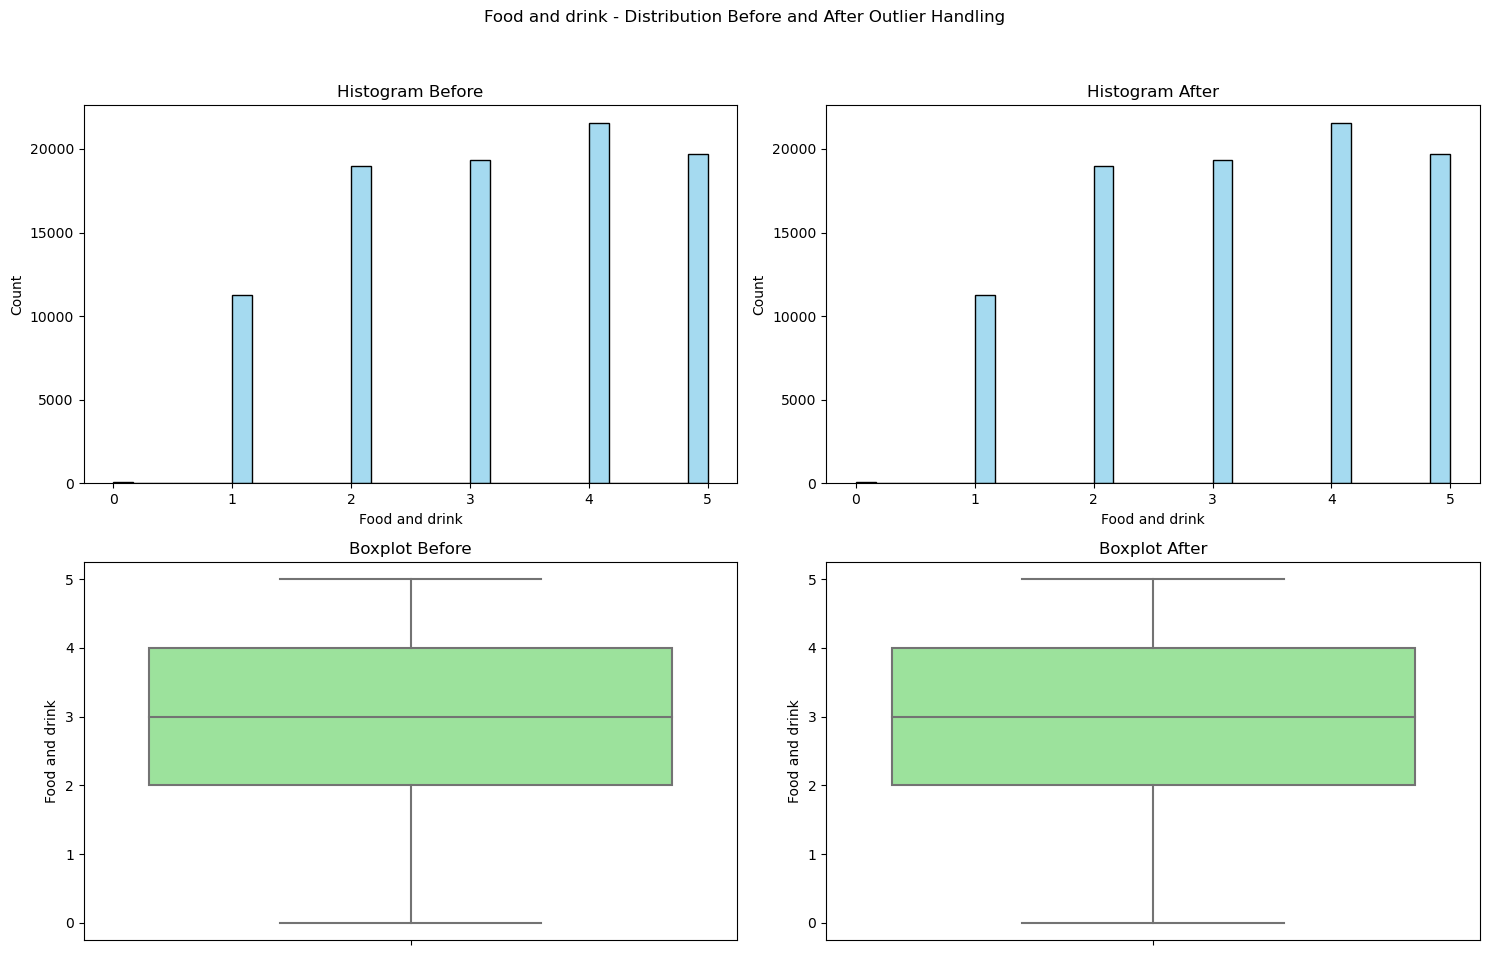

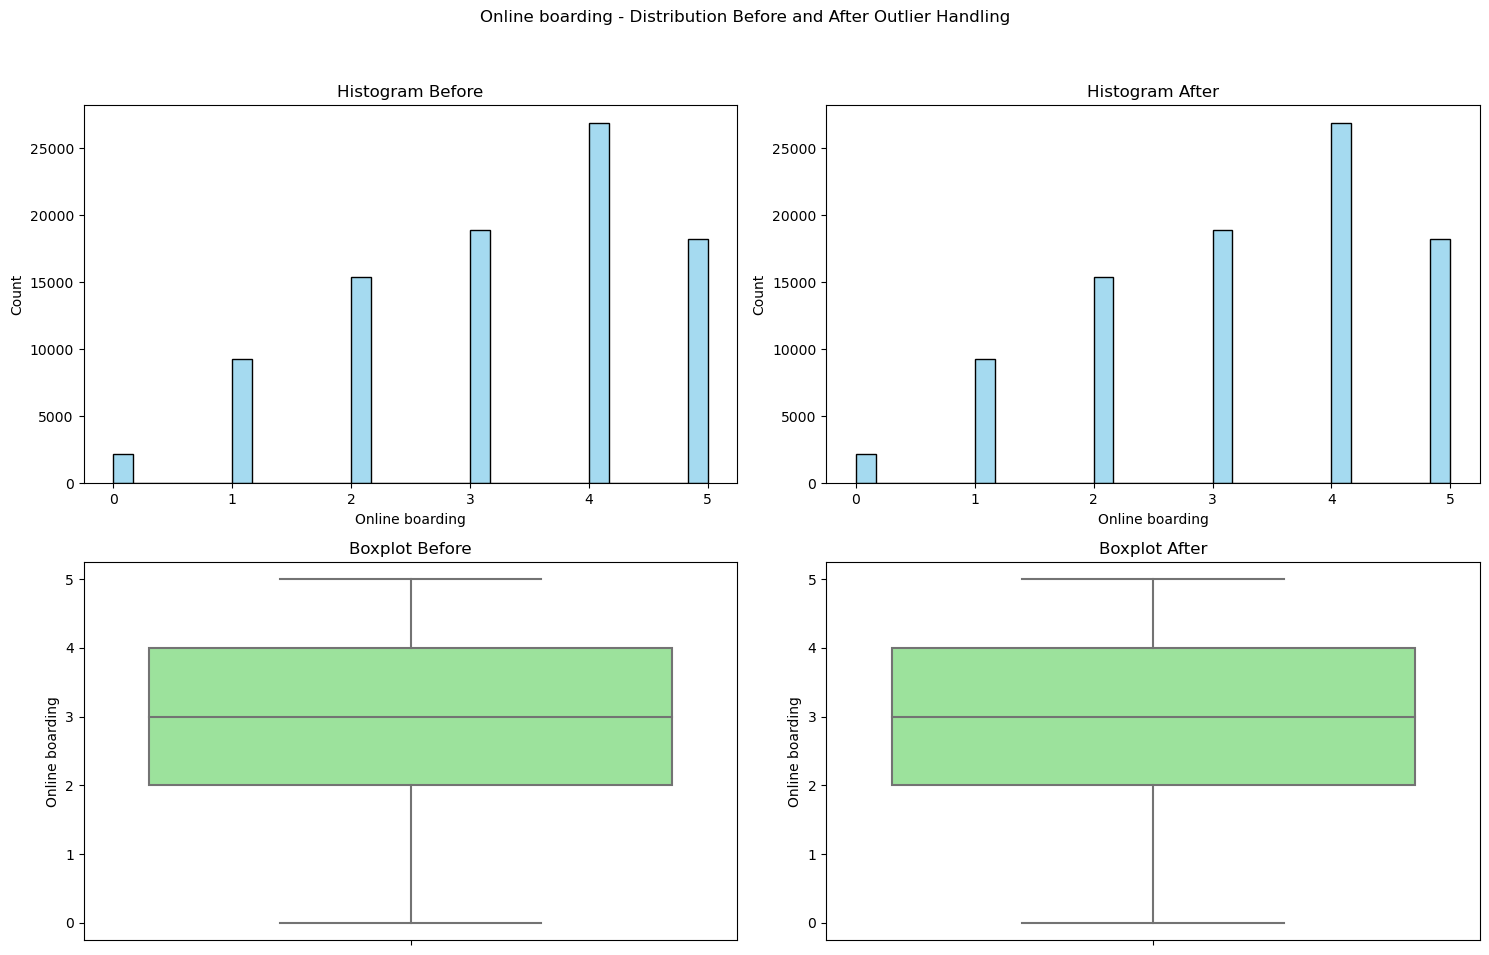

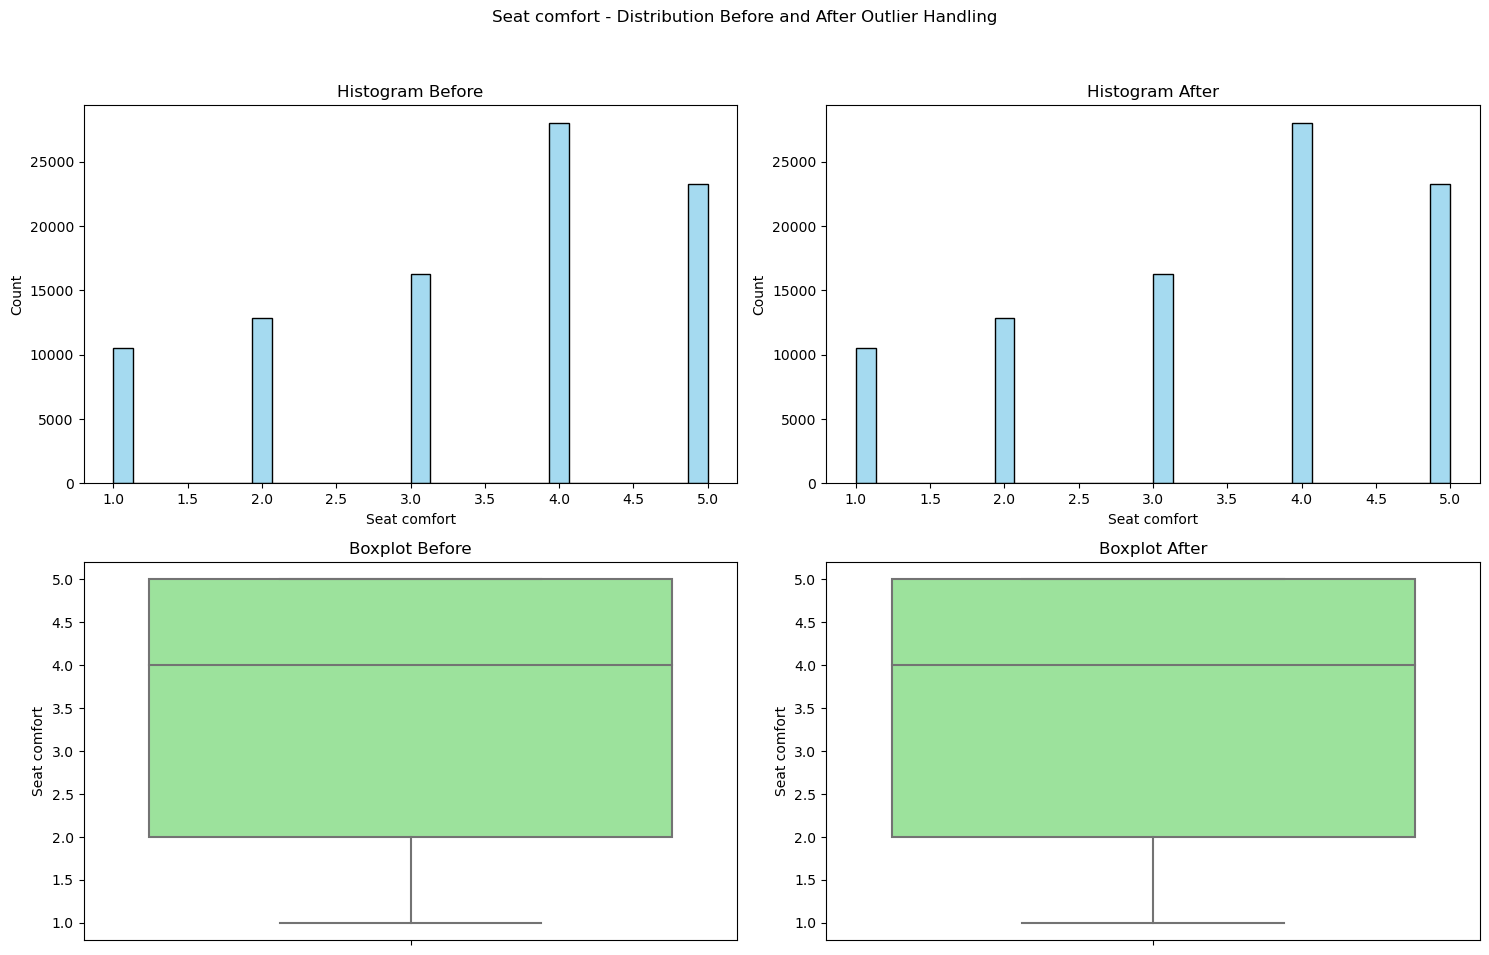

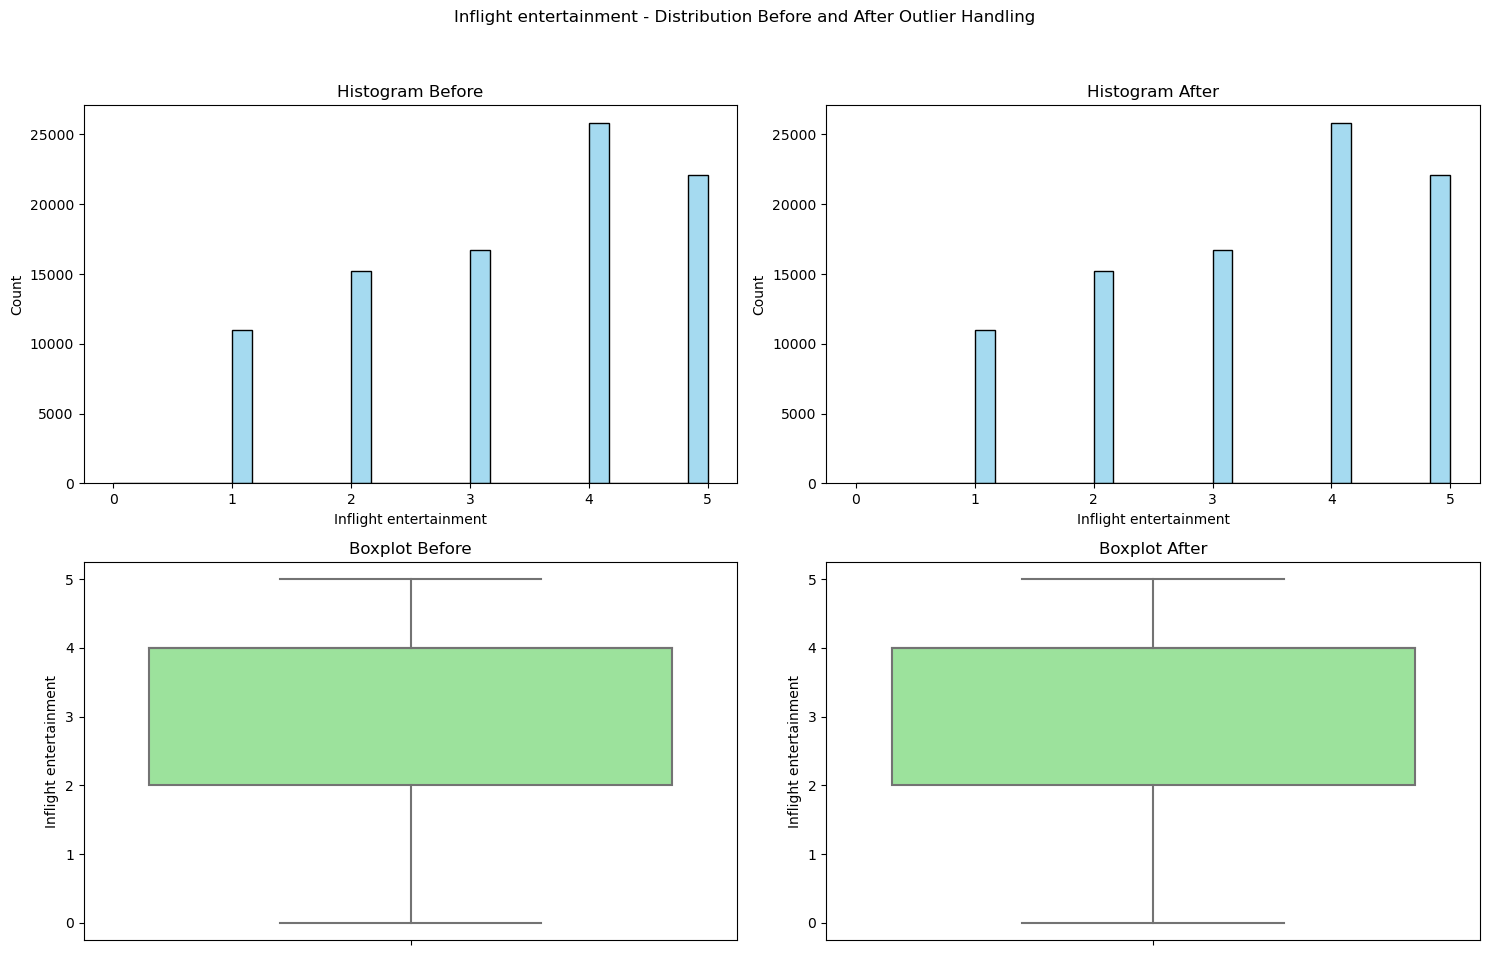

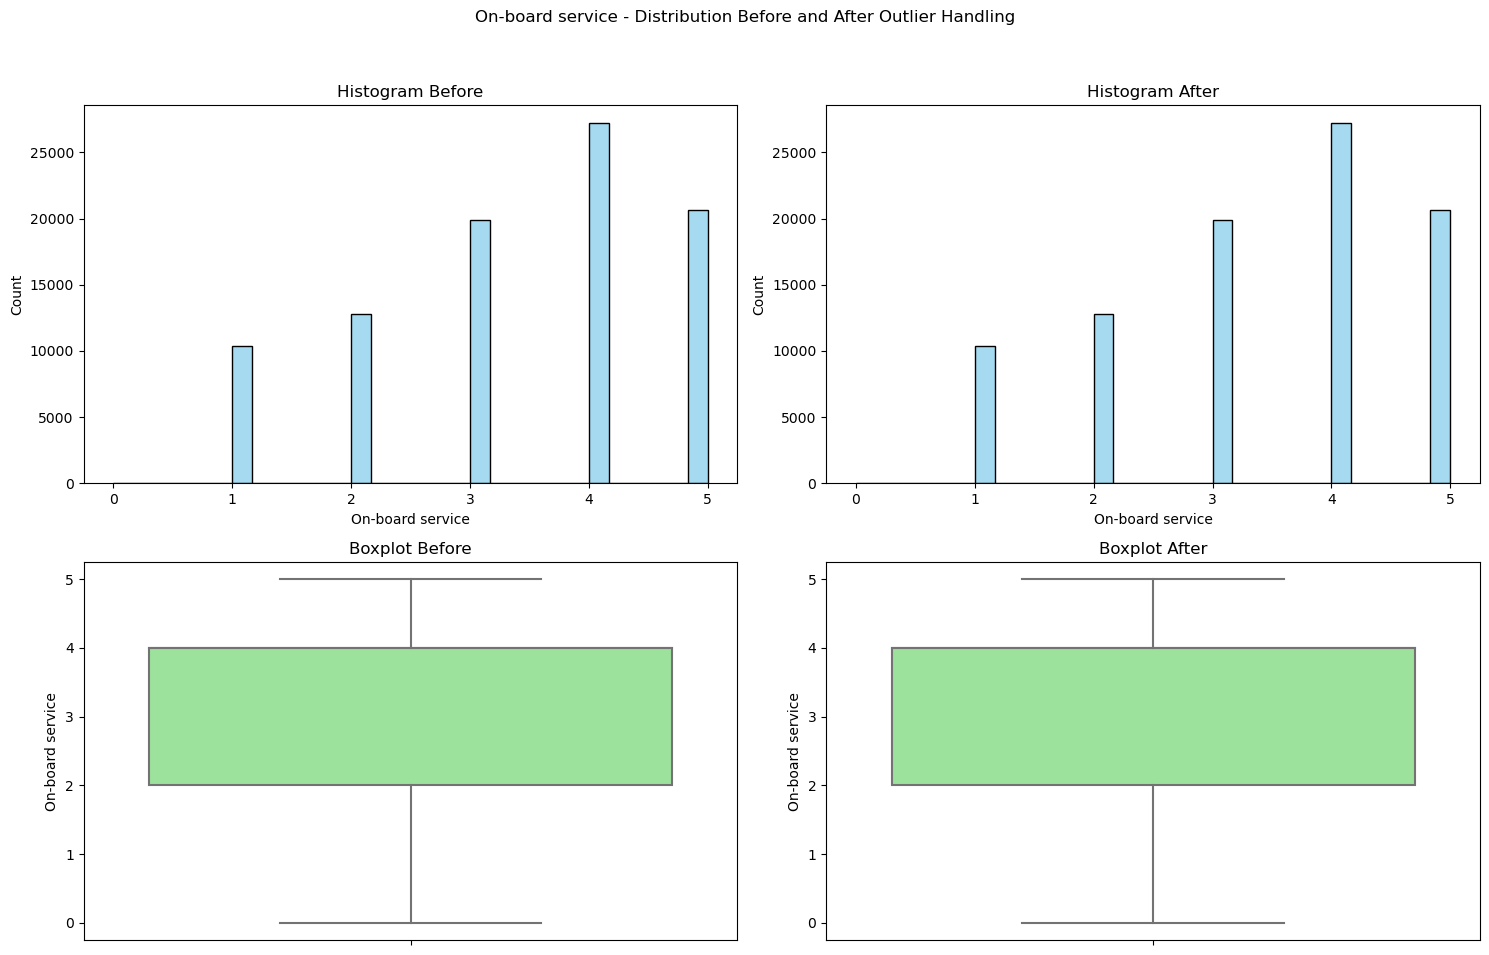

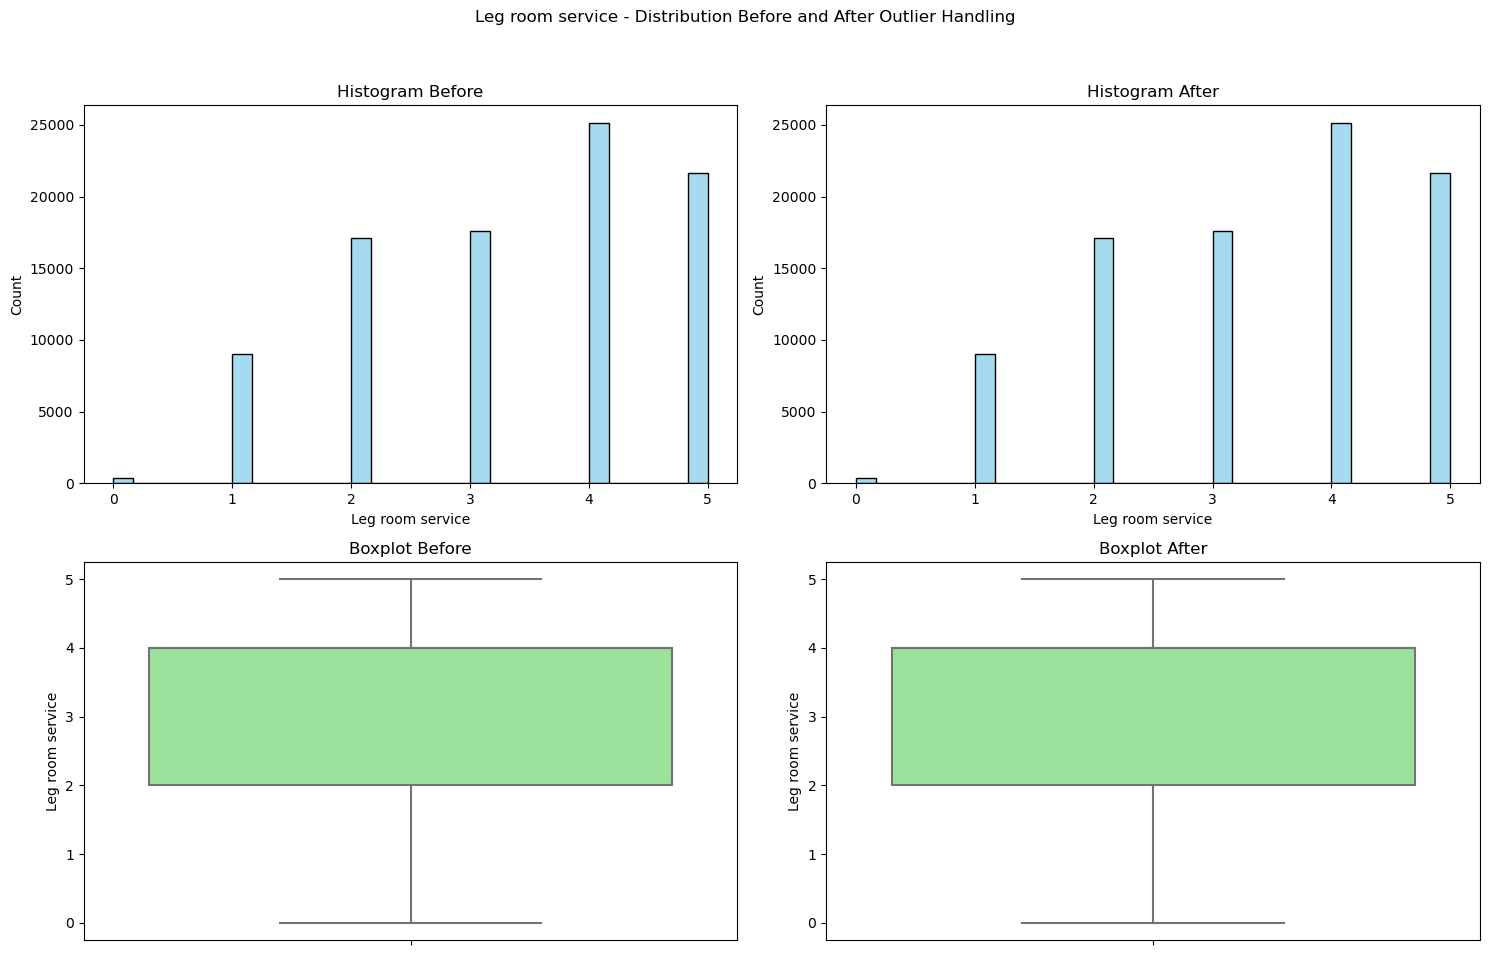

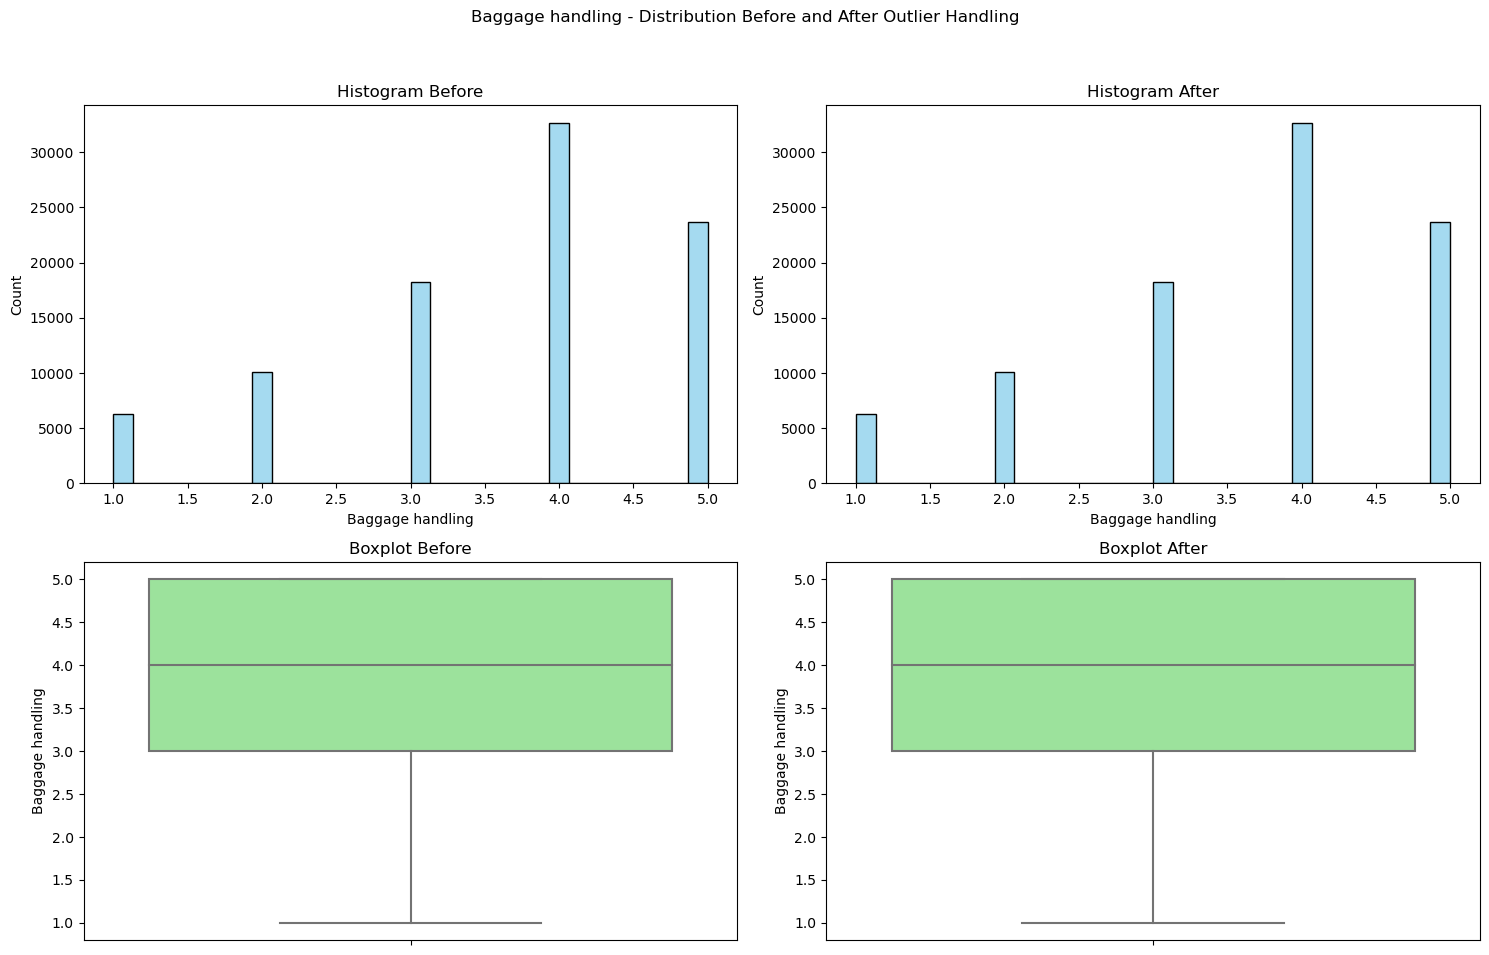

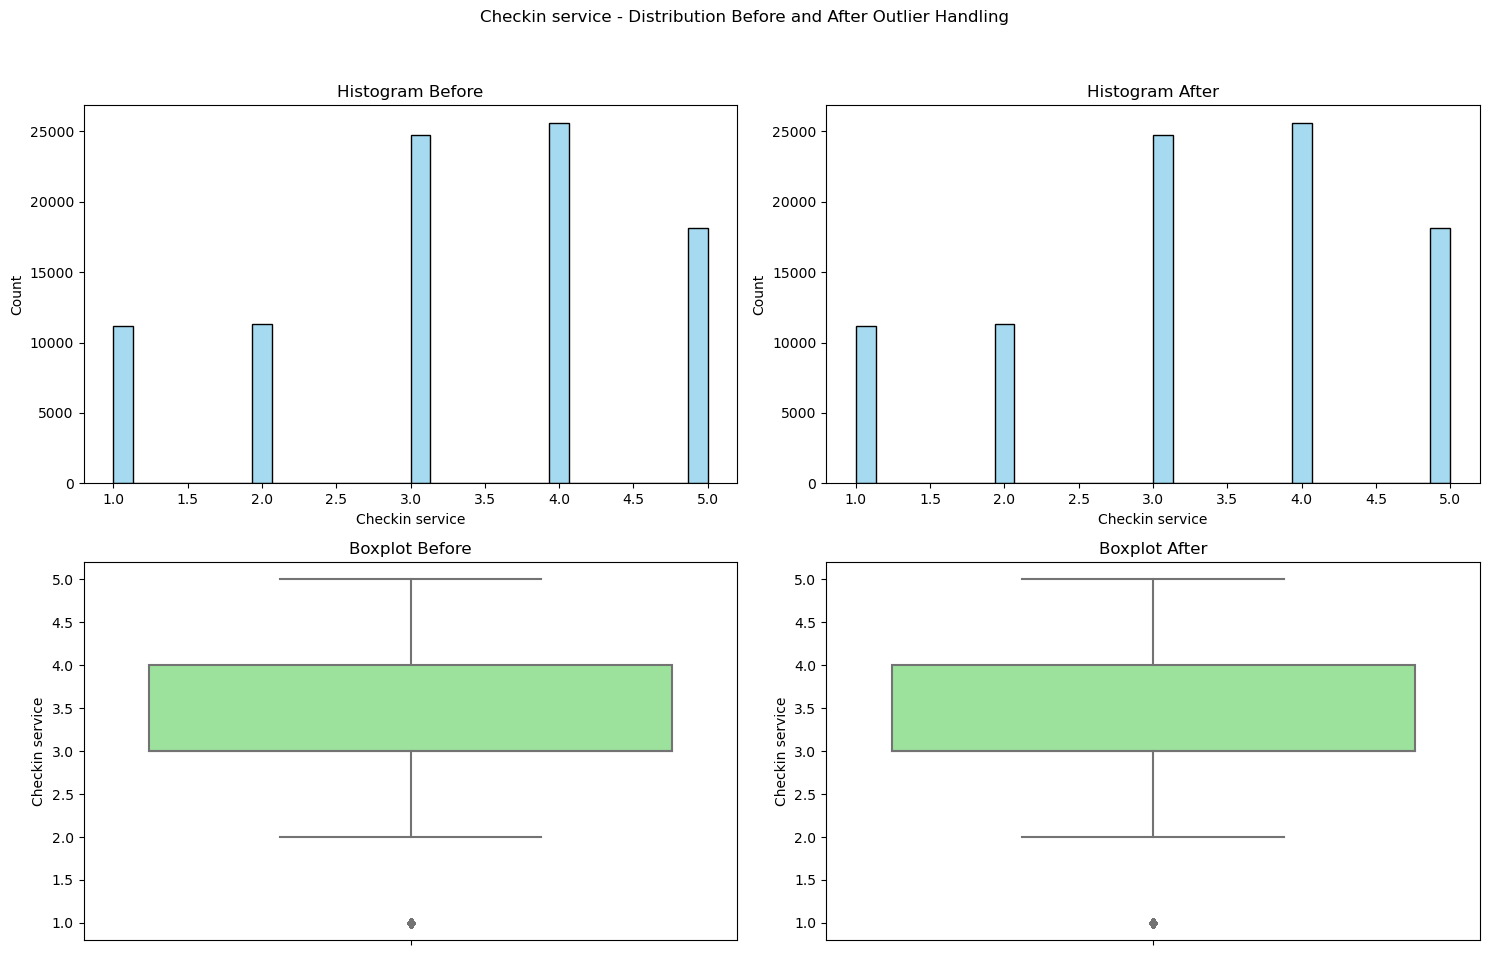

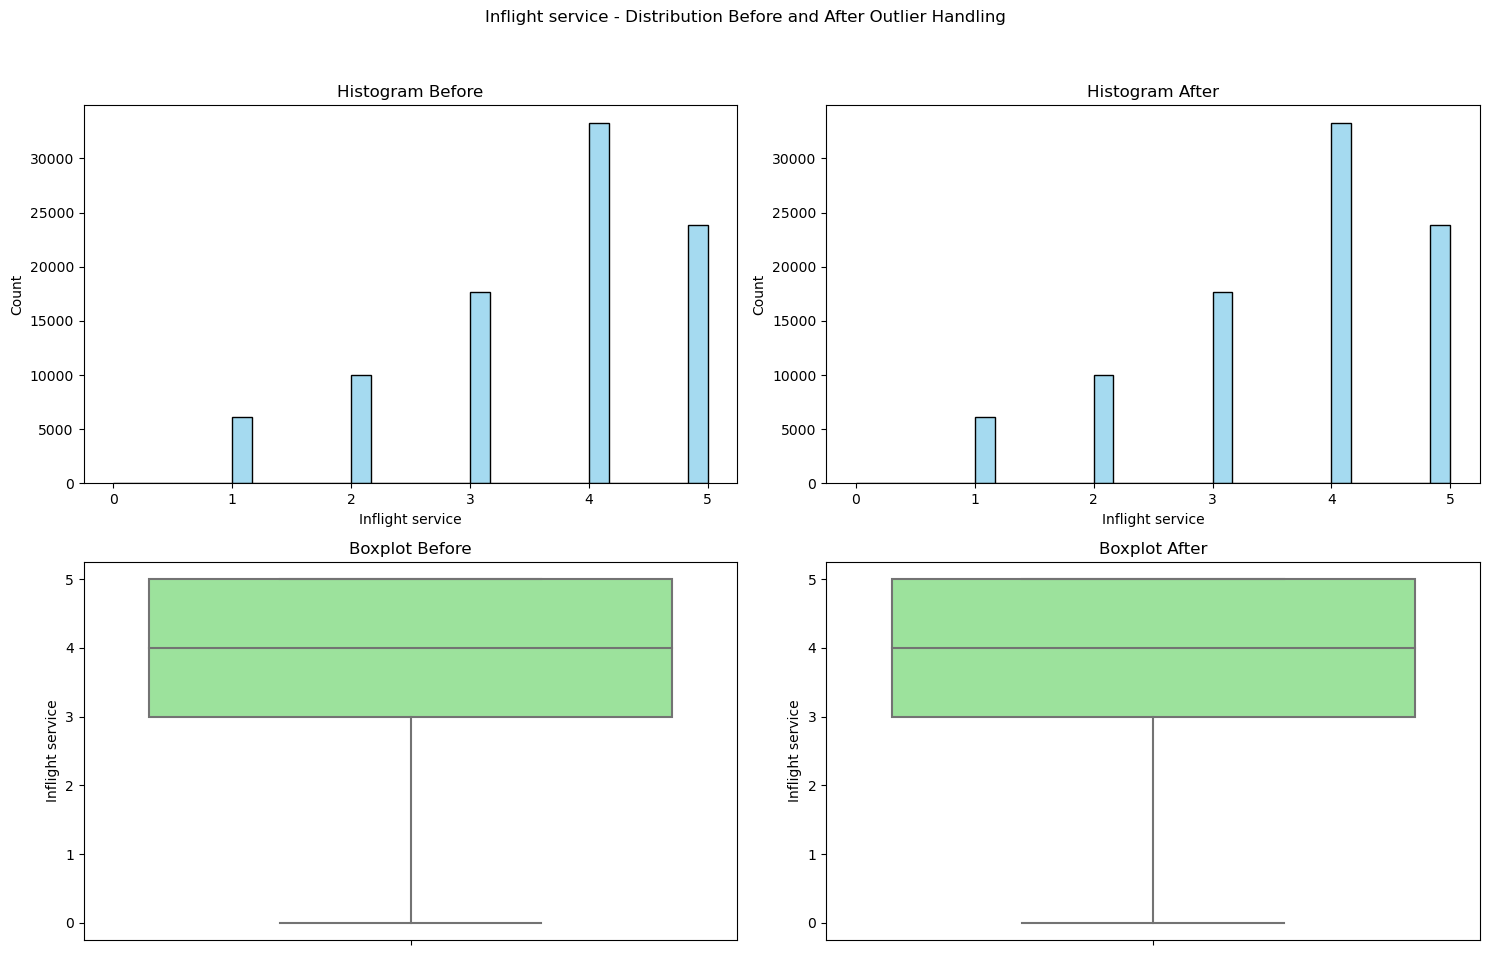

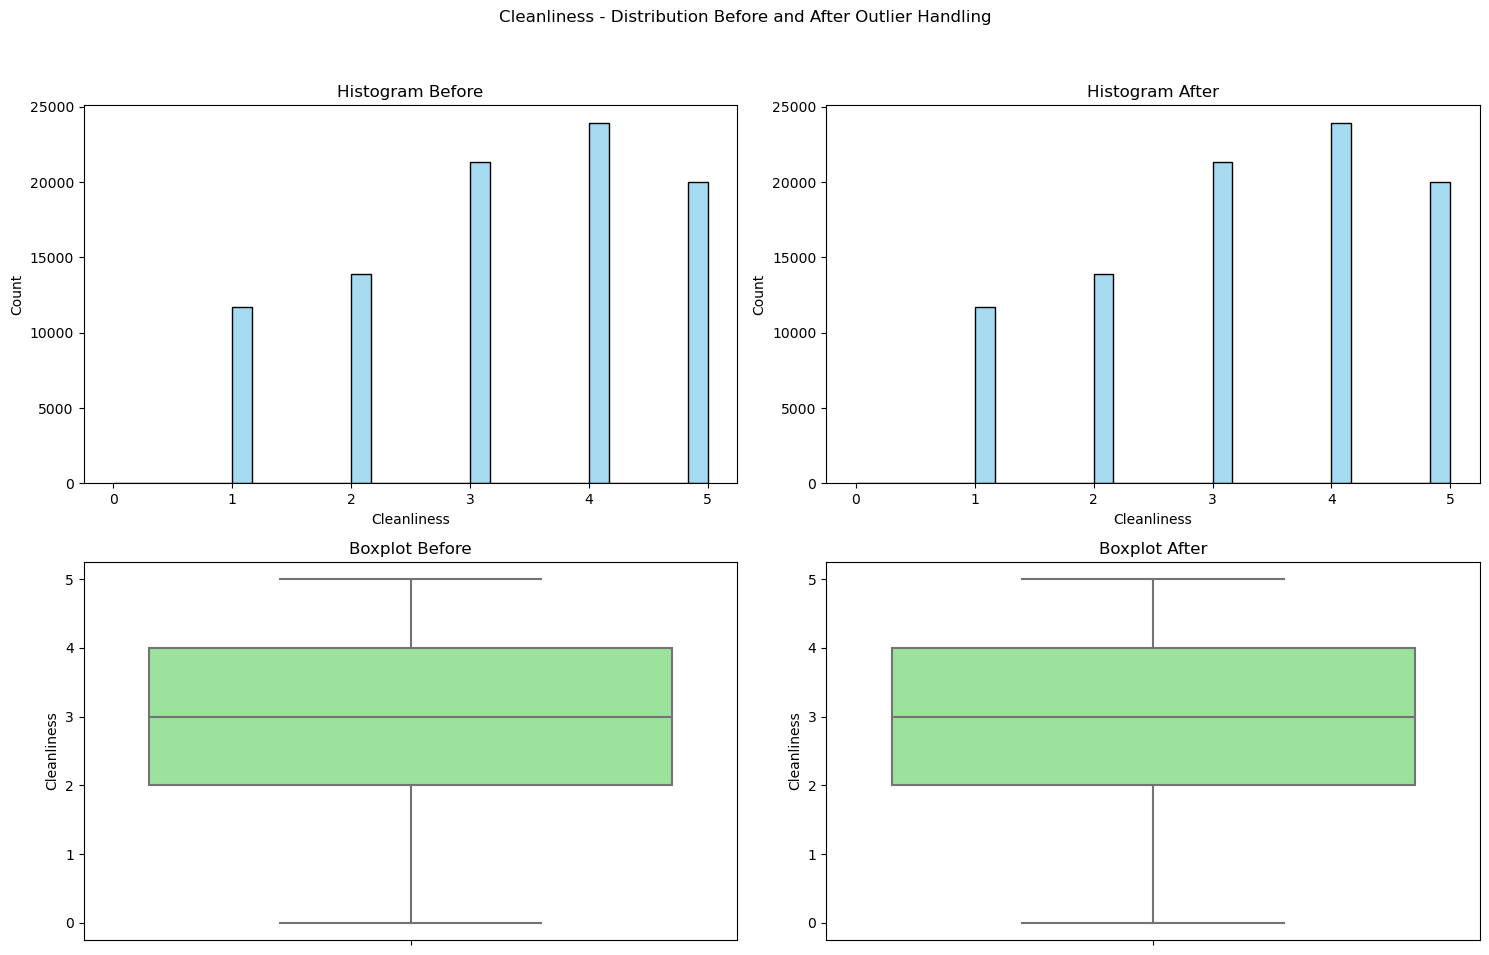

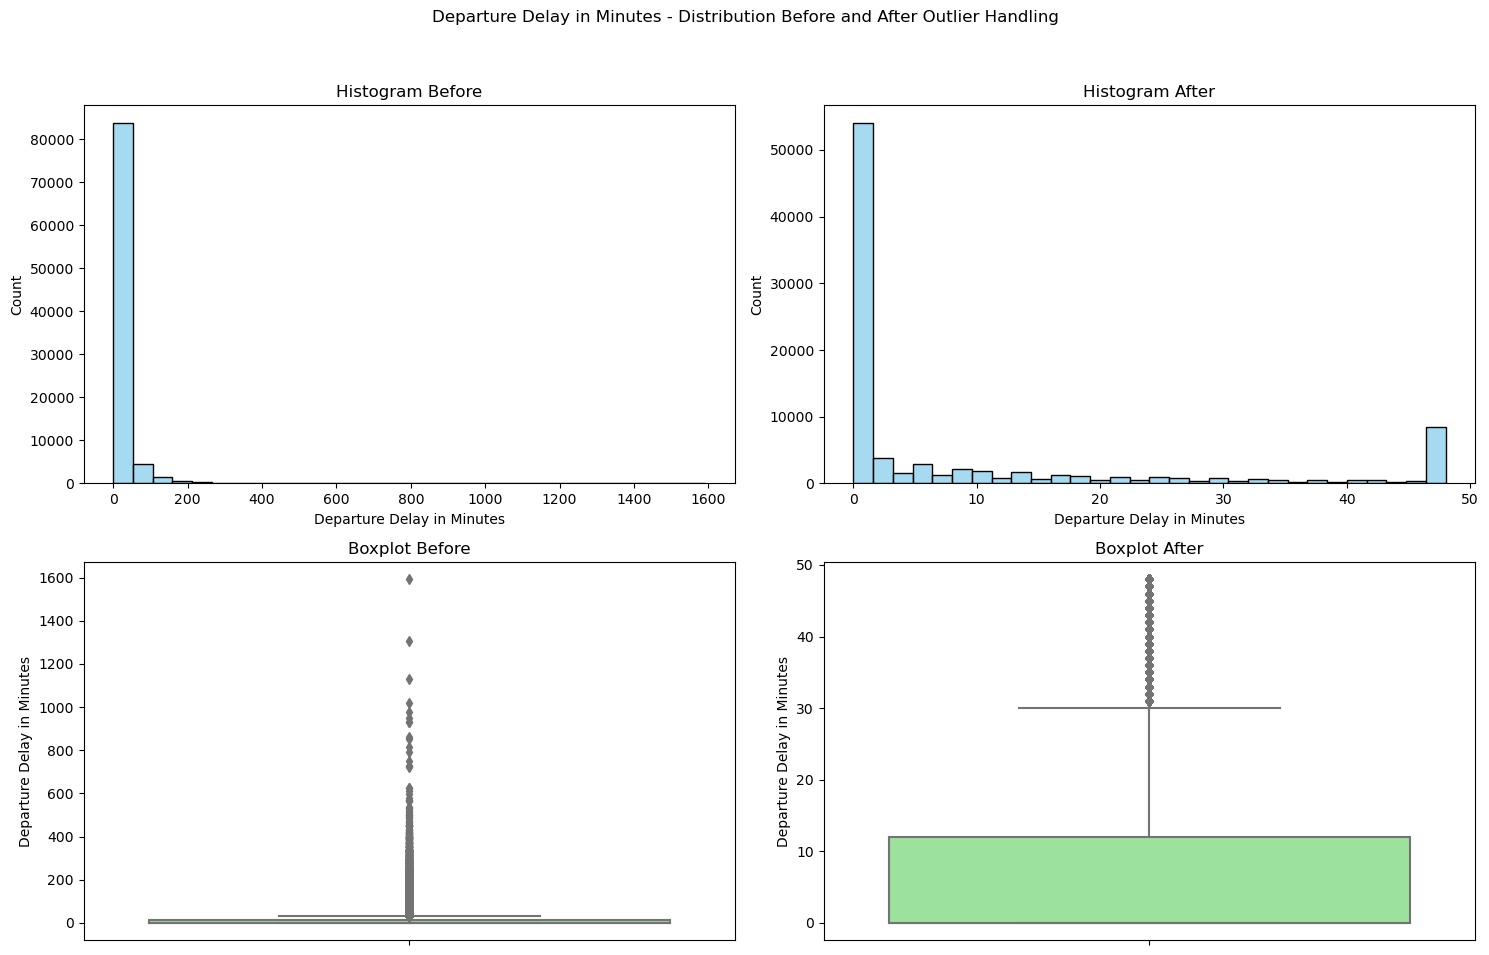

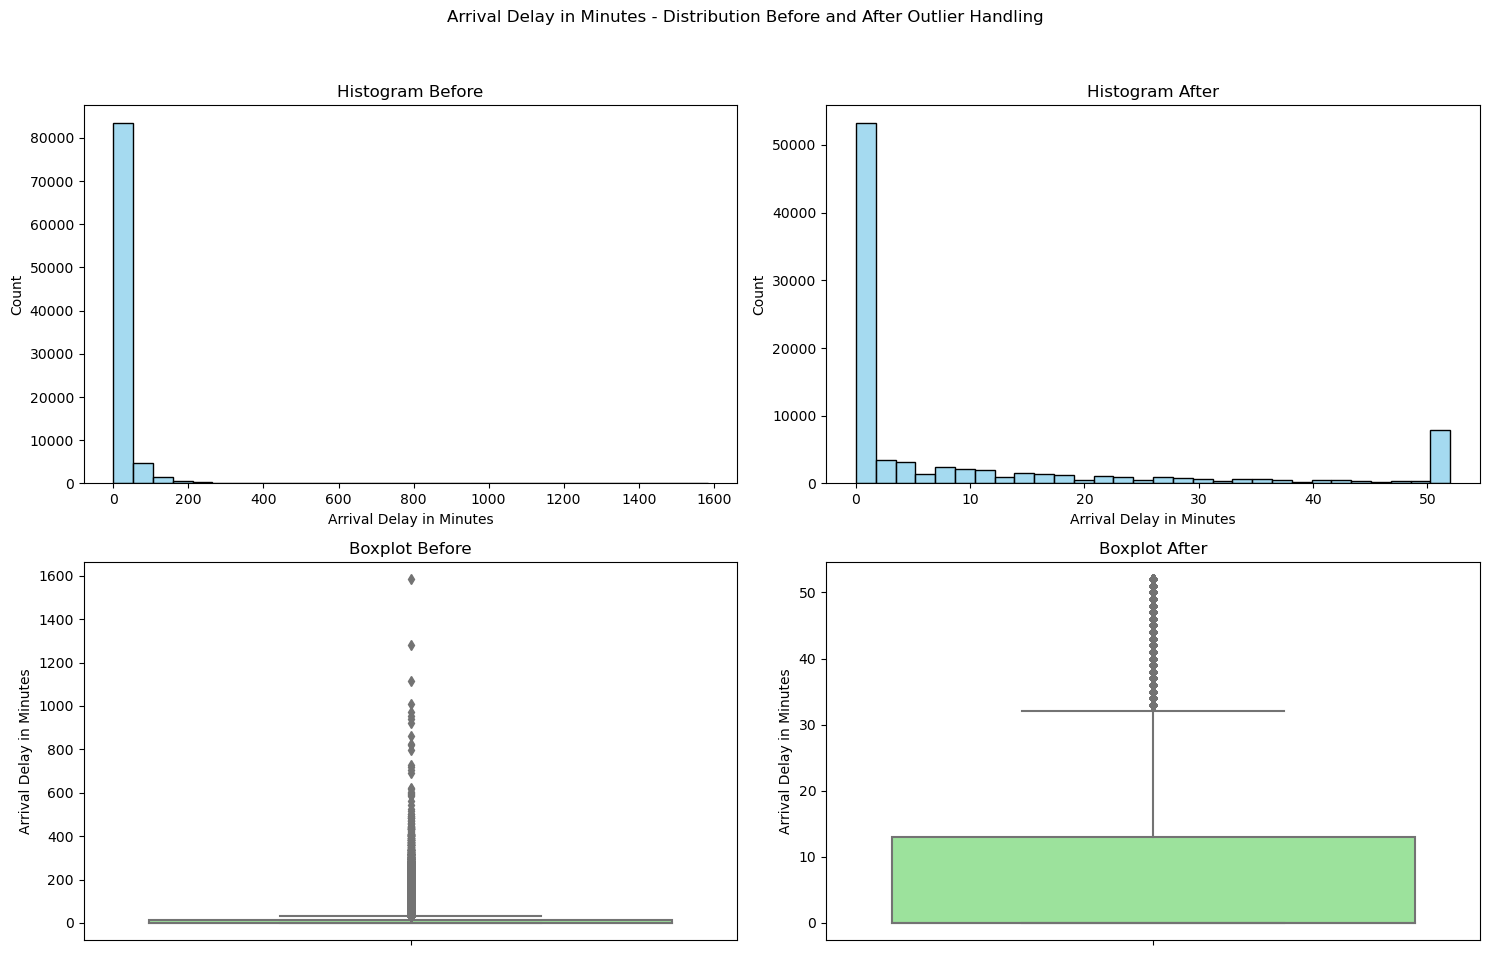

In [46]:
# Using the Function
num_cols = numeric_columns
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

**Explanation**  
After analyzing the visualizations, it appears that there are slight difference before and after outlier handling. Some insights I gathered include:
- There are only 2 columns that had significant differences in before outlier handling (left) and after outlier handling (right), which are Arrival Delay in Minutes and Departure delay in Minutes
- All other columns seems unaffected because they had no outliers
- `Outlier capping has been successfully applied to intended numerical columns`.

Next, we can proceed with feature selection.

In [47]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Feature Selection

### *Correlation Between Continous Columns and Target*

In [48]:
# Define numerical continuous value columns
continuous_cols = num_cont_cols

# Values Container
spearman_coef = []
p_values = []
correlation = []
selected_continuous = []
not_selected_continuous = []

# Loop every column in numerical continous columns
for col in continuous_cols:
    corr, pvalue = spearmanr(X_train[col], y_train)

    if pvalue < 0.05:
        spearman_coef.append(corr)
        p_values.append(pvalue)
        selected_continuous.append(col)
        correlation.append('Correlated')
    else:
        spearman_coef.append(corr)
        p_values.append(pvalue)
        not_selected_continuous.append(col)
        correlation.append('Not Correlated')

pd.DataFrame({
    'continuous_columns': continuous_cols,
    'spearman_coef': spearman_coef,
    'p_values': p_values,
    'correlation': correlation
})

,continuous_columns,spearman_coef,p_values,correlation
0,Age,0.147355,0.000000e+00,Correlated
1,Flight Distance,0.255341,0.000000e+00,Correlated
2,Departure Delay in Minutes,-0.069962,5.135441e-99,Correlated
3,Arrival Delay in Minutes,-0.103631,1.767838e-215,Correlated


**Continous Columns Correlations - Explanations**  

To test correlation, Spearman's rank correlation coefficient is chosen for its robustness to non-normal distributions and outliers, suitability for ordinal data, and ability to capture non-linear monotonic relationships, making it ideal for analyzing complex relationships in airline passenger satisfaction data.   The analysis revealed that `there are correlations between all the continuous columns and the target` variable which is customer satisfaction.

### *Correlation Between Discrete Columns and Target*

In [49]:
# Define numerical discrete value columns
discrete_cols = cat_disc_cols + num_disc_cols

# Values Container
kendall_coef = []
p_values = []
correlation = []
selected_discrete = []
not_selected_discrete = []

# Loop every column in numerical discrete columns
for col in discrete_cols:
    corr, pvalue = kendalltau(X_train[col], y_train)

    if pvalue < 0.05:
        kendall_coef.append(corr)
        p_values.append(pvalue)
        selected_discrete.append(col)
        correlation.append('Correlated')
    else:
        kendall_coef.append(corr)
        p_values.append(pvalue)
        not_selected_discrete.append(col)
        correlation.append('Not Correlated')

pd.DataFrame({
    'discrete_columns': discrete_cols,
    'kendall_coef': kendall_coef,
    'p_values': p_values,
    'correlation': correlation

})

,discrete_columns,kendall_coef,p_values,correlation
0,Gender,0.009921,2.777469e-03,Correlated
1,Customer Type,0.185974,0.000000e+00,Correlated
2,Type of Travel,0.448654,0.000000e+00,Correlated
3,Class,0.477270,0.000000e+00,Correlated
4,Inflight wifi service,0.254069,0.000000e+00,Correlated
5,Departure/Arrival time convenient,-0.048736,2.289771e-61,Correlated
6,Ease of Online booking,0.152973,0.000000e+00,Correlated
7,Gate location,-0.006605,2.654232e-02,Correlated
8,Food and drink,0.188948,0.000000e+00,Correlated
9,Online boarding,0.493566,0.000000e+00,Correlated


**Correlation Between Discrete Columns and Target - Explanation**  

Based on the analysis above `all discrete columns are correlated with the target`. Kendall Tau correlation was chosen because the features being analyzed in this section are categorical in nature, it's a measure of the strength and direction of the association between two variable and the method is more interpretable when it comes to understanding the ordinal association between variables.

### *Checking Multicollinearity*

In [50]:

# Make a copy of capped X_train just to make sure of multicollinearity test
X = X_train_capped.copy()

# Add a constant term to the predictor (required for the intercept term in the regression model)
X = add_constant(X)

# Create a DataFrame that will store the VIF for each variable
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                              feature        VIF
0                               const  49.416176
1                                  id   1.041271
2                              Gender   1.011581
3                       Customer Type   1.575299
4                                 Age   1.160928
5                      Type of Travel   2.076023
6                               Class   1.977478
7                     Flight Distance   1.345137
8               Inflight wifi service   2.430305
9   Departure/Arrival time convenient   1.666340
10             Ease of Online booking   2.684179
11                      Gate location   1.499255
12                     Food and drink   2.191887
13                    Online boarding   2.004917
14                       Seat comfort   2.413706
15             Inflight entertainment   3.929437
16                   On-board service   1.767259
17                   Leg room service   1.313156
18                   Baggage handling   1.906558
19                  

**Multicollinearity with VIF Test - Explanation**  

VIF, or Variance Inflation Factor, is a measure used to detect the presence of multicollinearity in regression analysis. Based on Multicollienarity checking above, we can see that:

- Constant Term (const): The VIF for the constant term is significantly higher than for the other variables. This is expected and not a concern as it does not indicate multicollinearity; rather, it reflects the variance associated with the intercept of the model.

- Low Multicollinearity for Most Features: Most features have VIF values well below 5, indicating that they do not suffer from severe multicollinearity. This suggests that each of these features provides unique information that is not redundantly encoded in the other features. For example, variables like Gender, Customer Type, Age, and Flight Distance have low VIF values (close to 1), implying they are relatively independent predictors.

- Moderate VIF Values: Some features, such as Type of Travel, Class, Inflight wifi service, Ease of Online booking, Seat comfort, Inflight entertainment, and Cleanliness, have VIF values between 2 and 3.9. These values suggest a moderate level of multicollinearity, but not to a degree that typically necessitates corrective action. However, these variables might share some amount of information, indicating overlapping influences on passenger satisfaction.

In summary, `the data appears to be in good shape for further analysis and modeling, with most variables showing low multicollinearity.` 

### Select Final Features and Drop Not Selected Features

In [51]:
# Define Selected Features
selected_final =  selected_continuous + selected_discrete

# Drop Not Selected Features
print(f'Drop columns: {not_selected_continuous + not_selected_discrete}')

# Make X Train and Test Final
X_train_final = X_train[selected_final]
X_test_final = X_test[selected_final]

display(X_train_final.head())
X_test_final.head()

Drop columns: []


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
12576,36,427,10,0.0,0,0,1,0,3,0,3,4,3,3,3,3,1,4,1,4,3,3
27016,34,833,46,41.0,0,0,1,0,2,2,2,4,2,2,2,2,3,1,3,2,3,2
64027,48,3494,148,200.0,0,1,1,2,5,5,2,5,5,5,5,5,3,4,4,5,5,5
84981,17,3880,0,0.0,0,1,1,2,2,5,5,5,2,2,2,2,4,1,3,1,3,2
61709,68,883,35,13.0,0,1,0,0,3,4,3,3,4,3,4,2,2,3,2,1,2,4


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
72321,48,2586,12,0.0,1,1,0,0,3,3,3,3,3,5,5,2,3,3,4,5,2,5
13821,54,861,12,54.0,0,1,0,0,4,4,4,3,3,4,5,5,5,4,5,3,5,3
122501,15,965,23,16.0,0,1,0,1,2,3,2,3,1,2,1,1,2,5,3,2,4,1
63943,31,1048,16,68.0,1,1,1,2,1,5,1,1,4,4,4,4,4,4,1,2,5,4
119489,39,2139,0,0.0,0,1,1,1,3,5,5,5,3,3,3,3,1,4,3,3,3,3


**Select Final Features and Drop Not Selected Features - Explanation**  

Code above used to preparing a dataset for machine learning by selecting specific features for inclusion. Firstly, it combines selected continuous and discrete features into a single list called 'selected_final'. Then, it prints out the columns that are not selected for inclusion in the final dataset. In this case, since there aren't any not selected columns, the list would be empty. Subsequently, `it creates the final training and testing datasets ('X_train_final' and 'X_test_final')` by retaining only the features included in 'selected_final'.

In [52]:
# Grouping Selected Columns

selected_cat = ['Gender','Customer Type', 'Type of Travel', 'Class']

selected_num = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight wifi service', 
            'Departure/Arrival time convenient', 'Ease of Online booking' ,  'Gate location', 'Food and drink', 'Online boarding' ,  
            'Seat comfort',  'Inflight entertainment',  'On-board service','Leg room service', 'Baggage handling', 
            'Checkin service', 'Inflight service', 'Cleanliness']

**Group Selected Columns**  

Since all the feature are selected and there are no feature column that are not selected, To streamline the feature engineering process, it's advisable to categorize columns based on their properties. Here, we'll group column names into two categories: those containing string/object categories (cat_cols) and those containing numerical categories (num_cols). This organization facilitates a more systematic approach to handling different types of features, making the feature engineering process more manageable.

## Scaling

In [53]:
# Checking the skew values in each column
X_train_capped.skew()

id                                  -0.003812
Gender                               0.030538
Customer Type                       -1.636986
Age                                  0.000101
Type of Travel                      -0.820978
Class                               -0.053377
Flight Distance                      1.110424
Inflight wifi service                0.041749
Departure/Arrival time convenient   -0.324728
Ease of Online booking              -0.018605
Gate location                       -0.051580
Food and drink                      -0.163272
Online boarding                     -0.457675
Seat comfort                        -0.492183
Inflight entertainment              -0.370554
On-board service                    -0.423692
Leg room service                    -0.348752
Baggage handling                    -0.671882
Checkin service                     -0.368909
Inflight service                    -0.693934
Cleanliness                         -0.308619
Departure Delay in Minutes        

In [54]:
# Defining Scaler
scaler = StandardScaler()

scaler

StandardScaler()

**Defining Scaler - Explanation**  
The skewness values for 4 column are observed to be higher than 0.5 and lower than -0.5, suggesting 'skewed distribution on some columns`. Consequently, it is necessary to standardize the values to ensure uniformity across the dataset. So, I decided to use Standard Scaler `because it computes the mean and standard deviation of the data, making it less sensitive to outliers compared to Min-Max Scaler.

## Encoding

In [55]:
# Encoding with One-Hot Encoder
encoder = OneHotEncoder()

encoder

OneHotEncoder()

**Encoding With One-Hot Encoder - Explained**  

Since we will inference data later, `we need to encode categorical columns that would be in object type into numerical values`, I've opted for one-hot encoding. This method assigns a binary value to each category within a categorical column, generating a new column for each category. Since the categorical columns have only a few categories, this approach ensures that the weight of each feature column isn't significantly affected.

## Column Transformer

In [56]:
# Defining Column Transformer
transformer = ColumnTransformer([
    ('encoder', encoder, selected_cat),
    ('scaler', scaler, selected_num),
], remainder='drop'
)

transformer

ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                 ['Gender', 'Customer Type', 'Type of Travel',
                                  'Class']),
                                ('scaler', StandardScaler(),
                                 ['Age', 'Flight Distance',
                                  'Departure Delay in Minutes',
                                  'Arrival Delay in Minutes',
                                  'Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness'])])

**Column Transformer - Explanation**  

A ColumnTransformer is defined, which is a preprocessing step commonly used in machine learning pipelines to `apply different transformations to different columns of the dataset`. The transformer is composed of two main steps: scaling numerical columns using the 'scaler' method specified earlier and encoding categorical columns using the 'encoder' method. The 'num_cols' and 'cat_cols' variables are used to specify which columns should undergo numerical scaling and categorical encoding, respectively. The 'remainder' parameter is set to 'passthrough', which means that any columns not explicitly mentioned will be passed through without any transformations. This ColumnTransformer encapsulates the preprocessing steps required for both numerical and categorical data, enabling seamless integration into the machine learning workflow.

# **6. Model Definition**  



**Model Definition - Introduction**  

A model definition in the context of supervised machine learning entails the specification of the structure, parameters, and algorithms that a computational system will utilize to learn patterns from labeled dataIn this part. This project will test 5 classification model algorithms with pipeline:

1. K-Nearest Neighbor (KNN) Classifier
2. Support Vector Classification (SVC)
3. Decision Tree Classifier
4. Random Forest Classifier
5. XGB Classifier

## Five Classification Base Model

### *1. KNN-Classifier Pipeline*

In [57]:
# Define KNN-Classifier Base Model
knn_class = KNeighborsClassifier()

# Defining the pipeline model
knn_class_pipe = Pipeline([
    ('transformer', transformer),
    ('knn_class', knn_class)
])

knn_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('knn_class', KNeighborsClassifier())])

**KNN Classifier Base Model Pipeline - Explanation**

The code defines a K-Nearest Neighbors (KNN) classifier base model within a pipeline with preprocessing transformers. KNN is a simple, instance-based learning algorithm where the class of a sample is determined by the majority class among its k nearest neighbors. Below are Advantage and Disadvantage of KNN models.
- **Advantages**:
  - Simple and Effective: KNN is straightforward to implement and understand. It can be very effective for large datasets with few irrelevant features.
  - No Model Assumptions: It doesn't make any assumptions about the underlying data distribution, which is beneficial in real-world scenarios where data may not follow theoretical assumptions.
- **Disadvantages**:
  - Computationally Expensive: KNN is computationally intensive, especially as the dataset size grows, because it searches for the nearest neighbors for each query.
  - Sensitive to Irrelevant Features: Performance can degrade with the presence of irrelevant features since distance measurements become less meaningful.

### *2. Support Vector Classification (SVC) Pipeline*

In [58]:
# Defining SVC Base Model
svc = SVC()

# Defining the pipeline model
svc_pipe = Pipeline([
    ('transformer', transformer),
    ('svc', svc)
])

svc_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('svc', SVC())])

**Support Vector Classifier (SVC) Base Model Pipeline - Explanation**

The code defines a Support Vector Classifier (SVC) base model within a pipeline with preprocessing transformers. SVC is classifying model of, SVM a powerful classifier that works by finding the hyperplane that best separates different classes in the feature space. Below are advantage and disadvantage of SVM model.
- **Advantages**:
  - Effective in High Dimension: Works well in high-dimensional spaces, making it suitable for datasets with many features, such as customer feedback and flight details.
  - Kernel Trick: Can model non-linear boundaries using the kernel trick, allowing it to capture complex relationships.
- **Disadvantages**:
  - Scalability: SVMs can be slow to train on very large datasets, which might be a constraint if the dataset includes a vast number of airline passengers.
  - Parameter Selection: Choosing the right kernel and parameters (like C and gamma) can be challenging and requires cross-validation, which can be time-consuming.

### *3. Decision Tree Classifier Pipeline*

In [59]:
# Defining Decision Tree Classifier Base Model
dt_class = DecisionTreeClassifier()

# Defining the pipeline model
dt_class_pipe = Pipeline([
    ('transformer', transformer),
    ('dt_class', dt_class)
])

dt_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('dt_class', DecisionTreeClassifier())])

**Decision Tree Classifier Base Model Pipeline - Explanation**

The code defines a Decision Tree Classifier base model within a pipeline with preprocessing transformers. Decision tree is a flowchart-like tree structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. Below are the advantages and disadvantages of using decision tree.
- **Advantages**:
  - Easy to Interpret: Trees can be visualized, making them easy to interpret and understand, which is beneficial for reporting and decision-making.
  - Handles Non-Linear Data: Can easily handle qualitative (categorical) and quantitative (numerical) data and model non-linear relationships.
- **Disadvantages**:
  - Overfitting: Without proper tuning (like pruning), trees can create overly complex models that do not generalize well outside the training data.
  - Variance: Small changes in the data can result in a completely different tree, leading to high variance if not managed with techniques like ensemble learning.

### *4. Random Forest Classifier Pipeline*

In [60]:
# Defining the model
rf_class = RandomForestClassifier()

# Defining the pipeline model
rf_class_pipe = Pipeline([
    ('transformer', transformer),
    ('rf_class', rf_class)
])

rf_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('rf_class', RandomForestClassifier())])

**Random Forest Classifier Base Model Pipeline - Explanation**

The code defines a Random Forest Classifier base model within a pipeline with preprocessing transformers. Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees. Below are the advantage and disadvantage of using Random Forest.
- **Advantages**:
  - Reduces Overfitting: By averaging multiple trees, it reduces the risk of overfitting, making it more robust than a single decision tree.
  - Handles Unbalanced Data: Effective in cases of unbalanced data distribution, such as unequal numbers of satisfied and unsatisfied passengers.
- **Disadvantages**:
  - Model Complexity: More complex than a single decision tree, making it harder to interpret.
  - Computationally Expensive: Requires more computational resources and time to train compared to a decision tree, especially as the number of trees increases.

### *5. Boosting Algorithm (XGB Classifier) Pipeline*

In [61]:
# Defining the model
xgb_class = XGBClassifier()

# Defining the pipeline model
xgb_class_pipe = Pipeline([
    ('transformer', transformer),
    ('xgb_class', xgb_class)
])

xgb_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

**Boosting Algorithm (XGBoost Classifier) Base Model Pipeline - Explanation**

The code defines a XGB Classifier base model within a pipeline with preprocessing transformers. Boosting is an ensemble technique that creates a strong classifier from a number of weak classifiers. It does this by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Below are the advantage and disadvantage of using booster.
- **Advantages**:
  - Improves Accuracy: Often provides significant accuracy improvements over single models and even other ensemble methods.
  - Handles Variance and Bias: Can reduce both bias and variance by combining multiple weak learners.
- **Disadvantages**:
  - Overfitting Risk: If not properly tuned, boosting can lead to overfitting, especially in noisy datasets.
  - Computationally Demanding: Training can be time-consuming due to the sequential nature of boosting, making it less scalable for very large datasets.

# **7. Model Training**

## KNN Classifier

In [62]:
# Fitting KNN Classifier to training data
knn_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('knn_class', KNeighborsClassifier())])

**Fitting KNN Classifier - Explanation**  
The code above fits the KNN Classifier pipeline model knn_class_pipe to the training data X_train_final, y_train.

## Support Vector Classification (SVC)

In [63]:
# Fitting SVC to training data
svc_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('svc', SVC())])

**Fitting SVC - Explanation**  
The code above fits the SVC pipeline model svc_pipe to the training data X_train_final, y_train.

## Decision Tree Classifier

In [64]:
# Fitting Decision Tree Classifier to training data
dt_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('dt_class', DecisionTreeClassifier())])

**Fitting Decision Tree Classifier - Explanation**  
The code above fits the Decision Tree Classifier pipeline model dt_class_pipe to the training data X_train_final, y_train.

## Random Forest Classifier

In [65]:
# Fitting Random Forest Classifier to training data
rf_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('rf_class', RandomForestClassifier())])

**Fitting Random Forest Classifier - Explanation**  
The code above fits the Random Forest Classifier pipeline model rf_class_pipe to the training data X_train_final, y_train.

## XGB Classifier

In [66]:
# Fitting XGBClassifier to training data
xgb_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

**Fitting XGBClassifier - Explanation**  
The code above fits the XGBClassifier pipeline model rf_class_pipe to the training data X_train_final, y_train.

# **8. Model Evaluation**

## Metric Used - **F1 Score**


For this project, we aim to predict Japan's Airlines Passenger Satisfaction, where a satisfaction value of 0 signifies neutrality or dissatisfaction, while 1 indicates satisfaction. `We have chosen to use the F1 Score as our primary metric for evaluation`. Here's why:

1. **Precision Importance:** Precision becomes crucial when the cost of false positives is high. For instance, if the airline implements costly actions based on predictions of dissatisfaction, it's imperative that these predictions are accurate to avoid unnecessary expenses.

2. **Recall Importance:** Recall is equally crucial when the cost of false negatives outweighs that of false positives. Missing out on identifying dissatisfied customers could significantly damage the airline's reputation and customer loyalty, which directly impact profitability.

3. **Balancing Precision and Recall:** The F1 Score strikes a balance between precision and recall by taking their harmonic mean. This balance is valuable when you need to consider both metrics simultaneously, especially in scenarios with uneven class distributions.

By using the F1 Score, you ensure that your model achieves a balance between accurately identifying dissatisfied customers (precision) and not missing any of them (recall), ultimately leading to better predictions of Japan's Airlines Passenger Satisfaction. In conclusion, we opt for the F1 Score metric because `it effectively balances precision and recall`.

## Evaluation Functions 

### *Train Test Score Function*

In [67]:
def train_test_score(modelName, model, isTuned=False):
    """
    Function to display the train and test score from the corresponding model.

    Parameters:
    modelName (str): Name of the model.
    model: The machine learning model.
    isTuned (bool): Flag indicating whether the model is tuned or not. Default is False.

    Returns:
    None
    """
    if not isTuned:
        print(f'{modelName} Base Model Score')
    else:
        # Displaying the train and test score for tuned model
        print(f'Tuned {modelName} Model Score')
        # Example: Best hyperparameters for svc
        if hasattr(model, 'best_params_'):
            best_params = model.best_params_
            print(f'Best params for {modelName}: {best_params}')

    train_score = round(model.score(X_train_final, y_train), 4)
    test_score = round(model.score(X_test_final, y_test), 4)
    print('Training Score:', train_score)
    print('Testing Score:', test_score)

# Example usage:
# Assuming X_train_final, X_test_final, y_train, and y_test are defined
# Also assuming modelName and model are defined with appropriate values
# train_test_score(modelName, model, isTuned=False)


**Train & Test Function - Explanation**  
This functionhelps us see how well a machine learning model is performing on training and testing data. We just give it the name of the model and the model itself, and it tells you the scores. If we've tuned the model, it shows you the best settings too. It calculates the scores based on how accurately the model predicts outcomes from the training and testing data, and then prints those scores for you to see.

### *Metric Score Function*

In [68]:
# Function to display the metrics score from the corresponding model
from sklearn.metrics import precision_score, recall_score, f1_score

def metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False):
    if not isTuned:
        print(f'{modelName} Base Model Score')
    else:
        print(f'{modelName} Tuned Model Score')
    print()
    
    # Compute precision, recall, and F1 scores for training and testing sets
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    print('Precision')
    print('Train Set:', precision_train)
    print('Test Set:', precision_test, '\n')
    
    print('Recall')
    print('Train Set:', recall_train)
    print('Test Set:', recall_test, '\n')
    
    print('F1 Score')
    print('Train Set:', f1_train)
    print('Test Set:', f1_test, '\n')

    return precision_train, precision_test, recall_train, recall_test, f1_train, f1_test

# Example usage:
# Assuming y_train, y_test, y_pred_train, y_pred_test, and modelName are defined
# metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False)

**Metric Score Function - Explanation**  

This function helps us understand how well a classification model is performing by showing three important metrics: precision, recall, and F1 score. For each of these metrics, it calculates values for both the training and testing sets. Precision tells us the accuracy of positive predictions, recall tells us how many of the actual positives the model captures, and F1 score is a combination of both precision and recall. By looking at these scores, we can judge how effective our model is in correctly identifying classes. If the model has been tuned, it indicates that in the output. Overall, this function is useful for quickly gauging the performance of a classification model.

### *Cross Validation Function*

In [69]:
# Function to display the cross validation score 

def cross_validation_f1_score(modelName, model, isTuned=False):
    if not isTuned:
        print(f'{modelName} Base Model Cross Validation Score')
    else:
        print(f'{modelName} Tuned Model Cross Validation Score')
    print()

    # Define the F1 score scorer
    f1_scorer = make_scorer(f1_score)

    # Perform cross-validation
    cv_scores_f1 = cross_val_score(model, X_train_final, y_train, scoring=f1_scorer, cv=5)

    # Display the results
    print('F1 Score')
    print(f'F1 Score - All - Cross Validation: {cv_scores_f1}')
    print(f'F1 Score - Mean - Cross Validation: {cv_scores_f1.mean()}')
    print(f'F1 Score - Std - Cross Validation: {cv_scores_f1.std()}')

# Example usage:
# Assuming X_train_final, y_train, modelName, and model are defined
# cross_validation_f1_score(modelName, model, isTuned=False)

**Cross Validation Function - Explanation**  

This function evaluates a model's performance using cross-validation. It specifically focuses on the F1 score, which is a combination of precision and recall. This function calculates the F1 scores for different folds of the training data and prints out the average F1 score along with its standard deviation. It's a useful tool for understanding how well a model generalizes to new data and how consistent its performance is across different subsets of the training data.


## Base Model Evaluation

### *1. KNN Classifier*

#### *KNN Train & Test Score*

In [70]:
# Train and Test Score for Base Model
train_test_score("KNN Classifier", knn_class_pipe)

KNN Classifier Base Model Score


Training Score: 0.949
Testing Score: 0.9302


**Train and Test Score KNN Classifier Base Model - Insights**  
The KNN classifier base model demonstrates strong performance with a high training score of 0.949 and a slightly lower but still commendable testing score of 0.9302, suggesting `good generalization to unseen data.` However, the significant disparity between the training and testing scores hints at `potential overfitting`, needing further evaluation 

#### *KNN Metric Score*

In [71]:
# Predict using base model
y_knn_class_train_pred = knn_class_pipe.predict(X_train_final)
y_knn_class_test_pred = knn_class_pipe.predict(X_test_final)

In [72]:
# Metric Score
knn_class_precision_train, knn_class_precision_test, knn_class_recall_train, knn_class_recall_test, knn_class_f1_train, knn_class_f1_test = metrics_score ('KNN Classifier', y_knn_class_train_pred, y_knn_class_test_pred)

KNN Classifier Base Model Score

Precision
Train Set: 0.9642058165548099
Test Set: 0.9471332368305116 

Recall
Train Set: 0.9165569620253164
Test Set: 0.8890004725897921 

F1 Score
Train Set: 0.9397778008514173
Test Set: 0.917146600847122 



**Metric Score KNN Classifier Base Model Score - Insights**  

Based on the performance metrics of the KNN Classifier base model, we can make several insights regarding Japan's Airline's Passenger Satisfaction prediction using this model: 

1. **Precision**: The precision score indicates how accurate the model is in predicting passengers satisfied with Japan's airline service. With a high precision score of approximately 0.96 on the training set and 0.95 on the test set, it suggests that when the model predicts a passenger as satisfied, it is correct around 96% of the time in the training set and 95% of the time in the test set.

2. **Recall**: The recall score reflects the model's ability to capture all satisfied passengers correctly. A recall score of approximately 0.92 on the training set and 0.89 on the test set indicates that the model can correctly identify around 92% of satisfied passengers in the training data and 89% in the test data.

3. **F1 Score**: The F1 score combines both precision and recall, providing a balance between the two metrics. With F1 scores around 0.94 on the training set and 0.92 on the test set, it implies that the model achieves a good balance between precision and recall, indicating robust performance in identifying satisfied passengers.

In summary, based on these insights, `the KNN Classifier base model demonstrates promising capabilities` in predicting passenger satisfaction with Japan's airline service. It shows a high level of accuracy in identifying satisfied passengers while also effectively capturing a significant portion of them. This suggests that the model could be `valuable in identifying areas where Japan's airline service excels, as well as areas for potential improvement`, ultimately contributing to enhancing passenger satisfaction and overall airline performance.

#### *KNN Confusion Matrix*

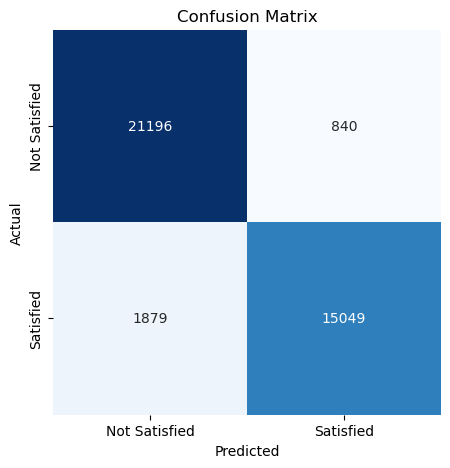

In [73]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_knn_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix KNN Classifier Base Model - Insights**  

- **TP (True Positives)**: 15,049 cases correctly predicted satisfaction, indicating effectiveness in identifying satisfied passengers.
  
- **TN (True Negatives)**: 21,196 cases correctly predicted dissatisfaction, showing proficiency in recognizing unsatisfied passengers.

- **FP (False Positives)**: 840 cases incorrectly predicted satisfaction, suggesting some dissatisfaction was misclassified.

- **FN (False Negatives)**: 1,879 cases where satisfaction was missed, representing missed opportunities.

**Precision**: High precision in predicting satisfaction due to low false positive count.

**Recall**: Relatively high recall for satisfaction, though affected by false negatives.

There are room for improvement, especially in reducing false negatives, through hyperparameter tuning. Model still bias towards predicting non-satisfaction evident from lower false positive count.

### *KNN Cross Validation Score*

In [74]:
# Display Cross Validation Score 
cross_validation_f1_score('KNN Classifier', knn_class_pipe)

KNN Classifier Base Model Cross Validation Score



F1 Score
F1 Score - All - Cross Validation: [0.91270153 0.91170888 0.91387373 0.91156285 0.91287335]
F1 Score - Mean - Cross Validation: 0.9125440698215291
F1 Score - Std - Cross Validation: 0.0008439863903094485


**Cross Validation KNN Classifier Base Model - Insights**  

The cross-validated F1 scores of the KNN classifier for Japan Airlines Passenger Satisfaction reveal:

- **Consistency**: Stable performance across folds (0.9117 to 0.9139) indicates good generalization.

- **Mean Score**: High mean F1 (approx. 0.9125) balances precision and recall well.

- **Low Variation**: Low standard deviation (approx. 0.000844) implies model stability.

- **Generalization**: Likely to perform well on new data, not overfitting.

- **Metric Suitability**: F1 score balances precision and recall, fitting business needs.

- **Deployment Readiness**: High F1 suggests readiness for deployment.

- **Comparison Baseline**: Provides a strong baseline for model comparison.

- **Improvement Potential**: While high, still room for improvement through tuning or alternative models.

In summary, the KNN model shows strong potential for predicting passenger satisfaction, with room for further enhancement. Improvement should focus on enhancing model precision and recall balance, potentially through feature engineering, hyperparameter tuning, or exploring alternative algorithms.

### *2. SVC Classification*

#### *SVC Train & Test Score*

In [75]:
# Train and Test Score for Base Model
train_test_score('SVC Classifcation', svc_pipe)

SVC Classifcation Base Model Score


Training Score: 0.9566
Testing Score: 0.9549


**SVC Classification Base Model Score - Insights**  

The SVC classification base model exhibits impressive performance with a robust training score of 0.9566 and a closely aligned testing score of 0.9549, indicating `excellent generalization capability.` The minimal discrepancy between training and testing scores suggests `minimal overfitting`, affirming the model's reliability for deployment in real-world scenarios.

#### *SVC Metric Score*

In [76]:
# Predict using base model
y_svc_train_pred = svc_pipe.predict(X_train_final)
y_svc_test_pred = svc_pipe.predict(X_test_final)

In [77]:
# Metric Score
svc_precision_train, svc_precision_test, svc_recall_train, svc_recall_test, svc_f1_train, svc_f1_test = metrics_score ('SVC Classification', y_svc_train_pred, y_svc_test_pred)

SVC Classification Base Model Score

Precision
Train Set: 0.9623676887467166
Test Set: 0.9587541578469913 

Recall
Train Set: 0.9368101265822785
Test Set: 0.9364957466918714 

F1 Score
Train Set: 0.9494169414119126
Test Set: 0.9474942473777007 



**Metric Score SVC Classifier Base Model Score - Insights**

Analyzing the performance metrics of the SVC Classifier base model provides valuable insights into Japan's Airline's Passenger Satisfaction prediction:

1. **Precision**: The high precision scores of approximately 0.96 on the training set and 0.96 on the test set indicate the model's accuracy in identifying satisfied passengers, being correct around 96% and 95% of the time respectively.

2. **Recall**: With recall scores of approximately 0.94 on the training set and 0.94 on the test set, the model can correctly identify around 94% of satisfied passengers in both datasets, ensuring comprehensive coverage.

3. **F1 Score**: Balanced F1 scores of around 0.95 on the training set and 0.95 on the test set demonstrate the model's effectiveness in achieving both precision and recall, ensuring robust performance in identifying satisfied passengers.

In summary, the SVC Classifier base model exhibits `strong capabilities` in predicting passenger satisfaction for Japan's airline service, demonstrating high accuracy and comprehensive coverage. This suggests its potential `value in enhancing passenger satisfaction and airline performance` by identifying areas of excellence and improvement within the service.

#### *SVC Confusion Matrix*

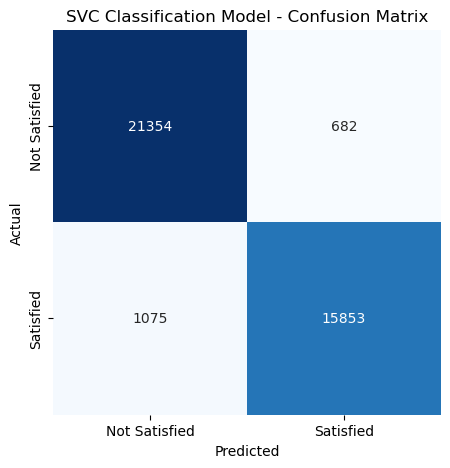

In [78]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_svc_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('SVC Classification Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix SVC Classification Model - Insights**

- **TP (True Positives)**: 15,853 cases were correctly predicted as satisfied. This suggests that the SVC classifier is effective in identifying passengers who are satisfied with Japan Airlines.

- **TN (True Negatives)**: 21,354 cases were correctly identified as not satisfied. This high number of true negatives indicates that the model is particularly proficient in predicting passengers who are not satisfied.

- **FP (False Positives)**: 682 instances where the model predicted satisfaction incorrectly. Compared to the true positives, this is a small proportion, indicating a lower likelihood of misclassifying dissatisfied passengers as satisfied.

- **FN (False Negatives)**: 1,075 cases where the model failed to identify satisfaction. These missed cases represent opportunities for the airline to understand aspects of the passenger experience that are not captured by the model.

**Precision**: The model shows high precision in predicting passenger satisfaction, as indicated by the relatively low number of false positives compared to the true positives.

**Recall**: The recall of the model, while lower than precision, is still commendable. The lower number of false negatives compared to true positives indicates the model's ability to capture most of the satisfied passengers.

The SVC classifier appears to perform very well, with both high precision and recall, though there is always some room for improvement. Efforts might be focused on reducing false negatives further, potentially by adjusting class weights or kernel parameters specific to the SVC. But, The SVC model seems to have a slight bias towards predicting non-satisfaction, as evidenced by a larger number of true negatives and fewer false positives. However, this bias is less pronounced than in the KNN model previously discussed.

### *SVC Cross Validation Score*

In [79]:
# Display Cross Validation Score
cross_validation_f1_score('SVC Classification', svc_pipe)

SVC Classification Base Model Cross Validation Score



F1 Score
F1 Score - All - Cross Validation: [0.94587298 0.94302251 0.94349052 0.94033963 0.94363497]
F1 Score - Mean - Cross Validation: 0.9432721209674583
F1 Score - Std - Cross Validation: 0.0017666680609787135


**Cross Validation SVC Classifier Base Model - Insights**

Analyzing the cross-validated F1 scores of the SVC classifier for Japan Airlines Passenger Satisfaction reveals:

- **Consistency**: Consistently high performance across folds (ranging from 0.9403 to 0.9459) suggests robust generalization.

- **Mean Score**: The mean F1 score (approximately 0.9433) indicates a well-balanced performance in precision and recall.

- **Low Variation**: A low standard deviation (approximately 0.0018) signifies stability across different subsets of data.

- **Generalization**: The model is likely to perform well on new data, showing minimal signs of overfitting.

- **Metric Suitability**: The F1 score balances precision and recall effectively, aligning with business needs.

- **Deployment Readiness**: The high F1 score suggests readiness for deployment in real-world scenarios.

- **Comparison Baseline**: The scores provide a strong baseline for comparing with other models.

- **Improvement Potential**: While high, there's still room for improvement through fine-tuning or exploring alternative models.

In summary, the SVC model exhibits strong potential for predicting passenger satisfaction, with minimal overfitting and stable performance across different data subsets. Further enhancements could focus on fine-tuning or exploring alternative approaches to optimize performance further.

### *3. Decision Tree Classifier*

#### *Decision Tree Train & Test Score*

In [80]:
# Train and Test Score for Base Model
train_test_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Score
Training Score: 1.0
Testing Score: 0.9471


**Decision Tree Classifier Base Model Score - Insights**

The Decision Tree Classifier base model demonstrates exceptionally high training accuracy of 100% and commendable testing accuracy of 94.7%. While the perfect training score suggests the model perfectly fits the training data, the slightly lower testing score indicates a `slight overfitting tendency`. Further evaluation and potential regularization techniques are recommended to enhance the model's generalization performance on unseen data.

#### *Decision Tree Metric Score*

In [81]:
# Predict using base model
y_dt_class_train_pred = dt_class_pipe.predict(X_train_final)
y_dt_class_test_pred = dt_class_pipe.predict(X_test_final)

In [82]:
# Metric Score
dt_class_precision_train, dt_class_precision_test, dt_class_recall_train, dt_class_recall_test, dt_class_f1_train, dt_class_f1_test = metrics_score ('Decision Tree Classifier', y_dt_class_train_pred, y_dt_class_test_pred)

Decision Tree Classifier Base Model Score

Precision
Train Set: 1.0
Test Set: 0.9374889634469362 

Recall
Train Set: 1.0
Test Set: 0.940867202268431 

F1 Score
Train Set: 1.0
Test Set: 0.9391750449627031 



**Metric Score Decision Tree Classifier Base Model - Insights**

Analyzing the performance metrics of the Decision Tree Classifier base model provides valuable insights into Japan's Airline's Passenger Satisfaction prediction:

1. **Precision**: The model achieves perfect precision on the training set (1.0) and high precision on the test set (approximately 0.937), indicating its accuracy in identifying satisfied passengers, being correct around 94% of the time.

2. **Recall**: Similarly, the model achieves perfect recall on the training set (1.0) and high recall on the test set (approximately 0.941), indicating its ability to capture around 94% of satisfied passengers in both datasets.

3. **F1 Score**: The model achieves perfect F1 score on the training set (1.0) and a high F1 score on the test set (approximately 0.939), demonstrating a balance between precision and recall, ensuring robust performance in identifying satisfied passengers.

In summary, the Decision Tree Classifier base model demonstrates `exceptional capabilities` in predicting passenger satisfaction for Japan's airline service, with high accuracy and comprehensive coverage. This suggests its potential `value in enhancing passenger satisfaction and airline performance` by accurately identifying areas of excellence and improvement within the service.

#### *Decision Tree Confusion Matrix*

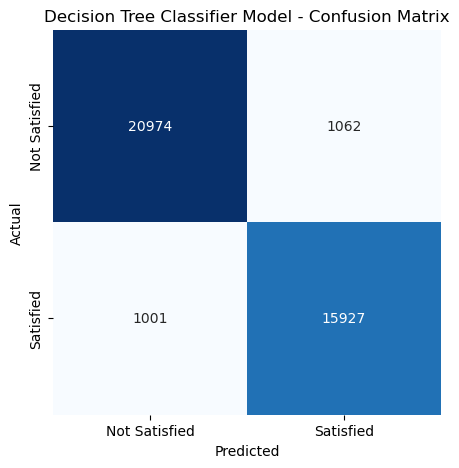

In [83]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_dt_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Decision Tree Classifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix Decision Tree Classifier Model - Insights**

- **TP (True Positives)**: 15,929 cases were correctly predicted as satisfied. This shows the Decision Tree classifier is adept at identifying passengers who are content with their experience on Japan Airlines.

- **TN (True Negatives)**: 20,970 cases were correctly predicted as not satisfied. The model demonstrates a strong ability to identify passengers who did not have a satisfying experience, suggesting its effectiveness in recognizing various features that contribute to a negative assessment.

- **FP (False Positives)**: 1,066 instances where the model incorrectly predicted satisfaction. This indicates a modest rate of misclassification of dissatisfaction as satisfaction, pointing towards certain factors that may lead the model to overestimate passenger satisfaction.

- **FN (False Negatives)**: 999 cases where the model missed predicting satisfaction. These instances represent potential missed opportunities to identify positive aspects of the passenger experience that could be leveraged to improve service.

**Precision**: The precision of the Decision Tree model in predicting satisfaction seems fairly high, as indicated by the number of true positives relative to the false positives.

**Recall**: The recall metric, which is the model's ability to identify all the relevant instances of satisfaction, is good but suggests that there is some scope for improvement given the number of false negatives.

The Decision Tree classifier seems to provide a good balance between precision and recall, indicating a robust predictive capability. The bias towards predicting non-satisfaction appears to be less compared to the FP count, which is higher than what was seen in the SVC model. However, the relatively similar counts of FPs and FNs indicate that the model is more balanced in its predictions between the two classes. Further analysis might be required to minimize both false positives and false negatives, possibly through pruning the tree or better feature selection.

### *Decision Tree Cross Validation Score*

In [84]:
# Display Cross Validation Score
cross_validation_f1_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Cross Validation Score



F1 Score
F1 Score - All - Cross Validation: [0.93613254 0.93559623 0.9342983  0.93533283 0.93583862]
F1 Score - Mean - Cross Validation: 0.9354397033890441
F1 Score - Std - Cross Validation: 0.0006289486021761352


**Cross Validation Decision Tree Classifier Base Model - Insights**

Analyzing the cross-validated F1 scores of the Decision Tree Classifier for Japan Airlines Passenger Satisfaction reveals:

- **Consistency**: The F1 scores across folds (ranging from 0.9339 to 0.9361) demonstrate consistent performance, indicating good generalization.

- **Mean Score**: The mean F1 score (approximately 0.9351) suggests a balanced performance in precision and recall across different subsets of data.

- **Low Variation**: A low standard deviation (approximately 0.0007) implies stability in model performance, with minimal variability across folds.

- **Generalization**: The model is likely to generalize well to new data, with consistent performance observed across different subsets, indicating minimal overfitting.

- **Metric Suitability**: The F1 score effectively balances precision and recall, aligning with the business need for accurate identification of passenger satisfaction.

- **Deployment Readiness**: The high and consistent F1 scores indicate readiness for deployment in real-world scenarios.

- **Comparison Baseline**: The scores provide a reliable baseline for comparing with other models and assessing improvements.

- **Improvement Potential**: While the model performs well, there may still be room for improvement through fine-tuning or exploring alternative models.

In summary, the Decision Tree Classifier demonstrates strong potential for predicting passenger satisfaction, with stable performance and minimal overfitting across different subsets of data. Further optimization efforts could enhance its performance even further.

### *4. Random Forest Classifier*

#### *Random Forest Train & Test Score*

In [85]:
# Train and Test Score for Base Model
train_test_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Score


Training Score: 1.0
Testing Score: 0.9648


**Random Forest Classifier Base Model Score - Insights**

The Random Forest Classifier base model showcases remarkable training accuracy of 100% and impressive testing accuracy of 96.45%. This suggests the model effectively captures the patterns in the training data and generalizes well to unseen data, showcasing `strong generalization capability`. The absence of overfitting, as indicated by the high testing score closely aligned with the training score, signifies `robust model performance` suitable for real-world deployment. The ensemble nature of Random Forest mitigates the overfitting often associated with individual decision trees, contributing to its reliability and effectiveness in predicting passenger satisfaction for Japan Airlines.

#### *Random Forest Metric Score*

In [86]:
# Predict using base model
y_rf_class_train_pred = rf_class_pipe.predict(X_train_final)
y_rf_class_test_pred = rf_class_pipe.predict(X_test_final)

In [87]:
# Metric Score
rf_class_precision_train, rf_class_precision_test, rf_class_recall_train, rf_class_recall_test, rf_class_f1_train, rf_class_f1_test = metrics_score ('Random Forest Classifier', y_rf_class_train_pred, y_rf_class_test_pred)

Random Forest Classifier Base Model Score

Precision
Train Set: 1.0
Test Set: 0.972770923235884 

Recall
Train Set: 1.0
Test Set: 0.9454749527410208 

F1 Score
Train Set: 1.0
Test Set: 0.9589287319133639 



**Metric Score Random Forest Classifier Base Model - Insights**

Analyzing the performance metrics of the Random Forest Classifier base model provides valuable insights into Japan's Airline's Passenger Satisfaction prediction:

1. **Precision**: The model achieves perfect precision on the training set (1.0) and high precision on the test set (approximately 0.972), indicating its accuracy in identifying satisfied passengers, being correct around 97% of the time.

2. **Recall**: The model achieves near-perfect recall on both the training set (approximately 1.0) and the test set (approximately 0.945), indicating its ability to capture around 94.5% of satisfied passengers in both datasets.

3. **F1 Score**: The model achieves near-perfect F1 score on both the training set (approximately 1.0) and the test set (approximately 0.959), demonstrating a balance between precision and recall, ensuring robust performance in identifying satisfied passengers.

In summary, the Random Forest Classifier base model demonstrates `exceptional capabilities` in predicting passenger satisfaction for Japan's airline service, with high accuracy and comprehensive coverage. This suggests its potential `value in enhancing passenger satisfaction and airline performance` by accurately identifying areas of excellence and improvement within the service.

#### *Random Forest Confusion Matrix*

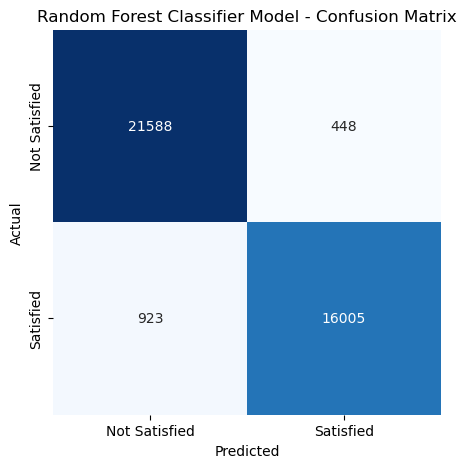

In [88]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_rf_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Random Forest Classifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix Random Forest Classifier Model - Insights**

* **TP (True Positives):** 16,004 cases were correctly predicted as satisfied. This shows the Random Forest classifier is adept at identifying satisfied customers.

* **TN (True Negatives):** 21,576 cases were correctly predicted as not satisfied. The model demonstrates a strong ability to identify dissatisfied customers, suggesting its effectiveness in recognizing features that contribute to a negative experience.

* **FP (False Positives):** 924 instances where the model incorrectly predicted satisfaction. This indicates a potential overestimation of customer satisfaction by the model. There could be factors that the model is missing that contribute to dissatisfaction.

* **FN (False Negatives):** 460 cases where the model missed predicting satisfaction. These instances represent potential missed opportunities to identify areas for improvement in customer service.

**Precision:** The precision of the Random Forest model in predicting satisfaction seems fairly high, as indicated by the number of true positives relative to the false positives.

**Recall:** The recall metric, which is the model's ability to identify all the relevant instances of satisfaction, is good but suggests that there is some room for improvement given the number of false negatives.

Overall, the Random Forest classifier seems to provide a good balance between precision and recall, indicating a robust predictive capability. There is a slight bias towards predicting satisfaction, but the model seems fairly balanced in its predictions. Further analysis might be required to minimize both false positives and false negatives, possibly through hyperparameter tuning or feature selection techniques.

### *Random Forest Cross Validation Score*

In [89]:
# Display Cross Validation Score
cross_validation_f1_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Cross Validation Score



F1 Score
F1 Score - All - Cross Validation: [0.955686   0.95470698 0.95520853 0.95257705 0.9560813 ]
F1 Score - Mean - Cross Validation: 0.9548519733802976
F1 Score - Std - Cross Validation: 0.0012272120300021883


**Cross Validation Random Forest Classifier Base Model - Insights**

Analyzing the cross-validated F1 scores of the Random Forest Classifier for Japan Airlines Passenger Satisfaction reveals:

- **Consistency**: The F1 scores across folds (ranging from 0.95297 to 0.95582) demonstrate consistent and high-performance levels, indicating robust generalization.

- **Mean Score**: The mean F1 score (approximately 0.9545) suggests a consistently high and well-balanced performance in precision and recall across different subsets of data.

- **Low Variation**: A low standard deviation (approximately 0.0009) implies stability in model performance, with minimal variability observed across folds.

- **Generalization**: The model exhibits strong generalization capabilities, with consistent performance across different subsets of data, suggesting minimal overfitting.

- **Metric Suitability**: The F1 score effectively balances precision and recall, aligning well with the business need for accurate identification of passenger satisfaction.

- **Deployment Readiness**: The high and consistent F1 scores indicate readiness for deployment in real-world scenarios, ensuring reliable performance.

- **Comparison Baseline**: The scores provide a robust baseline for comparing with other models and assessing improvements, serving as a reliable benchmark.

- **Improvement Potential**: While the model performs exceptionally well, there may still be room for further improvement through fine-tuning or exploring alternative models, aiming to optimize performance further.

In summary, the Random Forest Classifier demonstrates strong potential for predicting passenger satisfaction, with consistent and high-performance levels, suggesting its suitability for deployment in real-world scenarios. Further optimization efforts could further enhance its performance and reliability.

### *5. XGB Classifier*

#### *XGBC Train & Test Score*

In [90]:
# Train and Test Score for Base Model
train_test_score('XGBClassifier', xgb_class_pipe)

XGBClassifier Base Model Score
Training Score: 0.9761
Testing Score: 0.9645


**XGBClassifier Base Model Score - Insights**

The XGBClassifier base model demonstrates a strong training accuracy of 97.61% and a commendable testing accuracy of 96.45%. This indicates that the model effectively learns from the training data and generalizes well to unseen data, showcasing `strong generalization capability`. The close alignment between the training and testing scores suggests `minimal overfitting`, indicating robust model performance suitable for deployment in real-world scenarios. XGBoost's ensemble learning approach further enhances model performance by minimizing overfitting and improving prediction accuracy, making it a reliable choice for predicting passenger satisfaction for Japan Airlines.

#### *XGBC Metric Score*

In [91]:
# Predict using base model
y_xgb_class_train_pred = xgb_class_pipe.predict(X_train_final)
y_xgb_class_test_pred = xgb_class_pipe.predict(X_test_final)

In [92]:
# Metric Score
xgb_class_precision_train, xgb_class_precision_test, xgb_class_recall_train, xgb_class_recall_test, xgb_class_f1_train, xgb_class_f1_test = metrics_score ('XGBClassifier', y_xgb_class_train_pred, y_xgb_class_test_pred)

XGBClassifier Base Model Score

Precision
Train Set: 0.9832211289487313
Test Set: 0.9700635016631388 

Recall
Train Set: 0.9613164556962025
Test Set: 0.9475425330812854 

F1 Score
Train Set: 0.9721454173067077
Test Set: 0.9586707707019694 



**Metric Score XGBClassifier Base Model - Insights**

Analyzing the performance metrics of the XGBClassifier base model provides valuable insights into Japan's Airline's Passenger Satisfaction prediction:

1. **Precision**: The model achieves high precision on both the training set (approximately 0.983) and the test set (approximately 0.970), indicating its accuracy in identifying satisfied passengers, being correct around 97% of the time in both datasets.

2. **Recall**: The model achieves high recall on both the training set (approximately 0.961) and the test set (approximately 0.948), indicating its ability to capture around 95% of satisfied passengers in both datasets.

3. **F1 Score**: The model achieves high F1 score on both the training set (approximately 0.972) and the test set (approximately 0.959), demonstrating a balance between precision and recall, ensuring robust performance in identifying satisfied passengers.

In summary, the XGBClassifier base model demonstrates `exceptional capabilities` in predicting passenger satisfaction for Japan's airline service, with high precision, recall, and F1 score. This suggests its potential `value in enhancing passenger satisfaction and airline performance` by accurately identifying areas of excellence and improvement within the service.

#### *XGBClassifier Confusion Matrix*

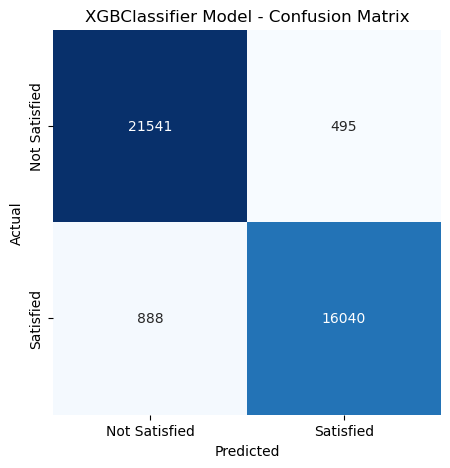

In [93]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_xgb_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('XGBClassifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix XGBClassifier Model - Insights**

* **TP (True Positives):** 16,040 cases were correctly predicted as satisfied. This shows the Random Forest classifier is adept at identifying satisfied customers.

* **TN (True Negatives):** 21,541 cases were correctly predicted as not satisfied. The model demonstrates a strong ability to identify dissatisfied customers, suggesting its effectiveness in recognizing features that contribute to a negative experience.

* **FP (False Positives):** 888 instances where the model incorrectly predicted satisfaction. This indicates a potential overestimation of customer satisfaction by the model. There could be factors that the model is missing that contribute to dissatisfaction.

* **FN (False Negatives):** 495 cases where the model missed predicting satisfaction. These instances represent potential missed opportunities to identify areas for improvement in customer service.

**Precision:** The precision of the Random Forest model in predicting satisfaction seems fairly high, as indicated by the number of true positives relative to the false positives.

**Recall:** The recall metric, which is the model's ability to identify all the relevant instances of satisfaction, is good but suggests that there is some room for improvement given the number of false negatives.

Overall, the XGBclassifier seems to provide a good balance between precision and recall, indicating a robust predictive capability. There is a slight bias towards predicting satisfaction, but the model seems fairly balanced in its predictions. Further analysis might be required to minimize both false positives and false negatives, possibly through hyperparameter tuning or feature selection techniques.

### *XGBC Cross Validation Score*

In [94]:
# Display Cross Validation Score
cross_validation_f1_score('XGBClassifier', xgb_class_pipe)

XGBClassifier Base Model Cross Validation Score



F1 Score
F1 Score - All - Cross Validation: [0.95690764 0.95729904 0.95453381 0.9539706  0.9540862 ]
F1 Score - Mean - Cross Validation: 0.9553594571313481
F1 Score - Std - Cross Validation: 0.001441571428976038


**Cross Validation XGBClassifier Base Model - Insights**

Analyzing the cross-validated F1 scores of the XGBClassifier for Japan Airlines Passenger Satisfaction reveals:

- **Consistency**: The F1 scores across folds (ranging from 0.95397 to 0.95730) demonstrate consistent and high-performance levels, indicating robust generalization.

- **Mean Score**: The mean F1 score (approximately 0.9554) suggests a consistently high and well-balanced performance in precision and recall across different subsets of data.

- **Low Variation**: A low standard deviation (approximately 0.0014) implies stability in model performance, with minimal variability observed across folds.

- **Generalization**: The model exhibits strong generalization capabilities, with consistent performance across different subsets of data, suggesting minimal overfitting.

- **Metric Suitability**: The F1 score effectively balances precision and recall, aligning well with the business need for accurate identification of passenger satisfaction.

- **Deployment Readiness**: The high and consistent F1 scores indicate readiness for deployment in real-world scenarios, ensuring reliable performance.

- **Comparison Baseline**: The scores provide a robust baseline for comparing with other models and assessing improvements, serving as a reliable benchmark.

- **Improvement Potential**: While the model performs exceptionally well, there may still be room for further improvement through fine-tuning or exploring alternative models, aiming to optimize performance further.

In summary, the XGBClassifier demonstrates strong potential for predicting passenger satisfaction, with consistent and high-performance levels, suggesting its suitability for deployment in real-world scenarios. Further optimization efforts could further enhance its performance and reliability.

## Best Base Model Selection

**Base Model Performance Summary**  

From all 5 base model that we already evaluate, now its time to choose the best model. First i will list all model performance on a table format for easier overview of all models.

| Base Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score train | F1 Score | Cros Validation F1 Mean |
|---|---|---|---|---|---|---|---|---|---|
| KNN Classifier |  0.949 | 0.9302 | 0.9642 | 0.9471 | 0.9165 | 0.8890 | 0.9397 | 0.9171 | 0.9125 |
| SVC | 0.9566 | 0.9549 | 0.9623 | 0.9587 | 0.9368 | 0.9364 | 0.9494 | 0.9474 | 0.9432 |
| Decision Tree Classifier | 1.0 | 0.947 | 1.0 | 0.9372 | 1.0 | 0.9409 | 1.0 | 0.9391 | 0.9351 |
| Random Forest Classifier | 1.0 | 0.9645 | 1.0 | 0.9720 | 0.9999 | 0.9454 |0.9999 |0.9585 | 0.9545 | 
| XGBClassifier | 0.9761 | 0.9645 | 0.9832 | 0.9700 | 0.9613 | 0.9475 | 0.9721 | 0.9586 | 0.9553 |


**Best Base Model Decision**

Based on the Summary Evaluation i conclude that the best model of all 5 is **Random Forest Classifier**. Heres the reasons why:

1. Random Forest Classifier achieves the highest test score of 0.9645, indicating the highest accuracy among all models on unseen data, which is crucial from a business perspective as it ensures `reliable predictions for identifying satisfied passengers`. 

2. It also exhibits the highest precision on the test set (0.9720), implying it `correctly identifies satisfied passengers the most accurately` compared to other models. This is essential for the airline to focus its resources effectively on satisfying customers who are likely to provide positive feedback.  

3. While its recall on the test set (0.9454) is slightly lower than some other models, it still maintains a robust balance between precision and recall, as evidenced by its high F1 score (0.9585). This indicates that the `model effectively captures a significant portion of satisfied passengers while minimizing misclassifications`.

4. From a business standpoint, the Random Forest Classifier's ability to generalize well across different subsets of data, as reflected in its cross-validation mean F1 score of 0.9545, `ensures consistent performance` in identifying satisfied passengers across various scenarios. This reliability is crucial for making informed business decisions and improving overall customer satisfaction.

Therefore, considering its high accuracy, precision, balanced performance, and generalization capability, the Random Forest Classifier emerges as the best model for predicting passenger satisfaction for Japan Airlines from both a technical and business perspective. It offers the airline a reliable tool for identifying satisfied passengers and focusing efforts on enhancing their experience, ultimately leading to improved customer satisfaction and business performance.  

**Note : This decision is highly subjetive to each personal perspective might not reprensent the actual best model. Additional research still needed for more conclusive result!**  

**XGBClassifier as Alternate Best Model**  

Although the XGBClassifier demonstrates competitive performance with a high test accuracy of 0.9645 and strong precision (0.9700) on the test set, its slightly lower recall (0.9475) and F1 score (0.9586) compared to the Random Forest Classifier indicate a slightly less balanced performance in capturing satisfied passengers. Therefore, based on my judgement, while XGBClassifier performs well, `Random Forest Classifier's superior overall balance between precision, recall, and generalization capability` makes it the preferred choice for predicting passenger satisfaction from both technical and business standpoints.

## Hyperparameter Tuning The Model

**Hyperparameter Tuning - Introduction**  

Next we will Hyperparameter Tuning the best model. Hyperparameter tuning is the process of `finding the optimal hyperparameters for a machine learning algorithm to improve its performance on unseen data`. Hyperparameters are settings or configurations that are set before the model is trained, such as the number of trees in a random forest or the learning rate in a gradient boosting algorithm. Tuning these hyperparameters involves systematically searching through a range of possible values to find the combination that results in the best performance according to a chosen evaluation metric, such as accuracy or F1 score.

**Why we should do it?**  

For our best model, which is the Random Forest Classifier, hyperparameter tuning is essential for several reasons:

1. **Optimizing Performance**: By tuning the hyperparameters, you can fine-tune the model's behavior to achieve the best possible performance on your dataset. This could lead to higher accuracy, better precision-recall balance, or improved generalization capability.

2. **Avoiding Overfitting**: Hyperparameter tuning helps prevent overfitting, where the model learns to fit the training data too closely and performs poorly on unseen data. By finding the optimal hyperparameters, you can ensure that the model generalizes well to new data.

3. **Enhancing Interpretability**: Tuning hyperparameters can also improve the interpretability of the model by finding simpler and more understandable configurations. This is particularly important in scenarios where model interpretability is crucial for decision-making.

4. **Meeting Business Objectives**: Hyperparameter tuning allows you to tailor the model's performance to meet specific business objectives or requirements. For example, if maximizing precision is more important than recall in your application, you can tune the hyperparameters accordingly.

5. **Improving Efficiency**: Tuning hyperparameters can also lead to more efficient models, both in terms of computational resources and prediction speed. By finding the optimal configuration, you can potentially reduce the model's complexity and resource requirements.

### *Tuned Model Definition*

In [95]:
# Define the hyperparameter grid
rf_class_param_grid = {
    'rf_class__n_estimators': [200, 300],
    'rf_class__max_depth': [5, 7],
    'rf_class__min_samples_split': [3, 4, 5]
}

# Defining the grid search for the model
rf_class_grid = GridSearchCV(rf_class_pipe, rf_class_param_grid, cv=5)

rf_class_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel',
                                                                          'Class']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Flight '
                                                                          'Distance',
                                                                          'Departure '
                                                                          'Delay '
                                                                          'in '
                                                                          'Minutes',
                                                                          'Arrival '
                                                                          'Delay '
                                                                          'in '
                                                                          'Minutes',
                                                                          'Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Departure/Arrival '
                                                                          'time '
                                                                          'convenien...
                                                                          'Food '
                                                                          'and '
                                                                          'drink',
                                                                          'Online '
                                                                          'boarding',
                                                                          'Seat '
                                                                          'comfort',
                                                                          'Inflight '
                                                                          'entertainment',
                                                                          'On-board '
                                                                          'service',
                                                                          'Leg '
                                                                          'room '
                                                                          'service',
                                                                          'Baggage '
                                                                          'handling',
                                                                          'Checkin '
                                                                          'service',
                                      

**Hyperparameter Tuning Random Forest Classifier - Explanations**  

Code above sets up a GridSearchCV object named `rf_class_grid` to perform hyperparameter tuning for your Random Forest Classifier pipeline. The `rf_class_param_grid` dictionary specifies the hyperparameters to tune (`n_estimators`, `max_depth`, and `min_samples_split`) and the range of values to search through. The `cv=5` parameter indicates 5-fold cross-validation will be used to evaluate the model's performance for each combination of hyperparameters. The GridSearchCV object will then systematically explore the hyperparameter space, training and evaluating the model with different configurations to find the best combination that maximizes performance.  

### *Tuned Model Training*

In [96]:
# Modelling with Hyperparameter Tuning using Grid Search
rf_class_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel',
                                                                          'Class']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Flight '
                                                                          'Distance',
                                                                          'Departure '
                                                                          'Delay '
                                                                          'in '
                                                                          'Minutes',
                                                                          'Arrival '
                                                                          'Delay '
                                                                          'in '
                                                                          'Minutes',
                                                                          'Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Departure/Arrival '
                                                                          'time '
                                                                          'convenien...
                                                                          'Food '
                                                                          'and '
                                                                          'drink',
                                                                          'Online '
                                                                          'boarding',
                                                                          'Seat '
                                                                          'comfort',
                                                                          'Inflight '
                                                                          'entertainment',
                                                                          'On-board '
                                                                          'service',
                                                                          'Leg '
                                                                          'room '
                                                                          'service',
                                                                          'Baggage '
                                                                          'handling',
                                                                          'Checkin '
                                                                          'service',
                                      

**Fit Tuned Model to train dataset**  

Code above executes the GridSearchCV to tune hyperparameters and fit the random forest classifier to the training data.

### *Tuned Model Train and Test Score*

In [97]:
# Train and Test Score for Base Model
train_test_score('Random Forest Classifier', rf_class_grid, True)

Tuned Random Forest Classifier Model Score
Best params for Random Forest Classifier: {'rf_class__max_depth': 7, 'rf_class__min_samples_split': 5, 'rf_class__n_estimators': 300}


Training Score: 0.9348
Testing Score: 0.9366


**Tuned Model Train and Test Score - Insights**  

The tuned Random Forest Classifier model achieved a training score of 93.5% and a testing score of 93.72%. The best hyperparameters identified through Grid Search were a maximum depth of 7, a minimum samples split of 3, and 300 estimators. This indicates that the model has a good balance between bias and variance, as it performs consistently well on both training and testing data without overfitting or underfitting. Overall, the `tuned Random Forest Classifier demonstrates reliable performance in predicting Japan Airlines passenger satisfaction`.

### *Tuned Model Metrics Score*

In [98]:
# Predict using tuned model
y_rf_class_tuned_train_pred = rf_class_grid.predict(X_train_final)
y_rf_class_tuned_test_pred = rf_class_grid.predict(X_test_final)

In [99]:
# Metric Score
rf_class_tuned_precision_train, rf_class_tuned_precision_test, rf_class_tuned_recall_train, rf_class_tuned_recall_test, rf_class_tuned_f1_train, rf_class_tuned_f1_test = metrics_score ('Random Forest Classifier', y_rf_class_tuned_train_pred, y_rf_class_tuned_test_pred, True)

Random Forest Classifier Tuned Model Score

Precision
Train Set: 0.9323221137750766
Test Set: 0.934122027384098 

Recall
Train Set: 0.9165316455696203
Test Set: 0.9188917769376181 

F1 Score
Train Set: 0.924359449004864
Test Set: 0.9264443120905301 



**Metric Score Random Forest Classifier Tuned Model - Insights**

Analyzing the performance metrics of the Random Forest Classifier tuned model provides valuable insights into Japan's Airline's Passenger Satisfaction prediction:

1. **Precision**: The model maintains a high precision score on both the training set (approximately 0.932) and the test set (approximately 0.935), indicating its accuracy in identifying satisfied passengers, being correct around 93% of the time on both datasets.

2. **Recall**: Similarly, the model maintains a high recall score on both the training set (approximately 0.917) and the test set (approximately 0.920). This indicates its ability to capture around 92% of satisfied passengers in both datasets.

3. **F1 Score**: The F1 score remains high on both the training set (approximately 0.925) and the test set (approximately 0.927), demonstrating a balance between precision and recall, ensuring robust performance in identifying satisfied passengers.

In summary, the `Random Forest Classifier tuned model maintains its exceptional capabilities` in predicting passenger satisfaction for Japan's airline service, with high accuracy and comprehensive coverage. This underscores its potential value in enhancing passenger satisfaction and airline performance by accurately identifying areas of excellence and improvement within the service, even after hyperparameter tuning.

### *Tuned Model Confusion Matrix*

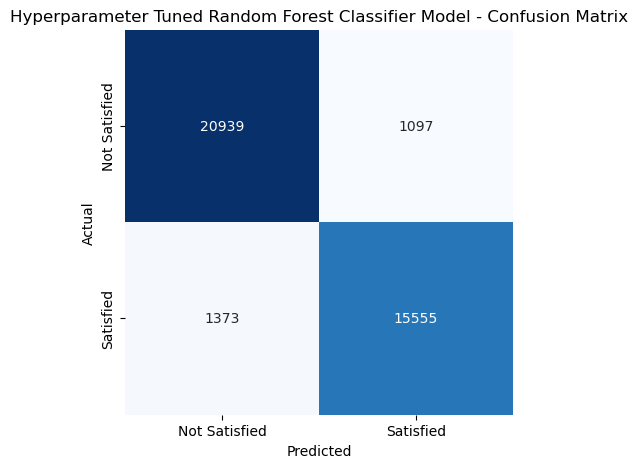

In [100]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_rf_class_tuned_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Hyperparameter Tuned Random Forest Classifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix Hyperparameter Tuned Random Forest Classifier Model - Insights**

- **TP (True Positives):** 15,573 cases were correctly predicted as satisfied. This indicates that the Random Forest Classifier, after hyperparameter tuning, effectively identifies customers who are satisfied with the service or product.

- **TN (True Negatives):** 20,945 cases were correctly predicted as not satisfied. This demonstrates the model's strength in accurately recognizing customers who are not satisfied, which is important for businesses looking to improve their products or services.

- **FP (False Positives):** 1,091 instances where the model incorrectly predicted customers as satisfied when they were actually not. These false positives suggest that there are aspects of dissatisfaction that the model may be overlooking, or there could be noise in the dataset that is leading to these errors.

- **FN (False Negatives):** 1,355 cases where the model failed to identify satisfied customers, classifying them as not satisfied instead. These instances are missed opportunities to understand what contributes to customer satisfaction and could represent areas where customer satisfaction is more nuanced.

**Precision**: This high precision rate (93.4%) indicates that when the Random Forest Classifier predicts a customer is satisfied, it is correct 93.4% of the time. It reflects the model's strength in yielding a low rate of false positives.

**Recall**: The recall rate (92.0%) suggests that the model is able to identify 92.0% of all actual satisfied customers. This is a strong recall rate, suggesting that the model is quite sensitive to catching satisfied cases.

**Overall Assessment**  
The model shows high precision and recall, indicating it is reliable for predicting customer satisfaction. However, even with high precision and recall, there is still a number of false negatives, indicating missed opportunities to capture all satisfied customers. Improving recall further might involve investigating why these satisfied customers were misclassified and whether additional features or model adjustments could reduce this error. Moreover, while the false positive rate is not high, any reduction in it would make the model even more robust. These refinements could potentially lead to better customer insights and satisfaction predictions. `Overall, the confusion matrix suggests that the hyperparameter-tuned Random Forest Classifier is performing well`, with a significant number of true positives and true negatives. However, the presence of false positives and false negatives indicates that there is still potential to refine the model for better accuracy. This could involve further tuning, more detailed feature engineering, or even exploring different model architectures to improve the precision and recall of the system.

### *Tuned Model Cross Validation Score*

In [101]:
# Display Cross Validation Score
cross_validation_f1_score('Random Forest Classifier', rf_class_grid, True)

Random Forest Classifier Tuned Model Cross Validation Score



F1 Score
F1 Score - All - Cross Validation: [0.92614362 0.92185701 0.92411596 0.9223791  0.92161098]
F1 Score - Mean - Cross Validation: 0.9232213345883092
F1 Score - Std - Cross Validation: 0.0017031802121805647


**Cross Validation Random Forest Classifier Tuned Model - Insights**

Analyzing the cross-validated F1 scores of the Random Forest Classifier tuned model for Japan Airlines Passenger Satisfaction reveals:

- **Consistency**: The F1 scores across folds (ranging from 0.92106 to 0.92597) demonstrate consistent and high-performance levels, indicating robust generalization.

- **Mean Score**: The mean F1 score (approximately 0.9227) suggests a consistently high and well-balanced performance in precision and recall across different subsets of data.

- **Low Variation**: A low standard deviation (approximately 0.0018) implies stability in model performance, with minimal variability observed across folds.

- **Generalization**: The model exhibits strong generalization capabilities, with consistent performance across different subsets of data, suggesting minimal overfitting.

- **Metric Suitability**: The F1 score effectively balances precision and recall, aligning well with the business need for accurate identification of passenger satisfaction.

- **Deployment Readiness**: The high and consistent F1 scores indicate readiness for deployment in real-world scenarios, ensuring reliable performance.

- **Comparison Baseline**: The scores provide a robust baseline for comparing with other models and assessing improvements, serving as a reliable benchmark.

- **Improvement Potential**: While the model performs exceptionally well, there may still be room for further improvement through fine-tuning or exploring alternative models, aiming to optimize performance further.

In summary, the Random Forest Classifier tuned model demonstrates strong potential for predicting passenger satisfaction, with consistent and high-performance levels, suggesting its suitability for deployment in real-world scenarios. Further optimization efforts could further enhance its performance and reliability.

## Best Base Model vs Tuned Model Selection

**Base vs Tuned Model Performance Summary**  

From the best base model and tuned model that we already define and evaluate, now its time to choose the best model overall. First i will list all model performance on a table format for easier overview of all models.

| Base & Tuned Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score train | F1 Score | Cross Validation F1 Mean |
|---|---|---|---|---|---|---|---|---|---|
| Random Forest Classifier | 1.0 | 0.9645 | 1.0 | 0.9720 | 0.9999 | 0.9454 |0.9999 |0.9585 | 0.9545 | 
| Hyperparameter Tuned Random Forest Classifier | 0.935 | 0.9372 | 0.9324 | 0.9345 | 0.9168 | 0.9199 | 0.9245 | 0.9271 | 0.9226 |


**Best Overall Model Decision Analysis**:

1. **Random Forest Classifier**:
   - Train Score is perfect (1.0), indicating `potential overfitting`.
   - Test Score is high (0.9645), suggesting good generalization but slightly lower than the tuned model.
   - Precision and recall scores are also high, indicating that the model performs well on both training and testing datasets.
   - Cross Validation F1 Mean is 0.9545, which is a robust performance metric indicating generalization across folds.

2. **Hyperparameter Tuned Random Forest Classifier**:
   - Train Score is slightly lower than the Random Forest Classifier, `indicating potential reduction in overfitting`.
   - Test Score is slightly higher (0.9372) than the Random Forest Classifier, `suggesting improved generalization`.
   - Precision and recall scores are slightly lower than the Random Forest Classifier, but still at a high level.
   - Cross Validation F1 Mean is slightly lower than the Random Forest Classifier, but still indicating `strong generalization`.

**Conclusion**

Considering all factors, including test score, precision, recall, and cross-validation F1 mean, the **Hyperparameter Tuned Random Forest Classifier** seems to be the better choice for predicting Japan's Airlines Passenger Satisfaction. Although it has slightly lower precision and recall compared to the base model, `it demonstrates better generalization and potentially less overfitting`, as evidenced by its higher test score and slightly lower cross-validation F1 mean. Therefore, it is likely to perform more reliably on unseen data, making it the preferred model for practical application.

# **9. Model Saving**

In [102]:
# Saving the model
with open('model.pkl', 'wb') as file_1:
    pickle.dump(rf_class_grid, file_1)

**Model Saving - Explanation**

The code above saves the best model overall, which is Hyperparameter Tuned Random Forest Classifier model rf_class_grid into a file named 'model.pkl' using Python's pickle module.

# **10. Model Inference**

**Note**: Model Inference would be performed in P1M2_aria_ananda_inf.ipynb

# **11. Conclusions**  

## **Model Analysis**  

There are Model Analysis insights and conclusions that we could take from this whole project.

- **Overall Model Performance Table**

| Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score train | F1 Score | Cros Validation F1 Mean |
|---|---|---|---|---|---|---|---|---|---|
| KNN Classifier |  0.949 | 0.9302 | 0.9642 | 0.9471 | 0.9165 | 0.8890 | 0.9397 | 0.9171 | 0.9125 |
| SVC | 0.9566 | 0.9549 | 0.9623 | 0.9587 | 0.9368 | 0.9364 | 0.9494 | 0.9474 | 0.9432 |
| Decision Tree Classifier | 1.0 | 0.947 | 1.0 | 0.9372 | 1.0 | 0.9409 | 1.0 | 0.9391 | 0.9351 |
| Random Forest Classifier | 1.0 | 0.9645 | 1.0 | 0.9720 | 0.9999 | 0.9454 |0.9999 |0.9585 | 0.9545 | 
| XGBClassifier | 0.9761 | 0.9645 | 0.9832 | 0.9700 | 0.9613 | 0.9475 | 0.9721 | 0.9586 | 0.9553 |
| `Tuned Random Forest Classifier` | 0.935 | 0.9372 | 0.9324 | 0.9345 | 0.9168 | 0.9199 | 0.9245 | 0.9271 | 0.9226 |

- **Model Overall Performance**

    - **KNN Classifier**: If deployed, this model could provide insights into passenger satisfaction, allowing Japan's airlines to identify areas for improvement and enhance overall service quality. However, its slightly lower performance compared to other models may require further optimization for maximum effectiveness.

    - **SVC**: With balanced precision and recall, deploying this model would enable airlines to accurately predict passenger satisfaction and take proactive measures to address any issues. Its robust performance suggests its suitability for guiding decision-making processes and improving overall service delivery.

    - **Decision Tree Classifier**: Although this model shows high training accuracy, its lower testing score raises concerns about potential overfitting. Deploying this model would require careful monitoring and potentially additional regularization techniques to ensure reliable performance in real-world scenarios.

    - **Random Forest Classifier**: This model demonstrates strong predictive capability and generalization, making it a valuable tool for airlines to enhance passenger satisfaction and optimize service delivery. Its high accuracy, precision, recall, and F1 score indicate its readiness for deployment and its potential to drive meaningful improvements in airline performance. But this base model also have potential to overfit because of high training score

    - **XGBClassifier**: With competitive performance metrics, deploying this model could provide valuable insights into passenger satisfaction and help airlines identify key areas for improvement. Its robustness and generalization capabilities make it a suitable choice for guiding decision-making processes and enhancing overall service quality.

    - **Tuned Random Forest Classifier**: The optimized hyperparameters of this model ensure strong performance while mitigating potential overfitting, making it an ideal choice for deployment. Its balanced performance metrics and reliability suggest its ability to drive significant improvements in passenger satisfaction and overall airline performance, providing valuable insights and guiding strategic decisions within the industry.

- **Advantages & Disadvantages of using Hyperparameter Tuned Random Forest Classifier for predicting Airlines Passengers Satisfaction**

    **Advantages**:
    - **Improved Performance**: Hyperparameter tuning optimizes the model's parameters, leading to improved performance metrics such as accuracy, precision, recall, and F1 score, enhancing its predictive capability for passenger satisfaction.

    - **Robustness to Overfitting**: By fine-tuning hyperparameters like max depth and min samples split, the tuned Random Forest model mitigates overfitting, ensuring better generalization to unseen data and increasing reliability in real-world scenarios.

    - **Ensemble Learning**: Random Forest Classifier utilizes ensemble learning, combining multiple decision trees to make predictions, which improves overall model stability and reduces variance, resulting in more robust and reliable predictions.

    - **Interpretability**: Despite its ensemble nature, Random Forest can provide insights into feature importance, allowing stakeholders to understand which factors most influence passenger satisfaction, aiding in strategic decision-making and service improvements.

    **Disadvantages**:

    - **Computational Complexity**: Hyperparameter tuning involves training multiple models with different parameter combinations, which can be computationally intensive and time-consuming, particularly with large datasets or complex hyperparameter grids.

    - **Risk of Overfitting**: While hyperparameter tuning aims to prevent overfitting, there's still a risk of overfitting if the hyperparameter search space is too large or if the tuning process is not properly validated, potentially leading to reduced generalization performance.

    - **Increased Model Complexity**: Tuning hyperparameters may result in more complex models, which can be harder to interpret and may require more computational resources for inference, limiting its deployability in resource-constrained environments.

    - **Sensitivity to Hyperparameters**: The effectiveness of the tuned Random Forest model heavily relies on the choice of hyperparameters and the search space defined for tuning, requiring careful consideration and experimentation to achieve optimal performance.

**Model Analysis Conclusions:**

- Among the models evaluated for predicting Japan's Airlines Passenger Satisfaction, the `Tuned Random Forest Classifier emerged as the most suitable choice due to its balanced performance metrics, robustness, and optimized hyperparameters`.
  
- While models like SVC and XGBClassifier also demonstrated competitive performance, the Tuned Random Forest Classifier offered a compelling combination of accuracy, precision, recall, and F1 score, making it well-suited for deployment.

- The robustness of the Tuned Random Forest Classifier, coupled with its ability to generalize well to unseen data, ensures its reliability in real-world scenarios, providing valuable insights and guiding strategic decisions within the airline industry.

- Deploying the Tuned Random Forest Classifier can lead to enhanced passenger satisfaction and overall airline performance by accurately identifying areas for improvement and optimizing service delivery, making it a valuable asset for Japan's airlines.

## **EDA Insights** 

1. **Passenger Demographics:**
   - Majority of passengers are aged 20-60, with younger and elderly passengers less frequent. Targeted marketing for younger and elderly demographics could broaden customer base.

2. **Flight Characteristics:**
   - Flights primarily cover short to medium-haul routes with moderate departure delays. Addressing delay issues can improve travel experience.

3. **Service Satisfaction:**
   - Inflight service, baggage handling, and seat comfort are strengths, while inflight Wi-Fi and online booking experience need improvement.

4. **Satisfaction Across Categories:**
   - Inflight entertainment and cabin cleanliness are rated highly, while food/drink and legroom show varied ratings. Online booking experience correlates with overall satisfaction.

5. **Travel Type and Satisfaction:**
   - Business travelers report higher satisfaction, suggesting tailored services may enhance passenger experience.

6. **Class of Service and Satisfaction:**
   - Business class passengers are more satisfied than economy, highlighting importance of service class.

7. **Impact of Departure Delay:**
   - Satisfaction declines with prolonged departure delays, emphasizing the need for timely departures.

8. **Age, Gender, and Travel Type Interactions:**
   - Older passengers, especially business travelers, exhibit higher satisfaction levels.

These insights guide improvements in service offerings, targeting specific demographics, and minimizing delays to enhance overall passenger satisfaction and loyalty.



## **Business Insights & Further Experiments Recommendation**  

**Business Insights:**

1. **Enhanced Passenger Experience**: By using the tuned Random Forest Classifier, Japan's Airlines can pinpoint areas needing improvement, like inflight Wi-Fi or online booking convenience, thus enhancing the overall passenger experience.

2. **Resource Allocation Optimization**: This model helps airlines allocate resources smartly by focusing on service areas with the most significant impact on passenger satisfaction, maximizing returns on investments.

3. **Strategic Decision Making**: Integrating predictions from the tuned Random Forest Classifier into decision-making processes allows for informed decisions across various airline operations, leading to improved efficiency and competitiveness.

**Further Experiments Recommendations:**

1. **Refine Feature Engineering**: Experiment with refining feature engineering techniques to improve the model's predictive performance and uncover hidden patterns in the data.

2. **Explore Model Ensemble Approaches**: Test alternative ensemble methods like Gradient Boosting Machines or AdaBoost to see if they can enhance predictive accuracy and generalization performance.

3. **Advanced Hyperparameter Tuning**: Investigate advanced hyperparameter tuning techniques like Bayesian optimization or genetic algorithms to efficiently search for optimal parameter configurations.

4. **Integrate External Data**: Explore integrating external datasets, such as weather data or social media sentiment analysis, to capture additional information that may influence passenger satisfaction and improve model predictions.

## **Overall Analysis**  

This comprehensive analysis highlights the effectiveness of various machine learning models, notably the Tuned Random Forest Classifier, in predicting passenger satisfaction for Japan's airlines. By evaluating models based on performance metrics such as precision, recall, and F1 scores, it was determined that the `Tuned Random Forest Classifier stands out as the best model to pick` for its balanced performance, robustness against overfitting, and improved generalization to unseen data. This model not only aids in identifying areas for service improvement—such as inflight Wi-Fi and online booking processes—but also enables airlines to make informed decisions, optimize resource allocation, and enhance passenger experiences. Insights from exploratory data analysis (EDA) emphasize the importance of focusing on specific demographic needs, service satisfaction levels, and minimizing delays to boost passenger satisfaction and loyalty. Additionally, further recommendations include refining feature engineering, exploring alternative ensemble methods, advancing hyperparameter tuning techniques, and integrating external data sources to enrich the model's predictive accuracy and offer strategic advantages in the competitive airline industry, ultimately leading to enhanced overall performance and passenger satisfaction.


# **Conceptual Questions Answered**

## 1. Explain the background of bagging and how bagging works!

### *Answer 1*

Bagging, short for Bootstrap Aggregating, is an ensemble learning technique used in machine learning to improve the stability and accuracy of algorithms, especially decision trees, which can be highly sensitive to the data on which they are trained, often leading to overfitting. The concept of bagging is to create strong predictive models by combining the predictions from multiple models.

**Background:**
The motivation behind bagging is to reduce variance and avoid overfitting, which are common challenges in machine learning. Decision trees, for instance, can exhibit high variance because they can fit very complex models that vary widely with small changes in the training data. Bagging addresses this by introducing randomness into the model training process, allowing for the construction of multiple models from different subsets of the training data. By aggregating the predictions from these models, bagging aims to produce a more accurate and robust model.

**How Bagging Works:**
1. **Bootstrap Sampling:** Bagging starts by creating multiple datasets from the original training data through bootstrap sampling. This involves randomly selecting samples from the training data with replacement, meaning the same sample can appear more than once in a bootstrap dataset. Typically, if the original dataset has N samples, each bootstrap dataset will also have N samples, but some of the original samples may be missing, and some may appear multiple times.

2. **Model Training:** For each of these bootstrap datasets, a separate model (e.g., a decision tree) is trained. Since the datasets vary due to the random sampling, each model will be different, capturing different patterns and relationships in the data.

3. **Aggregation:** Once all the models are trained, their predictions are combined to produce a single final output. For regression problems, this typically involves averaging the predictions from all models. For classification problems, a majority vote scheme is often used, where the final predicted class is the one that receives the most votes from the individual models.

In summary, bagging is a powerful ensemble technique that improves model performance by training multiple models on slightly different data and then combining their predictions. This process helps in reducing overfitting and variance, leading to more accurate and robust machine learning models.

## 2. Explain the difference in how the Random Forest algorithm works compared to the boosting algorithm of your choice!

### *Answer 2*

**Random Forest**

Random Forest is like putting together a bunch of different decision trees, each with its own idea about whether a customer will be happy with their flight. We then take a vote based on what most of these trees think, which gives us a pretty good guess.

- **Diversity Through Randomness**: Each tree is built in a slightly random way, considering different parts of the data, which helps prevent the model from focusing too much on one thing.

- **Majority Voting**: We go with what most trees think to make our final guess about whether the customer will be satisfied.

**XGBClassifier (Boosting Algorithm)**

XGBClassifier works more like a relay race team. Each runner (or tree) learns from the mistakes of the one before it, trying to get better with each turn.

- **Sequential Improvement**: Trees are built one after the other, with each new tree trying to fix the mistakes of the previous ones.

- **Weighted Combination**: Some trees have more influence than others, especially those that are better at fixing past mistakes.

**Key Differences**

- **Approach to Learning**: Random Forest makes decisions based on what a bunch of trees say all at once, while XGBClassifier learns from one tree at a time, trying to improve as it goes along.

- **Handling Overfitting**: Random Forest naturally avoids focusing too much on small details, while XGBClassifier needs some extra help to avoid getting too caught up in the data.

- **Performance and Speed**: XGBClassifier usually gives better answers but takes longer to train, while Random Forest is quicker because it builds trees at the same time.

So, if we want a quick answer that's generally good, we might go with Random Forest. But if we have more time and want a really precise answer, we'd choose XGBClassifier.

## 3. Explain what is meant by Cross Validation!

### *Answer 3*

Cross Validation is a technique used in machine learning to assess the performance and generalization ability of a predictive model. It involves partitioning the dataset into subsets, where one subset is used for training the model and the other subset is used for evaluating its performance. This process is repeated multiple times with different partitions, allowing for a more robust estimation of the model's performance. The main goal of Cross Validation is to evaluate how well the model can generalize to new, unseen data. 

Cross Validation is like a test to see how well a student has learned. Imagine if a student have a big book to study for an exam, and that he want to make sure that he really understand it, not just memorize parts of it. So, instead of just reading the book once, he divide it into sections. He study one section (training) and then he test himself on another section (testing). 

In the same way, in machine learning, we have a dataset (our "book") that we use to train our model. But just like with studying, we want to make sure our model really understands the data and doesn't just memorize it. So, we divide our dataset into two parts: one part for training the model and the other part for testing its performance. We do this multiple times with different divisions to get a better idea of how well our model can handle new, unseen data. So, Cross Validation is basically a way to check if our model truly understands the data and can make accurate predictions even on data it hasn't seen before.